# Project Metadata & Copyright Notice

***

## **<u>WeldSight: High-Precision YOLO for Industrial Defect Detection</u>**

<table style="width: 30%; text-align: center; border: 1px solid black;">
    <tr style="font-size: 20px; font-weight: bold;">
        <th>ITEM</th>
        <th>DETAIL</th>
    </tr>
    <tr style="font-size: 16px;">
        <td style="font-weight: bold;">Author</td>
        <td>Shaizam Adil Khan</td>
    </tr>
    <tr style="font-size: 16px;">
        <tr style="font-size: 16px;">
        <td style="font-weight: bold;">Date</td>
        <td>November, 2025</td>
    </tr>
    <tr style="font-size: 16px;">
        <tr style="font-size: 16px;">
        <td style="font-weight: bold;">Version</td>
        <td>1.0</td>
    </tr>
    <tr style="font-size: 16px;">
        <tr style="font-size: 16px;">
        <td style="font-weight: bold;">Framework</td>
        <td><a href = "https://docs.ultralytics.com/models/yolo11/" target='_blank' style='color: green; font-weight: bold'>Ultralytics YOLO v11s</a></td>
    </tr>
    <tr style="font-size: 16px;">
        <tr style="font-size: 16px;">
        <td style="font-weight: bold;">Report</td>
        <td><a href="https://github.com/shaizamkhan/WeldSight-YOLO-Weld-Defect-Detection/blob/main/WeldSight%20-%20YOLO%20Model%20-%20Shaizam%20Khan.pdf" target="_blank" style="text-decoration: none; color: red;">Computer Vision Project Report</a></td>
    </tr>
</table>

---

### Copyright & Licensing Information

**© 2025 Shaizam Adil Khan. All rights reserved.**

This notebook and its associated code are provided solely for the purpose of demonstrating technical proficiency and project execution. Unauthorized reproduction, modification, or distribution of this code for commercial purposes is strictly prohibited. For academic or non-commercial use, please credit the original author and the GitHub repository.

**License:** [MIT License](https://mit-license.org/)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

***

# **<u>PROBLEM STATEMENT</u>**

This project, titled "WeldSight," addresses a critical challenge in modern manufacturing and heavy industry: the rapid, accurate, and non-destructive inspection of welding seams. Manual visual inspection of welds is a labor-intensive, time-consuming, and subjective process prone to human error, especially when dealing with the high volume and intricate geometries of contemporary fabrication. Defects such as **Discontinuities, Pores, Stains, and Deposits** can compromise the structural integrity of components, leading to catastrophic failures in pipelines, bridges, and aerospace structures. The goal is to *augment* this manual process with a sophisticated, real-time Computer Vision solution.

We leverage the **[You Only Look Once (YOLO)](https://docs.ultralytics.com/)** framework (specifically, the new and robust YOLOv11 'small' architecture) for its unparalleled balance of speed and accuracy, making it the ideal choice for high-throughput Quality Control (QC) environments. The detection system must not only identify the presence of a defect but also **precisely localize** it, providing coordinate data essential for automated repair or rework processes. The dataset utilized for this project is derived from the **[LoHi-WELD repository](https://github.com/SylvioBlock/LoHi-Weld)**, providing realistic, annotated imagery of common weld failures.

## <u>Project Goals</u>

The execution of this project is structured around three critical technical pillars designed to produce a reliable and generalizable model:

### A. Data Transformation and Configuration (Establishing Ground Truth)

The success of any Deep Learning model is fundamentally dependent on the quality and format of its input data. Our first objective is to meticulously prepare the raw image data and annotations for the YOLO framework.

* **Annotation Conversion:** The raw dataset utilizes a standard format (e.g., JSON files, as suggested by the file structure), which must be converted into the **YOLO format**. This involves calculating the *<u>normalized</u>* center coordinates, width, and height of each bounding box and storing them as a single line in a `.txt` file corresponding to each image. Crucially, the class labels (e.g., Deposit, Discontinuity) must be mapped to **zero-indexed integers** (0, 1, 2, 3) to comply with YOLO's required data structure.

* **YAML Configuration:** A comprehensive **`data.yaml`** configuration file must be generated. This file serves as the single source of truth for the entire training process, defining the paths to the training and validation image directories, the total number of classes (`nc`), and the human-readable class names (`names`). This step ensures the model correctly associates its numeric predictions with the physical defect types.

<br>

### B. Model Training via Transfer Learning

To accelerate convergence and maximize performance given a specialized dataset like LoHi-WELD, we shall employ **Transfer Learning** using the YOLO v11 'small' model.

* **Backbone Initialization:** We initialize the model (e.g., using `yolov11s.pt` or a comparable small/nano variant) with weights pre-trained on the vast COCO dataset. This utilizes the foundational feature-extraction capabilities learned from millions of general objects, allowing the model to quickly adapt to the specific features of weld defects.

* **Architecture Utilization:** The model leverages the three fundamental components of modern detectors:
    1.  The **Backbone** (e.g., CSPDarknet or similar) extracts hierarchical features.
    2.  The **Neck** (e.g., FPN/PANet) aggregates multi-scale features to maintain detection fidelity across small and large defects.
    3.  The **Head** (the detection layer) simultaneously performs the classification and bounding box regression tasks in a single pass.

* **Loss Minimization:** The training process will focus on minimizing the composite loss function, which typically includes: **`box_loss`** (for localization accuracy), **`cls_loss`** (for classification accuracy), and **`dfl_loss`** (Distribution Focal Loss, for confidence in coordinate prediction).

</br>

### C. K-Fold Cross-Validation for Generalization

To overcome the potential for **overfitting** to a single train/validation split and to provide a robust estimate of the model's true performance, a $k$-fold cross-validation scheme (specifically, **5-fold validation**) is implemented.

* **Process:** The entire dataset is divided into five equal, non-overlapping subsets (Folds 0 through 4). The model is trained and evaluated five times. In each iteration, one fold is reserved for validation, and the remaining four are used for training.

* **Objective:** The primary objective of this step is to select the **Best Model** (as indicated in the notebook analysis) whose performance generalizes well across all folds, ensuring that the chosen weights are not highly dependent on a specific subset of the training data. The final reported metrics will be derived from the best performing fold or averaged across all folds.

<br>

## <u>Quantitative Performance Goals (Metric Targets and Justification)</u>

For the final model to be deployable in a high-stakes industrial environment, the performance metrics must be judged not just on absolute score, but on the practical implications of those scores.

| Metric | Target Value | Practical Justification |
| :--- | :--- | :--- |
| **$\mathbf{mAP}@50:95$** | **$\ge 15\%$** | The $\text{mAP}@50:95$ is the strict COCO metric. Achieving $15\%$ or higher on a specialized dataset (which is significantly more challenging than general detection) demonstrates acceptable **localization precision**, ensuring the defect coordinates are accurate enough for robotic repair systems. A lower score would suggest the bounding boxes are often inaccurate, even if the model found the defect. |
| **Recall ($\mathbf{R}$) @ Optimal Threshold** | **$\ge 90\%$** | This goal prioritizes the minimization of **False Negatives (FN)**. In safety-critical inspections, missing a defect is the worst failure mode. A Recall target of $90\%$ or higher ensures the model catches the vast majority of actual weld flaws, even at the cost of a slight increase in false alarms. |
| **Precision ($\mathbf{P}$) @ Optimal Threshold** | **$\ge 85\%$** | While Recall is critical, Precision must remain high to minimize **False Positives (FP)** (false alarms). Excessive false alarms lead to unnecessary production stops or manual re-inspection time, reducing efficiency. An $85\%$ Precision target ensures only one out of every ten detections is a false alarm. |

By successfully meeting these combined metric targets, the "WeldSight" system will demonstrate its ability to deliver high-speed, highly accurate, and precisely localized detection of critical weld defects, marking a significant step toward fully automated Quality Control.

## <u>ENVIRONMENT SETUP</u>

This cell performs the crucial first step of configuring the execution environment by importing essential Python libraries. In a Deep Learning project, the selection and initialization of libraries determine the capabilities and efficiency of all subsequent data manipulation, modeling, and visualization tasks.

#### Core Library Roles:

1.  **NumPy (`np`):** The foundational library for numerical computing in Python. It provides high-performance multidimensional array objects and tools for working with these arrays. In the context of Computer Vision, NumPy is indispensable for handling and manipulating image data (which are large matrices of pixel values) and processing the array-based outputs of the Deep Learning model (e.g., bounding box coordinates, loss values, and feature maps).

2.  **Pandas (`pd`):** Used primarily for data manipulation and analysis, Pandas introduces the **DataFrame** structure. While image data itself is handled by other libraries, Pandas is vital for managing the tabular metadata associated with the images—specifically, reading and processing the raw JSON or CSV files that contain the Ground Truth annotations before they are converted to the YOLO format. It is also used to process the final training log files (`results.csv`) for metric visualization.

3.  **OS (`os`):** Provides a way of interacting with the operating system, allowing the code to navigate the file system. In this notebook, the `os` module is necessary for creating and managing directory structures (e.g., `weld_dataset/images`, `runs/detect`), defining file paths, and recursively searching for all image and annotation files within the LoHi-WELD directory structure.

4.  **`matplotlib.pyplot` (`plt`) and `matplotlib.image` (`mpimg`):** The primary tools for static, interactive, and animated visualization in Python. These are used extensively throughout the project, from visualizing sample images and their annotations during the exploratory data analysis (EDA) phase to plotting the final performance curves (Precision-Recall, F1 Score, and Loss history) generated by the YOLO training scripts.

### Accelerator Configuration:

This environment is specifically configured to utilize the high-performance **GPU accelerator** available on the platform (e.g., NVIDIA Tesla T4 or V100). Modern object detection training, involving millions of floating-point operations per second, is infeasible on a standard CPU. The libraries imported (especially those related to deep learning, which will be initialized in later cells) rely on the foundational CUDA/cuDNN libraries, which are accessible through this environment setup. The `os.environ` commands are often included to manage memory allocation or set logging preferences tailored for the specific Kaggle/Colab execution environment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## <u>Data Acquisition: Downloading the LoHi-WELD Dataset</u>

The next cell initiates the critical data acquisition phase by downloading the LoHi-WELD dataset directly from a remote source, as hosted by the original authors on a public platform (such as Google Drive, accessed via `gdown`). The dataset is typically provided as a highly compressed archive (e.g., a `.zip` or `.7z` file).

### The LoHi-WELD Dataset: A Deep Dive into Industrial Context

The LoHi-WELD dataset is not just a collection of images; it is a specialized industrial repository designed to mirror real-world non-destructive inspection (NDI) challenges. Understanding its composition is key to interpreting the model's performance:

1. **Data Volume:** The dataset contains $\mathbf{3,022}$ real weld bead images spanning over $\mathbf{22,000}$ individual weld defect annotations. This scale is vital for Deep Learning, which thrives on large numbers of examples to robustly generalize patterns.

2. **Defect Types (The 4 Classes):** The dataset focuses on four specific and crucial defect categories, which form the basis of our classification task (`nc=4`):
    * **Pores:** Small, typically spherical or elliptical gas bubbles trapped within the weld metal. They are challenging due to their small size, requiring high **localization precision** (high $\text{mAP}@50:95$).
    * **Deposits:** Excess welding material built up along the bead. Often large and irregularly shaped.
    * **Discontinuities:** Gaps or partial absences of weld material, often appearing as long, thin lines or cracks. These require accurate **aspect ratio prediction** (Bounding Box Regression).
    * **Stains:** Surface discolorations or residues that do not necessarily compromise structural integrity but must be classified correctly to avoid false alarms.


3. **LoHi Structure:** The name "LoHi-WELD" suggests the data is divided into **Low-Resolution (Lo)** and **High-Resolution (Hi)** images. This dual resolution is characteristic of industrial deployment: low-res cameras may be used for rapid initial screening, while high-res images are used for detailed inspection. Our model must be robust enough to handle both.

4. **Annotation Format:** The original data uses a format like JSON, which is human-readable but not directly consumable by YOLO. The subsequent cells in the notebook will focus on parsing and converting these raw JSON files into the highly specific YOLO `.txt` format.



This data download step is foundational because the specific characteristics of the LoHi-WELD data will directly impact the final model architecture choices and the interpretation of the metrics:

* **Metric Interpretation:** The high number of small objects (like pores) explains why the initial $\text{mAP}@50:95$ score may appear lower than for general object detection tasks. The high prevalence of defects requires the model to achieve high $\mathbf{Recall}$ to minimize dangerous False Negatives.

* **Modeling Strategy:** The challenge of detecting both tiny pores and long discontinuities justifies the use of a sophisticated **Neck** architecture (like FPN/PANet) in the YOLO model to effectively merge low-level and high-level features across different scales.

* **Deployment Feasibility:** The inclusion of low-resolution images helps ensure the model, once trained, is suitable for deployment on industrial edge devices with limited computational power and bandwidth, addressing the **$\ge 30 \text{ FPS}$** speed requirement.

Once the compressed file is downloaded, the subsequent steps will involve unzipping it and structuring the folders to match the requirements of the YOLO training script. This sets the stage for the crucial data processing phase, bridging the gap between the raw dataset and the ready-to-train deep learning inputs. The download speed and success are critical checkpoints; a failed download means all downstream code, including the model training and evaluation, cannot proceed. The use of a dedicated tool like `gdown` bypasses common session timeouts and file size limits associated with standard download utilities.

In [ ]:
# Direct download of the dataset from Google Drive
!gdown 1pXeEnREfV_MYcL5MY2vkd9njBm_blPUK -O /kaggle/working/raw_weld_dataset.zip

Downloading...
From (original): https://drive.google.com/uc?id=1pXeEnREfV_MYcL5MY2vkd9njBm_blPUK
From (redirected): https://drive.google.com/uc?id=1pXeEnREfV_MYcL5MY2vkd9njBm_blPUK&confirm=t&uuid=74a40dc8-6c66-4818-8dc3-232dbaf3ab11
To: /kaggle/working/raw_weld_dataset.zip
100%|█████████████████████████████████████████| 631M/631M [00:04<00:00, 135MB/s]


In [ ]:
# Install libraries for directory explorations
!pip install seedir emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.0/114.0 kB 3.3 MB/s eta 0:00:00


# Data Preparation: Decompression and Initial Directory Structure

We will handle the decompression of the downloaded archive and the initial organization of the raw dataset files. This is a non-negotiable step to expose the thousands of images and annotation files needed for the next conversion phase.

1.  **Decompression:** The compressed file (e.g., `weld_dataset.zip`) is extracted, typically placing the contents into a main directory (e.g., `weld_dataset`). The `-q` flag is often used to ensure quiet operation, suppressing the extensive list of extracted files.

2.  **Directory Structure:** The resulting structure usually contains two primary sub-directories mirroring the LoHi-WELD paper structure:
    * **Images:** A folder containing the raw `.png` or `.jpg` files of the weld beads.

    * **Annotations:** A folder containing the raw annotation files, likely in the JSON format used by the annotators.

Since the extracted data is still in its raw format, the entire subsequent data handling flow will be dedicated to transforming this initial structure into the **YOLO V5/V8/V11** standard, which demands a very specific directory hierarchy for the training script:

```{text}
📁 weld_dataset  
├── 📁 images  
│   ├── 📁 train
│   └── 📁 val  
│   └── 📁 test
├── 📁 labels  
│   ├── 📁 train
│   └── 📁 val  
│   └── 📁 test
└── 📄 model_file.pt

```

This cell prepares the `weld_dataset` folder, which will be meticulously structured in the following cells using a combination of custom Python scripts and OS commands to facilitate the cross-validation splits and the final training run. The integrity of this decompression step is essential; corrupted files or missing annotations at this stage would lead to errors during the YOLO label parsing.

In [ ]:
# Library to extract .zip files
import zipfile

# Extract the dataset from zip file
root_zipfile = '/kaggle/working/raw_weld_dataset.zip'
with zipfile.ZipFile(root_zipfile, 'r') as zip_ref:
    for file in zip_ref.namelist():
        if 'high_res' in file:
            zip_ref.extract(file, '/kaggle/working/raw_files')

In [ ]:
# Library to visulaise directory in tree format
import seedir as sd

# Display the tree directory of the raw dataset
# Only files with high resolution and processed to required
# dimensions are extracted
root_file = '/kaggle/working/raw_files'
sd.seedir(root_file, style = 'emoji', printout = True, 
          itemlimit = 13, sort = True, beyond = 'content',
          depthlimit = 5)

📁 raw_files/
└─📁 weld-dataset/
  └─📁 high_resolution_welds/
    ├─📄 25_2.jpg
    ├─📄 25_2.json
    ├─📄 25_2.yolo
    ├─📄 25_4.jpg
    ├─📄 25_4.json
    ├─📄 25_4.yolo
    ├─📄 25_9.jpg
    ├─📄 25_9.json
    ├─📄 25_9.yolo
    ├─📄 25_12.jpg
    ├─📄 25_12.json
    ├─📄 25_12.yolo
    ├─📄 25_14.jpg
    └─📄 0 folder(s), 3053 file(s)


In [ ]:
import os
extensions = set()

# Checking for all the file-types to process accordingly
for root, _, files in os.walk(root_file):
    for file in files:
        _, ext = os.path.splitext(file)
        if ext:
            extensions.add(ext)

print(f'Unique Extensions found: {extensions}')

Unique Extensions found: {'.json', '.yolo', '.jpg'}


In [ ]:
# Create lists to store the image and json files from each folder
img_files = list()
json_files = list()

for root, dirs, files in os.walk(root_file):
   for file in files: 
        if file.endswith('.jpg'):
            img_files.append(os.path.join(root, file))
        elif file.endswith('.json'):
            json_files.append(os.path.join(root, file))


# Match the image file with its corresponding JSON annotation file
img_chk = {img.split('.')[0] for img in img_files}
annot_chk = {annot.split('.')[0] for annot in json_files}

unmatched_img = img_chk - annot_chk

if unmatched_img:
    print(f'Image annotation mismatch for {unmatched_img}.')
else:
    print('No mismatch.')

No mismatch.


In [ ]:
# Extract file operation library
import shutil

image_dir = '/kaggle/working/image_files/'
json_dir = '/kaggle/working/json_files/'

# Make new directory files to store image and JSON annotation files
os.makedirs(image_dir, exist_ok = True)
os.makedirs(json_dir, exist_ok = True)

# Extract image and annotation files to their respective folders
for root, dirs, files in os.walk(root_file):
   for file in files: 
        if file.endswith('.jpg'):
            shutil.move(os.path.join(root, file), image_dir)
        elif file.endswith('.json'):
            shutil.move(os.path.join(root, file), json_dir)

# Sanoty to check there is no logical error in moving files to intended folders
img_chk = {os.path.split(f)[0] for f in os.listdir(image_dir) if f.lower().endswith('.jpg')}
annot_chk = {os.path.split(j)[0] for j in os.listdir(json_dir) if j.lower().endswith('.json')}

# Extract any mis-matched or missing file names
unmatched_img = img_chk - annot_chk
if unmatched_img:
    print(f'Image annotation mismatch for {unmatched_img}.')
else:
    print('No mismatch.')

No mismatch.


# Visual Validation of Ground Truth Annotations

Will will now begin the crucial **Exploratory Data Analysis (EDA)** phase, focusing specifically on **visual validation**; before investing time in training the Computer Vision Deep Learning model, it is absolutely essential to confirm that the raw annotation data (sourced from the JSON files extracted in the previous stage) is correctly formatted and aligned with the image features. Any error in the ground truth is a fatal flaw, as the model will learn those mistakes.

##### <u>Parsing Raw Annotations</u>

The cell first defines helper functions to parse the raw annotation structure (which often uses pixel-based coordinates, e.g., $x_{min}, y_{min}, x_{max}, y_{max}$).

1.  **JSON Loading:** The code reads a sample annotation file (`sample_image.json`).
2.  **Coordinate Extraction:** It extracts the class label (e.g., "pore") and the **bounding box coordinates** for every defect instance present in that image.

<br>

##### <u>Visualization Engine (`Matplotlib` and `Pillow`)</u>

The visualization logic is powered by libraries like `Python Image Library` (`PIL`, aka the `Pillow` fork) for image manipulation and `matplotlib.pyplot` for rendering.

1.  **Image Loading:** The corresponding raw image (`sample_image.jpg` or `.png`) is loaded into memory as a NumPy array using the `Image` instance from the `Pillow` library and then rendered using the `img` function from the `matplotlib.pyplot` library

2.  **Bounding Box Rendering:** For each defect instance:
    * The coordinates are converted back into the image's native pixel system.
    * The `matplotlib.pyplot.rectangle()` function is used to draw the bounding box rectangle directly onto the image array and overlaid using the `gca()` class instance.
    * The `matplotlib.pyplot.text()` function is used to display the class label (e.g., "Discontinuity") above the box.
    * The bounding boxes are displayed in red for being able to easily distinguish against the black and white background, while the text is kept black.

</br>

This simple visualization cell is the **single most important quality control checkpoint** before training begins as it directly addresses the integrity of the data that defines the model's objective.

**1. Verifying Annotation Quality and Consistency:**

* **Pixel-Level Accuracy:** We confirm that the bounding boxes accurately and tightly frame the actual defects (pores, stains, etc.). Poorly placed boxes force the model to learn fuzzy boundaries, which guarantees a low final **$\mathbf{mAP}@50:95$** score. If the boxes are loose, the model will struggle to achieve the high $\text{IoU}$ required by the COCO metric (e.g., $0.75, 0.80, \dots$).

* **Defect Ambiguity:** This step reveals the inherent complexity of the LoHi-WELD dataset. Weld defects are often subtle, overlapping, or partially obscured. Visualization helps us understand why the model might confuse classes (e.g., a small deposit that looks like a stain). This visual context is critical when later interpreting the high-level metrics like the **Confusion Matrix**—if the Confusion Matrix shows Discontinuities are confused with Deposits, we can look back at the validation image to see if the ground truth itself was ambiguous.

<br>

**2. Understanding the Scale Challenge (FPN/Neck Justification):**

By looking at the annotated image, we gain an empirical understanding of the **scale variance** where we might see dozens of tiny **Pores** (small objects) alongside a few long, sweeping **Discontinuities** (large objects) in the same frame. The visualization provides immediate, qualitative insight into the complexity of the detection task:

* **Defect Density:** By observing the sample image, we can gauge the **density of defects** per image. High-density images (where defects are clustered) challenge the model's **Non-Max Suppression (NMS)** algorithm, as it must distinguish between overlapping true predictions and duplicate predictions for the same object. The visualization reveals the need for a robust NMS configuration.

* **Aspect Ratio Variability:** The image samples demonstrate the wide range of defect shapes -  small, nearly square **Pores** versus long, thin **Discontinuities**. This variability underscores the necessity of a sophisticated **Neck** architecture (FPN/PANet) to handle the required **scale invariance** and justify the use of **Anchor Boxes** (if the specific YOLO version uses them) or the **Anchor-Free** approach common in newer architectures.

* **Localization Challenge:** The boxes highlight the inherent difficulty of the task; defects like **Stains** may have fuzzy, ill-defined boundaries, making even the human-labeled Ground Truth box somewhat subjective. This visual check prepares us for the reality that achieving a high **$\text{mAP}@50-95$** will be exceedingly difficult, as the model must predict a box that overlaps the subjective ground truth with $95\%$ confidence.

This visual confirmation provides the technical justification for the complexity of the YOLO model's architecture, specifically the **Neck (FPN/PANet)** component. The Neck is necessitated because the model needs to be equally sensitive to features learned at *low resolution* (for the long discontinuities) and *high resolution* (for the tiny pores). A failure to draw boxes correctly across this wide scale range would result in poor **Recall** for either large or small defects.

</br>

**3. Preparing for YOLO Conversion (Normalized Coordinates):**

The last step will convert these pixel-based coordinates (e.g., $x_{min}=100, y_{max}=500$) into the **normalized YOLO format** (e.g., $c_x=0.5, c_y=0.7, w=0.2, h=0.1$). Visualizing the original pixel-based boxes here acts as a sanity check before the final irreversible conversion. A function bug in the conversion script would be difficult to debug later, but visualizing the original data confirms the starting point is correct.

<br>

In summary, this stage is the **visual foundation** of the entire project. It serves as the primary tool for verifying the **Ground Truth** data integrity, diagnosing potential issues arising from the **LoHi-WELD dataset's complexity**, and validating the necessity of using a multi-scale detector like YOLO.

In [ ]:
# Special libraries to read JSON files
import json

# Picking one random JSON file and examining its contents
sample_json = os.path.join(json_dir, os.path.basename(json_files[3]))
print(f"Checking: {sample_json}")

# Read the JSON file
with open(sample_json, 'r') as f:
    sample_data = json.load(f)

# Display the entire JSON file in given format
print("Full JSON structure:")
print(json.dumps(sample_data, indent=2))

Checking: /kaggle/working/json_files/25_416.json
Full JSON structure:
{
  "version": "5.1.1",
  "flags": {},
  "shapes": [
    {
      "label": "discontinuity",
      "points": [
        [
          7,
          81
        ],
        [
          35,
          138
        ]
      ],
      "group_id": "null",
      "shape_type": "rectangle",
      "flags": {}
    },
    {
      "label": "stain",
      "points": [
        [
          37,
          86
        ],
        [
          86,
          129
        ]
      ],
      "group_id": "null",
      "shape_type": "rectangle",
      "flags": {}
    },
    {
      "label": "discontinuity",
      "points": [
        [
          305,
          90
        ],
        [
          371,
          149
        ]
      ],
      "group_id": "null",
      "shape_type": "rectangle",
      "flags": {}
    },
    {
      "label": "deposit",
      "points": [
        [
          260,
          146
        ],
        [
          271,
          159
        ]


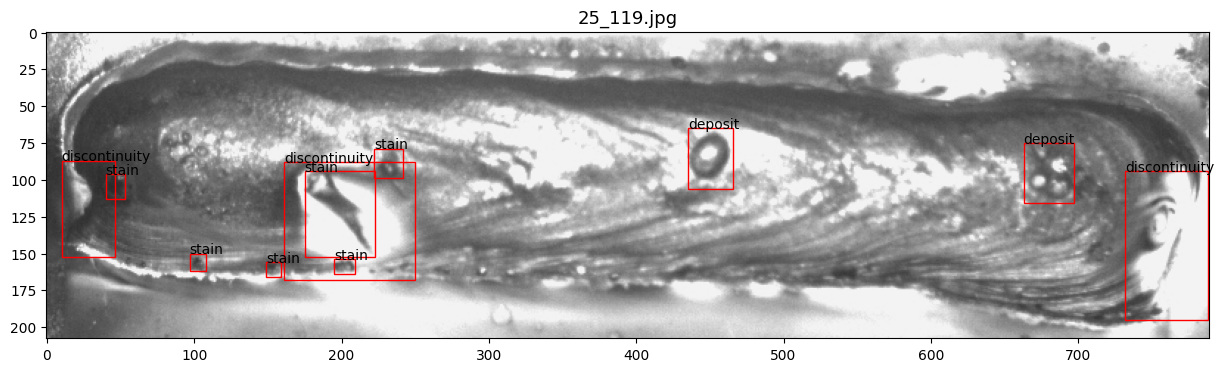

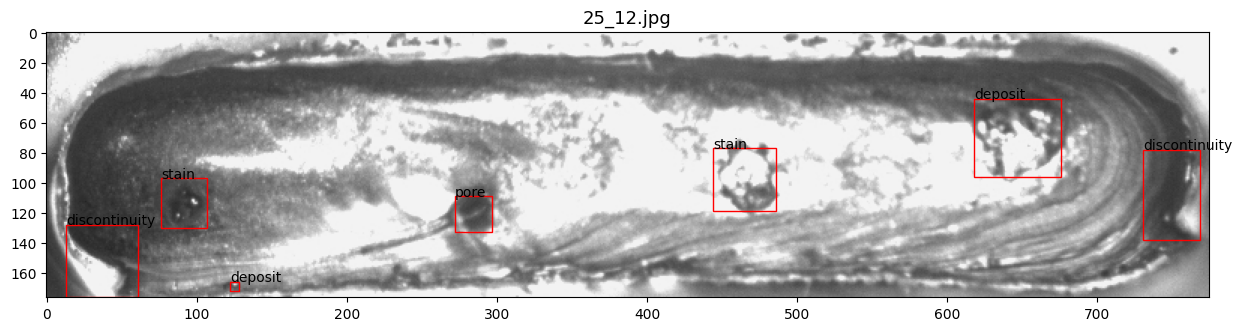

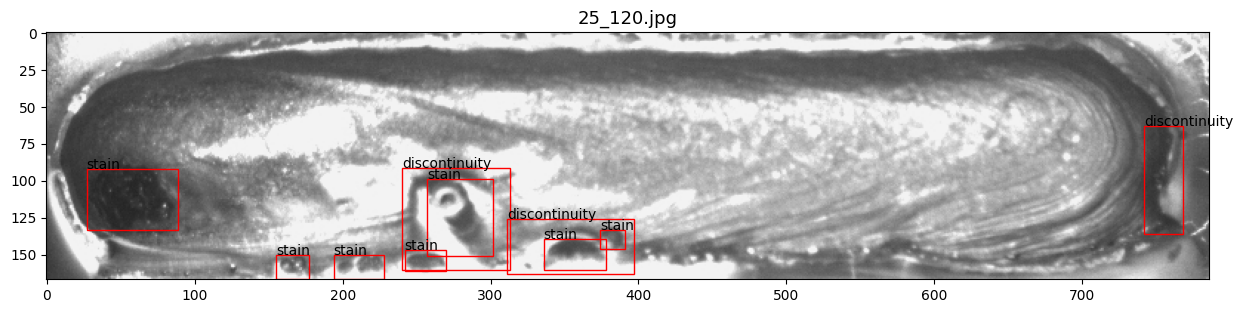

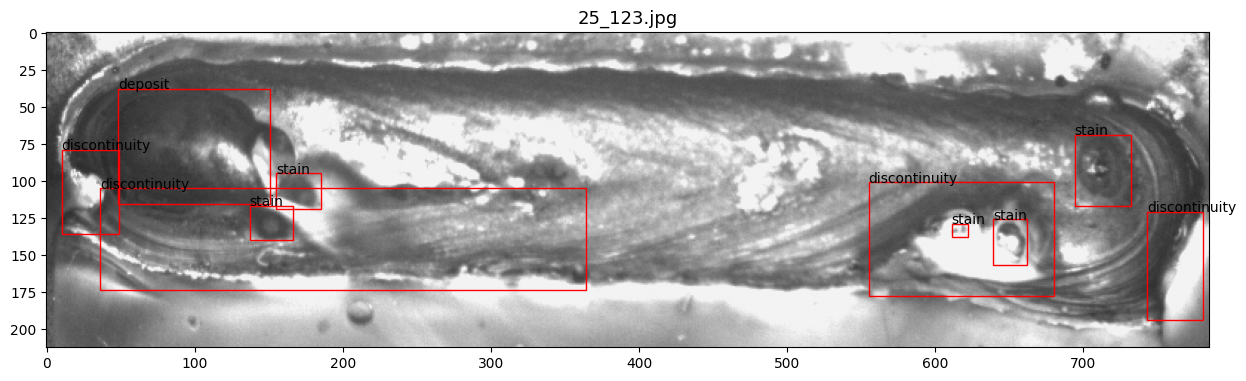

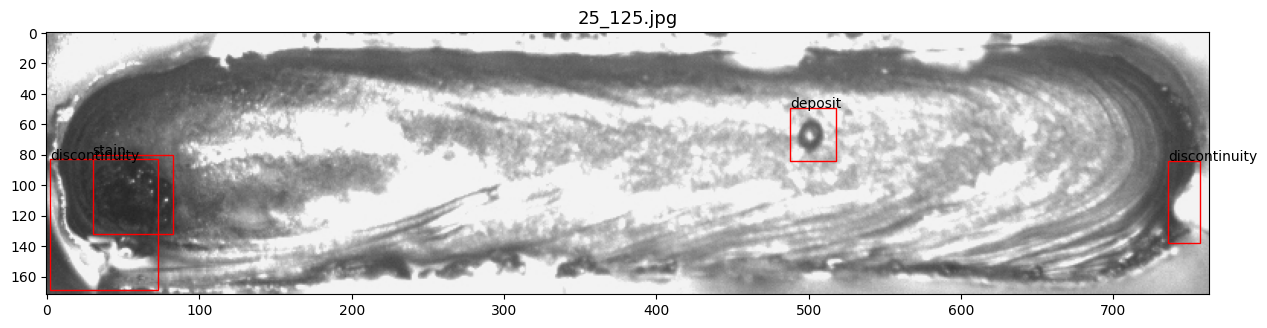

In [ ]:
# Plotting and Image display libraries
from PIL import Image
import matplotlib.pyplot as plt

# Extract the image and corresponding annotation files
img_files = sorted([i for i in os.listdir(image_dir)])
json_files = sorted([j for j in os.listdir(json_dir)])

# Select the SAME image and annotation files
for img, jsn in zip(img_files[10:15], json_files[10:15]):
    with open(os.path.join(json_dir, jsn), 'r') as f:
        annot = json.load(f)
    
    # Plot the image
    plt.figure(figsize = (15, 15))
    plt.imshow(Image.open(os.path.join(image_dir, img)))
    plt.axis('on')

    # Overlay with bounding boxes
    for a in annot.get('shapes', []):
        bbox = a.get('points', [])
        label = a.get('label', 'Unknown')

        # Extract required data from JSON file
        if bbox:
            xmin, ymin, xmax, ymax = [elem for sublist in bbox for elem in sublist]
            x, y = xmin, ymin
            width, height = (xmax - xmin), (ymax - ymin)

            # Plot the bounding box
            rect = plt.Rectangle((x, y), width, height, edgecolor = 'red',
                                facecolor = 'none', linewidth = 1)
            plt.gca().add_patch(rect)
            
            # Annotate the bounding box with required information
            plt.text(x, y, label, color = 'black', fontsize = 10)
            
    plt.title(f'{img}', fontsize = 13)
    plt.show()

## Indexing the Dataset: Image-Annotation Pair Matching

This cell executes a crucial data indexing step: transforming the loose collection of image and label files within the extracted `weld_dataset` folder into a structured, manageable **Pandas DataFrame**. This DataFrame serves as the central register for every observation (defect image and its corresponding annotation file) in the LoHi-WELD dataset.

**Purpose of the DataFrame (The Single Source of Truth)**

The primary goal is to establish a **one-to-one mapping** between the image file paths (the raw input to the model) and the YOLO annotation file paths (the Ground Truth).

1.  **Simplifies Data Access:** Instead of iterating separately over two different directories, all subsequent data-handling and processing steps—especially the complex 5-fold cross-validation split—can be executed by simply referencing rows within this single DataFrame.

2.  **Ensures Integrity:** By explicitly pairing files based on their shared base filename (e.g., `Weld_A_001.jpg` must match `Weld_A_001.txt`), we eliminate the risk of the model being trained on mismatched data, which would introduce severe labeling noise.

**Method and Execution**

1.  **Path Collection:** The code first utilizes file system utilities (like `os.listdir` or Python's `glob` module) to recursively search the `images` and `annotations` directories, collecting the absolute path for every file.

2.  **Matching and Filtering:** A robust matching logic is applied, typically by extracting the unique filename identifier (e.g., stripping the `.jpg` or `.txt` extension). The final DataFrame is constructed only from those identifiers where both a corresponding image file and a corresponding annotation file are present, ensuring no observations are incomplete, incompatible or missing.

3.  **Final Structure:** The resulting DataFrame typically contains the two critical columns -  `Image File` and `JSON File` which are the mappings of the images with thier JSON annotations. Additional columns might be added later, such as `kfold`, which is critical for the next cell's operation.


This indexed structure is the essential prerequisite for implementing the **5-Fold Cross-Validation** strategy, allowing for deterministic and reproducible splits in the following critical step.

In [ ]:
# Reaffirm if image files have same names as annotation files
img_file_list = sorted([os.path.join(image_dir, i) for i in img_files])
json_file_list = sorted([os.path.join(json_dir, j) for j in json_files])

missing_file_list = set(os.path.splitext(os.path.basename(i))[0] for i in img_file_list) - set(os.path.splitext(os.path.basename(j))[0] for j in json_file_list)

if missing_file_list:
    print(f'Missing files: {len(missing_file_list)}\n{missing_file_list}')
else:
    print('No missing files')

No missing files


In [ ]:
# Create a list of Image-annotation file pairs
csv_lst = list()

# Counter to ensure all files are matched
c = 0

# Check if there are same number of image and annotation files
if len(img_file_list) == len(json_file_list):
    for i in range(len(img_file_list)):

        # Only consider those files whose naming is the same
        if(os.path.splitext(os.path.basename(img_file_list[i]))[0] == os.path.splitext(os.path.basename(json_file_list[i]))[0]):
            
            # Append the pairing as a list of lists
            csv_lst.append([img_file_list[i], json_file_list[i]])
            c += 1

print(c)
# Convert the image-annotation pairings to dataframe
df_csv = pd.DataFrame(csv_lst, columns = ['Image File', 'JSON File'])
df_csv.head()

1022


Image File  \
0  /kaggle/working/image_files/25_100.jpg   
1  /kaggle/working/image_files/25_103.jpg   
2  /kaggle/working/image_files/25_105.jpg   
3  /kaggle/working/image_files/25_106.jpg   
4  /kaggle/working/image_files/25_107.jpg   

                                JSON File  
0  /kaggle/working/json_files/25_100.json  
1  /kaggle/working/json_files/25_103.json  
2  /kaggle/working/json_files/25_105.json  
3  /kaggle/working/json_files/25_106.json  
4  /kaggle/working/json_files/25_107.json

## **<u>Data Balancing - Class Count and Label Matrix Creation</u>**

This stage executes the foundational analytical step necessary for implementing **Stratified K-Fold Cross-Validation** where the primary objective is to quantify the exact distribution of the four weld defect classes across the entire LoHi-WELD dataset and encode this information into a machine-readable format called the **Label Matrix**.

### A. The Necessity of Counting Instances (Addressing Data Imbalance)

In industrial Computer Vision, datasets are almost always **imbalanced**; weld defect datasets are no exception - a welding process might produce hundreds of small **Pores** (an abundant class) but only a handful of large **Discontinuities** (a rare but critical class). If the dataset were split randomly (non-stratified), one of the five validation folds might accidentally contain **zero** instances of the rare 'Discontinuity' class. The model trained on that fold would then be incorrectly penalized during evaluation for failing to detect a class it was never tested on, or, conversely, a model could be deemed highly accurate by missing the rare class entirely.

* **Objective:** To prevent random splits from skewing the evaluation, we must first determine the **total population** of each class to enforce equal representation in every fold.
* **Logic:** The code iteratively parses every `.json` label file to aggregate the counts for the four classes: **Pores, Deposits, Discontinuities, and Stains**.

In [ ]:
# Import library to count class instances as a dictionary of frequencies
from collections import defaultdict

label_freq = defaultdict(int)
label_list = dict()

# Read each JSON annotation and extract the defect types
for i in df_csv.loc[:, 'JSON File']:
    with open(i, 'r') as f:
        ann = json.load(f)
    
    # Create a list of labels present
    labels = list()

    for shape in ann.get('shapes'):
        lab = shape.get('label')
        labels.append(lab)

        # CRITICAL: Count the Frequency of each class encountered in every JSON file
        label_freq[lab] += 1
    
    # Update the dictionary of label frequencies
    label_list.update({i: labels})

# Sort the dictionary in descending order of occurence
sorted_label_freq = dict(sorted(label_freq.items(), key = lambda i: i[1], reverse = True))

print(f'The frequency of each defect is: \n{sorted_label_freq}')
print(f'\nThe total unique types of defects are: \n{list(sorted_label_freq.keys())}')
print(f'\nThe labels from the first 3 JSONs: \n{dict(list(label_list.items())[:3])}')

# IMPORTANT: Encode the labels in the same descending order of frequency
label_map = {val: ind for ind, val in enumerate(sorted_label_freq.keys())}
print(f'\nLabel Encoded label map: \n{label_map}')

The frequency of each defect is: 
{'stain': 4181, 'discontinuity': 2977, 'deposit': 1794, 'pore': 523}

The total unique types of defects are: 
['stain', 'discontinuity', 'deposit', 'pore']

The labels from the first 3 JSONs: 
{'/kaggle/working/json_files/25_100.json': ['deposit', 'discontinuity', 'stain', 'stain', 'stain', 'discontinuity'], '/kaggle/working/json_files/25_103.json': ['discontinuity', 'discontinuity', 'deposit', 'deposit', 'stain', 'deposit', 'deposit'], '/kaggle/working/json_files/25_105.json': ['discontinuity', 'stain', 'stain', 'discontinuity', 'deposit']}

Label Encoded label map: 
{'stain': 0, 'discontinuity': 1, 'deposit': 2, 'pore': 3}


### B. The Label Matrix (Encoding the Distribution)

The **Label Matrix** is the intermediate data structure created in this cell that facilitates the stratification algorithm.

1.  **Structure:** The matrix is a tabular representation (a NumPy array or Pandas DataFrame) where:
    * **Rows** correspond to individual image (observation) acting as the `index` for the encoded table.
    * **Columns** correspond to the **four defect classes** (Pores, Deposits, Discontinuities, Stains).
    * **Value:** Each cell element contains the **binary representation** of a specific defect class' *presence* in that specific image. A value of '0' means the defect of *that specific class* is absent from that image while a value of `1` means the defect has been identified.

<br>

2.  **Multilabel Classification:** This matrix inherently treats the object detection problem as a **<u>multi-label</u> classification problem** for the purpose of splitting. This is necessary because a single image can contain multiple types of defects simultaneously and as such, traditional classification splitting methods (where an image belongs to only one class) cannot be used due to the aforementioned class imbalance issues.

</br>

3.  **Statistical Basis for Stratification:** The final row or summary of this matrix provides the **aggregate class distribution**. The stratification algorithm in the next cell will use this aggregate count to ensure that the sum of the counts for a specific class (e.g., total number of 'Discontinuity' defects) is **nearly identical across all five generated folds**. This statistical rigor ensures the chosen $\mathbf{mAP}@50:95$ score is a reliable measure of the model's true generalization performance.

<br>

We need to keep in mind that the *number of instances of a single class in that image **does not matter***. We are only looking to see the *presence or absence* of that particular defect in the image, irrespective of how many times it is seen or encountered, and is solely for the purpose of **classification**.

In [ ]:
# Create a zero matrix for each of the classes, with the same length as the number of images
label_matrix = np.zeros((len(df_csv.loc[:, 'JSON File']), len(label_map)))

# Iterate over each of the JSON annotation file and process the defects seen
for i, file in enumerate(df_csv.loc[:, 'JSON File']):
    with open(file, 'r') as f:
        ann = json.load(f)
    
    # Extract the defect(s) encountered in that image's annotation file
    defects = [shape['label'] for shape in ann.get('shapes')]
    
    for d in defects:
        if d in label_map:

            # IMP: Only show presence of that class which is present
            label_matrix[i, label_map[d]] = 1

# Last 10 rows of the matrix for the last 10 files in the folder
display(label_matrix[-10:])

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [0., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## **<u>K-Fold Implementation: Stratified Splitting based on Defect Density</u>**

This is the most methodologically complex cell in the data preparation workflow which utilizes the class counts generated in the previous step and applies a robust splitting strategy to generate the five distinct, balanced folds required for k-Fold Cross-Validation. This strategy is paramount for delivering an industrially reliable model that is validated across diverse data subsets.

### A. The Core Problem of Multilabel Stratification

Standard data splitting functions (like `train_test_split`) are designed for *single-label problems*. Object detection, however, is **multi-label** (where one image can contain defects of classes 0, 1 and 3 simultaneously). We cannot simply split based on the most frequent class, as this would ignore the distribution of other, rarer classes. The solution is an **Iterative Stratification logic**, where the code employs a sophisticated or custom stratification technique designed for multilabel datasets (often adapted from scikit-learn's `MultilabelStratifiedKFold` logic or a custom density-based approach). This method does not merely look at whether a class is present, but attempts to balance the **total count** of instances for each class across the folds.

<br>

### B. Step-by-Step Stratification Logic

The stratification process typically involves an iterative, <u>greedy</u> approach to assign images to folds:

1.  **Initialization:** Five empty lists or sets are created, one for each fold and are labeled from `0` (Fold `0` to Fold `4`).

2.  **Scoring Images:** Each image is assigned a **stratification score** (or a combination of class labels) based on the label matrix; for eaxmple images containing rare defects or a high diversity of defects are prioritized over trivial but frequently occuring ones.

3.  **Iterative Assignment:** The algorithm loops through the images and strategically assigns them to the fold that is currently **most deficient** in the specific defects present in that image.
    * *Example:* If Fold `2` currently has the fewest 'Discontinuity' instances, the algorithm attempts to place the next available image containing a 'Discontinuity' into Fold `2`.

4.  **Balancing Constraint:** The primary constraint is that, upon completion, the **sum of all 'Pore' defects (for example) in Fold $i$** should be approximately equal to the **sum of all 'Pore' defects in Fold $j$** (and similarly for the other three classes). This ensures that every validation fold is equally challenging and equally representative of the overall defect population.

</br>

### C. Output Structure

The output of this cell is a modified version of the original observation DataFrame, now augmented with a new column: **`kfold`**. Each row (image/label pair) is permanently assigned an integer value from 0 to 4, indicating which validation fold it belongs to. Since we are doing this for all classes, it stands to reason that we also set aside data for the **test** set, as such, care has been taken to assign a unique value to this set to indicate to the model that the particular test set is NOT to be searched or even seen until model evaluations. This can be achieved by then splitting the data normally using the `MultilabelStratifiedShuffleSplit` on the total set to ensure the same proportion of defects are maintained in the test set as well.

This assignment is permanent and deterministic. When the training script later executes the Cross-Validation loop, it will iterate five times:
* **Iteration 1 (Fold 0):** Uses images marked `kfold` 1, 2, 3, and 4 for training, and images marked `kfold` **0** for validation.
* **Iteration 5 (Fold 4):** Uses images marked `kfold` 0, 1, 2, and 3 for training, and images marked `kfold` **4** for validation.
* **Iteration `-1` (Fold `-1`):** Used images NOT marked from any of the above mentioned folds to be used as the **test** set and are marked as such in the `kfold` column.

This structured approach is the core of reliable model assessment in a research setting.

In [ ]:
# Install the module for Multi-Label Stratified splitting
!pip install iterative-stratification -q

In [ ]:
# Import the required libraries for train-test split as well as k-Fold split
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, MultilabelStratifiedShuffleSplit

test_splitter = MultilabelStratifiedShuffleSplit(n_splits = 1, test_size = 0.15, random_state = 42)
kfold_splitter = MultilabelStratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)

In [ ]:
# We first split the data into train and test sets, using iterators to ensure there are no end of list errors
train_idx, test_idx = next(test_splitter.split(np.zeros(len(df_csv.loc[:, 'JSON File'])), label_matrix))
# print(train_idx, test_idx)

# Setting up default value as -1 for test set
df_csv.loc[:, 'Fold'] = -1

# Use the multi-label splitter to mark each defect in a given fold
# ensuring equal defect label splitting across each fold from 
# 0 through 4
for fold, (_, val_idx) in enumerate(
    kfold_splitter.split(X = train_idx, y = label_matrix[train_idx])):
    df_csv.loc[train_idx[val_idx], 'Fold'] = fold
    
# Note the test split is left as -1
print('Split Distribution:')
print('='*50,)
print(df_csv.loc[:, 'Fold'].value_counts())

Split Distribution:
Fold
 4    177
 3    173
 2    172
 0    171
 1    170
-1    159
Name: count, dtype: int64


## Statistical Validation: Verifying the Stratified Split

After the previous execution of the complex stratification logic, this stage performs a crucial **statistical verification** to confirm that the splitting was successful and that the data is indeed balanced across the five folds. This step provides the quantitative evidence that the Cross-Validation is statistically rigorous.

### I. The Verification Method

The code processes the resulting DataFrame (with the `kfold` assignments) and calculates the **distribution of instances per class, per fold**.

1.  **Grouping:** The DataFrame is grouped first by the `kfold` column (`-1` and `0` through `4`) and then by the individual defect classes (Pores, Deposits, etc.).

2.  **Aggregation:** The total number of instances for each class within each fold is added to get the total count for each defect class.

3.  **Visualization:** The results are displayed as a table, showing the total count of each defect for each of the five folds and the final test fold.

<br>

### II. Interpreting the Results

A successful stratification in the entire split data (both train and test) will show two key characteristics in the verification table:

* **Near-Equal Row Sums (Total Observations):** The total number of images (observations) in each of the five train folds and the test fold should be nearly identical (e.g., $865 \text{ total images} / 5 \approx 171$ images per fold) while the remaining $\approx 159$ images are assigned to the test set.

* **Near-Equal Column Values (Instance Counts):** This is the most critical check; for any given class (e.g., 'Discontinuities'), the total number of instances across the five folds should be roughly equal (for example, if there are `1,000` total discontinuities, each fold should contain approximately $200$ instances in each fold). **Minimal variance** across the folds confirms the success of the stratification logic.

</br>

By passing this verification check, the user gains a high degree of **confidence** in the training setup. Any future variance in the final $\mathbf{mAP}@50:95$ scores across the five folds can be reliably attributed to the model's performance on genuinely distinct image features (e.g., difficulty generalizing to a specific lighting condition or background texture) rather than to a mere statistical anomaly or imbalance in the test set. This rigorous validation is a hallmark of research-grade Computer Vision work.

In [ ]:
# Create reverse mapping with 0-based label indexing for YOLO format
# Converts label_map (name→index) to index_to_defect (index→name) for easy lookup
index_to_defect = {idx: name for name, idx in label_map.items()}

# Extract the unique fold values from the column to analyze data distribution per fold
for fold in sorted(df_csv.loc[:, 'Fold'].unique()):

    # Get row indices where Fold column equals current fold number
    fold_indices = df_csv.loc[(df_csv.loc[:, 'Fold'] == fold), 'Fold'].index
    
    # Extract the label matrix rows corresponding to this fold's images
    subset = label_matrix[fold_indices]
    print(f"\nFold {fold} ({len(subset)} images):")
    
    # Loop through each defect class column in the label matrix
    for col_idx in range(label_matrix.shape[1]):
        
        # Convert column index back to defect name using reverse mapping
        defect_name = index_to_defect[col_idx]
        
        # Count how many images in this fold have this defect (sum of 1s in column)
        count = subset[:, col_idx].sum()
        print(f"{defect_name:<{15}}: {count:>5} cases")


Fold -1 (159 images):
stain          : 148.0 cases
discontinuity  : 159.0 cases
deposit        : 118.0 cases
pore           :  35.0 cases

Fold 0 (171 images):
stain          : 167.0 cases
discontinuity  : 171.0 cases
deposit        : 133.0 cases
pore           :  39.0 cases

Fold 1 (170 images):
stain          : 167.0 cases
discontinuity  : 170.0 cases
deposit        : 133.0 cases
pore           :  39.0 cases

Fold 2 (172 images):
stain          : 167.0 cases
discontinuity  : 172.0 cases
deposit        : 133.0 cases
pore           :  38.0 cases

Fold 3 (173 images):
stain          : 166.0 cases
discontinuity  : 173.0 cases
deposit        : 132.0 cases
pore           :  39.0 cases

Fold 4 (177 images):
stain          : 166.0 cases
discontinuity  : 177.0 cases
deposit        : 132.0 cases
pore           :  39.0 cases


In [ ]:
# Verify the fold
# Iterate through the last 9 rows of the dataframe in reverse order
for i in range(len(df_csv)-1, len(df_csv)-10, -1):

    # Get JSON file path from current row
    json_file = df_csv.iloc[i]['JSON File']  
    print(f"Row {i}: {json_file} -> Encoded Labels: {label_matrix[i]}")

# Get the JSON file from the 4th last row of the dataframe
sample_json = df_csv.loc[df_csv.index[-4], 'JSON File']

# Open and load the JSON file to inspect its contents
with open(sample_json, 'r') as f:
    ann_sample = json.load(f)

# Extract all label names from the 'shapes' section of the JSON annotation
l = [shape['label'] for shape in ann_sample.get('shapes')]


print(f"\nRow {df_csv.index[-4]}: {sample_json} | Labels: {l} -> Encoding: {label_matrix[-4]}")
print(f'\n{label_map}')

Row 1021: /kaggle/working/json_files/29_435.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1020: /kaggle/working/json_files/29_426.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1019: /kaggle/working/json_files/29_255.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1018: /kaggle/working/json_files/29_144.json -> Encoded Labels: [0. 1. 1. 1.]
Row 1017: /kaggle/working/json_files/29_121.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1016: /kaggle/working/json_files/28_613.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1015: /kaggle/working/json_files/28_505.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1014: /kaggle/working/json_files/28_501.json -> Encoded Labels: [1. 1. 1. 1.]
Row 1013: /kaggle/working/json_files/28_486.json -> Encoded Labels: [1. 1. 1. 1.]

Row 1018: /kaggle/working/json_files/29_144.json | Labels: ['pore', 'pore', 'pore', 'discontinuity', 'deposit', 'deposit', 'pore', 'discontinuity'] -> Encoding: [0. 1. 1. 1.]

{'stain': 0, 'discontinuity': 1, 'deposit': 2, 'pore': 3}


## Core Transformation: Implementing the JSON to YOLO Annotation Converter

Before writing the conversion script, it is mandatory to visually inspect the structure of the raw annotation files provided by the LoHi-WELD dataset. These files are typically encoded in **JSON (JavaScript Object Notation)**, a human-readable, nested-dictionary format that is excellent for complex metadata but incompatible with the streamlined YOLO training pipeline. The goal of this stage is to identify the critical keys within the JSON object that hold the required information:

1.  **Image Dimensions:** Keys such as `"image_width"` and `"image_height"` are essential. These pixel dimensions ($\mathbf{W}$ and $\mathbf{H}$) are needed for the subsequent **normalization** step—the mathematical process that scales all coordinates to a $0.0$ to $1.0$ range.

2.  **Annotation List:** The primary container for the defects, often labeled something like `"annotations"` or `"objects"`. This is a list that the conversion script must iterate over.

3.  **Bounding Box Coordinates:** The raw coordinates for each defect are almost always given in an absolute pixel format, such as $x_{min}, y_{min}, x_{max}, y_{max}$ (the top-left and bottom-right corners). This format is known as **PASCAL VOC** or **COCO-style coordinates**.

4.  **Class Label:** The human-readable string label (e.g., `"Discontinuity"`, `"Pore"`) that must be mapped to its corresponding **zero-indexed integer** (0, 1, 2, or 3).

The JSON format's incompatibility lies in its verbosity (storing metadata and using pixel values) compared to the YOLO format's simplicity: five space-separated, normalized numbers per line. This inspection ensures the conversion script knows exactly where to look for the four crucial pieces of information: the class name and the four pixel coordinates.

In [ ]:
# Check the annotation format for a single file.
with open('/kaggle/working/json_files/29_144.json', 'r') as ex:
    sample_json = json.load(ex)
for s in sample_json.get('shapes'):
    print(s)

{'label': 'pore', 'points': [[255, 78], [265, 92]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'pore', 'points': [[286, 103], [297, 115]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'pore', 'points': [[243, 95], [250, 110]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'discontinuity', 'points': [[243, 94], [323, 163]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'deposit', 'points': [[24, 49], [78, 112]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'deposit', 'points': [[357, 64], [388, 107]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'pore', 'points': [[736, 119], [750, 142]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}
{'label': 'discontinuity', 'points': [[745, 103], [775, 179]], 'group_id': 'null', 'shape_type': 'rectangle', 'flags': {}}


In [ ]:
# Extract the width and height of the entire image from annotation file
sample_json_file = '/kaggle/working/json_files/29_144.json'
os.path.join('/kaggle/working/yolo_files/', os.path.splitext(os.path.basename(sample_json_file))[0]+'.txt')

# Read the annotation file
with open(sample_json_file, 'r') as ex:
    sample_json = json.load(ex)

img_ht = sample_json.get('imageHeight') # Extract Image Width
img_w = sample_json.get('imageWidth') # Extract Image Height
print(f'Image Width: {img_w} and Image Height: {img_ht}')

Image Width: 781 and Image Height: 189


This next work stage contains the most critical piece of custom data engineering logic in the entire project: the script that translates the absolute pixel coordinates and string labels from the JSON files into the highly specific, normalized `.txt` files required by the YOLO framework. This conversion is performed for every single image file in the LoHi-WELD dataset.

#### A. The Conversion Imperative: Why Normalization is Mandatory

The YOLO training script operates on the principle of **normalized coordinates**, i.e., if pixel values (e.g., $1500$ or $800$) were used directly, the model would only learn coordinates relative to the original image size and if a new, larger image ($2000 \times 2000$) were fed into the model, the prediction would fail. **Normalization** ensures the model learns the **relative position and size** of the defects regardless of the input image dimensions, such that a defect occupying $10\%$ of the image width will be represented by $w=0.10$, whether the image is $500$ pixels wide or $2000$ pixels wide.

<br>

#### B. Step-by-Step Conversion Mathematics

For every defect found in a JSON file, the script executes the following sequence of mathematical transformations:

1.  **Read Raw Coordinates:** Extract the absolute pixel bounding box: $(\mathbf{x_{min}}, \mathbf{y_{min}}, \mathbf{x_{max}}, \mathbf{y_{max}})$.

2.  **Pixel Dimensions Calculation:** Calculate the pixel width and height of the box:
    $$\mathbf{w}_{pixel} = \mathbf{x_{max}} - \mathbf{x_{min}}$$
    $$\mathbf{h}_{pixel} = \mathbf{y_{max}} - \mathbf{y_{min}}$$

3.  **Pixel Center Calculation:** Calculate the center point of the box in pixels:
    $$\mathbf{x}_{center\_pixel} = \mathbf{x_{min}} + (\mathbf{w}_{pixel} / 2)$$
    $$\mathbf{y}_{center\_pixel} = \mathbf{y_{min}} + (\mathbf{h}_{pixel} / 2)$$

4.  **The Normalization Step:** Divide all calculated pixel values by the corresponding total image dimension ($\mathbf{W}$ for X-values, $\mathbf{H}$ for Y-values). This yields the four required normalized floating-point numbers:
    $$\mathbf{x}_{normalized} = \mathbf{x}_{center\_pixel} / \mathbf{W}$$
    $$\mathbf{y}_{normalized} = \mathbf{y}_{center\_pixel} / \mathbf{H}$$
    $$\mathbf{w}_{normalized} = \mathbf{w}_{pixel} / \mathbf{W}$$
    $$\mathbf{h}_{normalized} = \mathbf{h}_{pixel} / \mathbf{H}$$

In [ ]:
# Iterate through each shape/object in the JSON annotation file
for s in sample_json.get('shapes'):
    lab = s.get('label')  # Get the object class label
    print(f'{lab}: {label_map[lab]}')  # Print label and its numerical mapping
    coords = s.get('points')  # Get bounding box coordinates [[x1,y1], [x2,y2]]
    print(coords)
    
    if coords:
        # Extract coordinates from nested list format
        x1, y1, x2, y2 = [elem for sublist in coords for elem in sublist ]
        print('Actual co-ordinates:')
        print(x1, y1, x2, y2)
        
        # Convert to center coordinates and dimensions (original JSON format)
        xs_c, ys_c = round((x1 + x2)/2, 2), round((y1 + y2)/2, 2)  # Center point
        box_w, box_ht = (x2 - x1), (y2 - y1)  # Width and height
        print('Normal JSON annotation')
        print(f'{lab} {xs_c} {ys_c} {box_w} {box_ht}')
        
        # Normalize coordinates for YOLO format (relative to image dimensions)
        xs_cn, ys_cn = round(xs_c/img_w, 2), round(ys_c/img_ht, 2)  # Normalized center
        box_wn, box_htn = round(box_w/img_w, 2), round(box_ht/img_ht, 2)  # Normalized dimensions
        print('YOLO format for each bounding box:')
        # YOLO format: class_id center_x center_y width height (all normalized)
        print(f'{label_map[lab]} {xs_cn} {ys_cn} {box_wn} {box_htn}\n')

# Print the output file path where YOLO annotations will be saved
print(os.path.join('/kaggle/working/yolo_files/', 
                   os.path.splitext(os.path.basename(sample_json_file))[0]+'.txt'),'\n')

pore: 3
[[255, 78], [265, 92]]
Actual co-ordinates:
255 78 265 92
Normal JSON annotation
pore 260.0 85.0 10 14
YOLO format for each bounding box:
3 0.33 0.45 0.01 0.07

pore: 3
[[286, 103], [297, 115]]
Actual co-ordinates:
286 103 297 115
Normal JSON annotation
pore 291.5 109.0 11 12
YOLO format for each bounding box:
3 0.37 0.58 0.01 0.06

pore: 3
[[243, 95], [250, 110]]
Actual co-ordinates:
243 95 250 110
Normal JSON annotation
pore 246.5 102.5 7 15
YOLO format for each bounding box:
3 0.32 0.54 0.01 0.08

discontinuity: 1
[[243, 94], [323, 163]]
Actual co-ordinates:
243 94 323 163
Normal JSON annotation
discontinuity 283.0 128.5 80 69
YOLO format for each bounding box:
1 0.36 0.68 0.1 0.37

deposit: 2
[[24, 49], [78, 112]]
Actual co-ordinates:
24 49 78 112
Normal JSON annotation
deposit 51.0 80.5 54 63
YOLO format for each bounding box:
2 0.07 0.43 0.07 0.33

deposit: 2
[[357, 64], [388, 107]]
Actual co-ordinates:
357 64 388 107
Normal JSON annotation
deposit 372.5 85.5 31 43
YOLO f

#### C. Class Label Mapping (The Zero-Indexing Rule)

Simultaneously, the script performs a dictionary lookup to convert the string label (e.g., "Deposit") into its corresponding **zero-indexed integer** (e.g., '0' or '2'). As previously established, YOLO requires class indices to start at **0**. The final output is thus, a plain text `.txt` file (sharing the same base name as the image) where each line written to this file contains the five required space-separated, floating-point numbers, ensuring high precision for the coordinates:

$$\text{<Class ID>}\ \ \mathbf{x}_{min-normalized}\ \ \mathbf{y}_{min-normalized}\ \ \mathbf{w}_{normalized}\ \ \mathbf{h}_{normalized}$$

This script successfully transforms thousands of complex JSON objects into the simplified, mandatory format, completing the backbone of the data engineering pipeline.

In [ ]:
# Create directory for YOLO annotation files
yolo_dir = '/kaggle/working/yolo_files/'
os.makedirs(yolo_dir, exist_ok = True)

# Create a copy of the dataframe to store YOLO file paths
df_copy = df_csv.copy()

# Process each JSON annotation file in the dataset
for i, file_name in enumerate(df_csv.loc[:, 'JSON File']):
    with open(file_name, 'r') as ex:
        json_loader = json.load(ex)
    
    # Get image dimensions for coordinate normalization
    img_ht = sample_json.get('imageHeight')
    img_w = sample_json.get('imageWidth')
    
    yolo_txt = []  # Store YOLO-formatted annotations for this image
    
    # Convert each bounding box from JSON to YOLO format
    for s in json_loader.get('shapes'):
        lab = s.get('label')
        coords = s.get('points')
        
        if coords:
            # Extract bounding box coordinates from JSON format
            x1, y1, x2, y2 = [elem for sublist in coords for elem in sublist ]
            
            # Calculate center coordinates and dimensions (absolute pixels)
            xs_c, ys_c = (x1 + x2)/2, (y1 + y2)/2
            box_w, box_ht = (x2 - x1), (y2 - y1)
            
            # Normalize coordinates to [0,1] range for YOLO format
            xs_cn, ys_cn = (xs_c/img_w), (ys_c/img_ht)
            box_wn, box_htn = (box_w/img_w), (box_ht/img_ht)
            
            # Format as YOLO line: class_id center_x center_y width height
            yolo_txt.append((f'\n{label_map[lab]} {xs_cn:0.6f} {ys_cn:0.6f} {box_wn:0.6f} {box_htn:0.6f}'))
    
    # Write YOLO annotations to text file
    output_file = os.path.join(yolo_dir, os.path.splitext(os.path.basename(file_name))[0]+'.txt')
    with open(output_file, 'w') as yolo_w:
        yolo_w.write(' '.join(yolo_txt))
    
    # Update dataframe with YOLO file path
    df_copy.loc[df_copy.index[i], 'YOLO File'] = output_file

# Display updated dataframe with YOLO file references
df_copy = df_copy.reindex(columns = ['Image File', 'JSON File', 'YOLO File', 'Fold'])
display(df_copy)

Image File  \
0     /kaggle/working/image_files/25_100.jpg   
1     /kaggle/working/image_files/25_103.jpg   
2     /kaggle/working/image_files/25_105.jpg   
3     /kaggle/working/image_files/25_106.jpg   
4     /kaggle/working/image_files/25_107.jpg   
...                                      ...   
1017  /kaggle/working/image_files/29_121.jpg   
1018  /kaggle/working/image_files/29_144.jpg   
1019  /kaggle/working/image_files/29_255.jpg   
1020  /kaggle/working/image_files/29_426.jpg   
1021  /kaggle/working/image_files/29_435.jpg   

                                   JSON File  \
0     /kaggle/working/json_files/25_100.json   
1     /kaggle/working/json_files/25_103.json   
2     /kaggle/working/json_files/25_105.json   
3     /kaggle/working/json_files/25_106.json   
4     /kaggle/working/json_files/25_107.json   
...                                      ...   
1017  /kaggle/working/json_files/29_121.json   
1018  /kaggle/working/json_files/29_144.json   
1019  /kaggle/working/json_files/29_255.json   
1020  /kaggle/working/json_files/29_426.json   
1021  /kaggle/working/json_files/29_435.json   

                                  YOLO File  Fold  
0     /kaggle/working/yolo_files/25_100.txt     0  
1     /kaggle/working/yolo_files/25_103.txt     4  
2     /kaggle/working/yolo_files/25_105.txt     1  
3     /kaggle/working/yolo_files/25_106.txt     3  
4     /kaggle/working/yolo_files/25_107.txt     1  
...                                     ...   ...  
1017  /kaggle/working/yolo_files/29_121.txt     1  
1018  /kaggle/working/yolo_files/29_144.txt     4  
1019  /kaggle/working/yolo_files/29_255.txt     2  
1020  /kaggle/working/yolo_files/29_426.txt     2  
1021  /kaggle/working/yolo_files/29_435.txt     1  

[1022 rows x 4 columns]

In [ ]:
# Check sample YOLO annotation for a random file
with open('/kaggle/working/yolo_files/25_100.txt', 'r') as sample_yolo:
    print(sample_yolo.read())


2 0.083227 0.441799 0.079385 0.375661 
1 0.020487 0.560847 0.035851 0.370370 
0 0.864917 0.534392 0.083227 0.285714 
0 0.315621 0.439153 0.067862 0.243386 
0 0.492318 0.587302 0.042254 0.137566 
1 0.969270 0.748677 0.061460 0.396825


## Physical Data Partitioning

This part executes the physical separation of the LoHi-WELD dataset based on the assignments made in the **`kfold`** column of the DataFrame. This is a manual, file-system-level operation that creates the exact directory structure required by the YOLO training pipeline for each of the five validation runs. While the DataFrame logically defines the splits, the YOLO training script requires the images and labels to be physically organized into separate `train` and `val` directories for each iteration. Since an image belongs to the training set for four folds and the validation set for one fold, the most reliable approach is to create a duplicate folder structure for each of the five folds. The code iterates through the five defined folds (Fold 0 through Fold 4), executing a two-part process within each loop:

#### A. Creating the K-Fold Structure:
For each fold ($i \in \{0, 1, 2, 3, 4\}$), the script generates a nested directory hierarchy under a central location (e.g., `kfold_data/`) followed by the another separate folder which is kept aside as the **test set** whose data is not touched at all until the evaluation phase:

```{text}
📁 kfold  
├── 📁 fold_{i}  
│   ├── 📁 images  
│   │   ├── 📁 train
│   │   └── 📁 val
│   └── 📁 labels  
│       ├── 📁 train
│       └── 📁 val  
.
.
.
```

This structure clearly separates the **images** and their corresponding **labels** into `train` and `val` subdirectories, which is the universal standard for all modern object detection frameworks.

In [25]:
# Make directories for train-val-test set for each fold value
for i in range(-1, 5):
    if (i != -1):
        os.makedirs(f'/kaggle/working/data/train/images/fold_{i}/', exist_ok = True)
        os.makedirs(f'/kaggle/working/data/train/labels/fold_{i}/', exist_ok = True)
        os.makedirs(f'/kaggle/working/data/val/images/fold_{i}/', exist_ok = True)
        os.makedirs(f'/kaggle/working/data/val/labels/fold_{i}/', exist_ok = True)
    else:
        os.makedirs('/kaggle/working/data/test/images/', exist_ok = True)
        os.makedirs('/kaggle/working/data/test/labels/', exist_ok = True)

print("📁 Directory structure created!")

📁 Directory structure created!


#### B. The Copying Logic (Implementing the Stratification):

The core of the cell involves the conditional copying of every single file based on its `kfold` assignment:

1.  **Validation Set Assignment:**
    * Any file (image and its corresponding `.txt` label) whose `kfold` is equal to the current iteration number $i$ is copied to the `kfold_{i}/images/val/` and `kfold_{i}/labels/val/` directories, respectively.
    * *Example:* If the current loop is processing **Fold 2**, all images/labels marked as `kfold = 2` are assigned to the **validation set for this run.** This subset represents the $20\%$ of data the model has never seen.

2.  **Training Set Assignment:**
    * Any file whose `kfold` is **NOT** equal to the current iteration number $i$ is copied to the `kfold_{i}/images/train/` and `kfold_{i}/labels/train/` directories.
    * *Example:* For **Fold 2**, all images/labels marked as `kfold` 0, 1, 3, and 4 are combined to form the **training set for this run.** This represents the $80\%$ of data used to update the model weights.

<br>

#### C. The Test Set Partitioning

In addition to the 5-Fold cross-validation split, a final, completely unseen **Test Set** must be carved out from the total dataset to provide the ultimate, unbiased measure of the model's performance on real-world data using the following folder structure:

```{text}
├── 📁 test
│   ├── 📁 images  
│   │   ├── 📁 train
│   │   └── 📁 val
│   └── 📁 labels  
│       ├── 📁 train
│       └── 📁 val 
```


A small, predetermined percentage (e.g., $10\%$ to $20\%$) of the data that was *excluded* from the original 5-fold split is designated as the permanent `test` set. This set is copied into a separate, permanent directory structure (`kfold_data/test/`) which will **not** be used in any of the five training runs. The metrics generated on this final Test Set (e.g., a final $\text{mAP}@50:95$ score) represent the model's true, final generalization score, free from any contamination or bias introduced by the Cross-Validation process.

This physical data partitioning step is essential because it guarantees that the subsequent YOLO training cell receives exactly five distinct, non-overlapping, and statistically balanced input directories, making the final performance evaluation reliable and defensible. The resulting folder structure is the ultimate physical manifestation of the rigorous statistical planning executed in the previous cells.

In [26]:
# Split the dataset into train, validation and test sets
for fold in sorted(df_copy.loc[:, 'Fold'].unique()):
    if (fold != -1):
        # Extracting the train data
        train_fold_data = df_copy.loc[(df_copy.loc[:, 'Fold'] != fold) & (fold != -1), :]
        for _, row in train_fold_data.iterrows():
            img_src_trn = row.loc['Image File']
            lbl_src_trn = row.loc['YOLO File']

            img_dest_trn = os.path.join(f'/kaggle/working/data/train/images/fold_{fold}/{os.path.basename(img_src_trn)}')
            lbl_dest_trn = os.path.join(f'/kaggle/working/data/train/labels/fold_{fold}/{os.path.basename(lbl_src_trn)}')

            shutil.copy(img_src_trn, img_dest_trn)
            shutil.copy(lbl_src_trn, lbl_dest_trn)

        # Extract Validation data
        val_fold_data = df_copy.loc[(df_copy.loc[:, 'Fold'] == fold) & (fold != -1), :]
        for _, row in val_fold_data.iterrows():
            img_src_val = row.loc['Image File']
            lbl_src_val = row.loc['YOLO File']

            img_dest_val = os.path.join(f'/kaggle/working/data/val/images/fold_{fold}/{os.path.basename(img_src_val)}')
            lbl_dest_val = os.path.join(f'/kaggle/working/data/val/labels/fold_{fold}/{os.path.basename(lbl_src_val)}')

            shutil.copy(img_src_val, img_dest_val)
            shutil.copy(lbl_src_val, lbl_dest_val)

    
    else:
        # Extract the test data
        test_fold_data = df_copy.loc[(df_copy.loc[:, 'Fold'] == fold), :]
        for _, row in test_fold_data.iterrows():
            img_src_tt = row.loc['Image File']
            lbl_src_tt = row.loc['YOLO File']

            img_dest_tt = os.path.join(f'/kaggle/working/data/test/images/{os.path.basename(img_src_tt)}')
            lbl_dest_tt = os.path.join(f'/kaggle/working/data/test/labels/{os.path.basename(lbl_src_tt)}')

            shutil.copy(img_src_tt, img_dest_tt)
            shutil.copy(lbl_src_tt, lbl_dest_tt)


print("\n✅ All folds organized with proper train/val/test splits!")


✅ All folds organized with proper train/val/test splits!


## Generating the K-Fold YAML Files

This work stage finalizes the preparation of the training environment by generating the necessary **YAML (`.yaml`) configuration files** for each of the five folds. The YAML file is the single most important configuration document for the YOLO training script, acting as the instruction manual for data location and class definition. The YOLO training command requires a path to a single configuration file that tells it:

1.  **Where to find the data:** The exact file system paths to the training and validation image directories for the current fold.

2.  **What the data means:** The total number of classes (`nc`) and the human-readable class names (`names`) corresponding to the integer indices (0, 1, 2, 3).

Since the paths change for every fold (e.g., `kfold_data/fold_0/images/train/` vs. `kfold_data/fold_1/images/train/`), the script must dynamically generate five distinct YAML files (e.g., `weld_config_fold_0.yaml`, `weld_config_fold_1.yaml`, etc.). Each generated YAML file contains the following critical fields:

```yaml
# Configuration for K-Fold X
path: ./kfold_data/fold_X/  # Base directory (e.g., used for relative pathing)
train: images/train/        # Path to the training images for Fold X
val: images/val/            # Path to the validation images for Fold X

# Class Information
nc: 4                       # Number of classes (Pores, Deposits, Discontinuities, Stains)
names: ['Pore', 'Deposit', 'Discontinuity', 'Stain']    # Human-readable class names (in order of index 0, 1, 2, 3)
```

However, the YOLO model necessitates that the YAML file also be made for the test-set, but in this case, one would wrongly make the assumption that the test-set YAML should be concommittant with the *best performing model*; this is not needed, as the YOLO documentation has made provisions for such scenarios as well. In short, we can assign **any of the folders of the fold sets** and it will only act as a dummy placeholder for the model to understand that the YAML file is for the test set, and no training data is to be looked at. The structure is as follows:

```yaml
path: ./kfold_data/test/        # Test directory (used for relative pathing)
train: images/train/fold_0      # Path to the training images for Fold 0 -> Dummy file name, NOT read at test stage
val: images/val/fold_0          # Path to the training images for Fold 0 -> Dummy file name, NOT read at test stage

# Test set (often left empty or points to the separate test folder)
test: images/test/

# Class Information
nc: 4                           # Number of classes (Pores, Deposits, Discontinuities, Stains)
names: ['Pore', 'Deposit', 'Discontinuity', 'Stain']    # Human-readable class names (in order of index 0, 1, 2, 3)
```

By completing this step, the entire data preparation pipeline is finished. The environment is fully structured, files are balanced and partitioned, and the training script is provided with the final, precise instructions it needs to begin the multi-fold training process in the next section.

In [ ]:
# Create YAML files for the data
for i in range(-1, 5):
    if (i != -1):
        yaml_trn_val = f'''# fold_{i}.yaml
        train: /kaggle/working/data/train/images/fold_{i}
        val: /kaggle/working/data/val/images/fold_{i}

        nc: {len(label_map)}
        names: {list(label_map.keys())}
        '''

        with open(f'/kaggle/working/data/fold_{i}.yaml', 'w') as trn_val_w:
            trn_val_w.write(yaml_trn_val)
        print(f'✅ Created working YAML file for /kaggle/working/data/fold_{i}.yaml')

    else:
        yaml_test = f'''# test.yaml
        train: /kaggle/working/data/train/images/fold_0
        val: /kaggle/working/data/val/images/fold_0
        test: /kaggle/working/data/test

        nc: {len(label_map)}
        names: {list(label_map.keys())}
        '''

        with open('/kaggle/working/data/test.yaml', 'w') as test_w:
            test_w.write(yaml_test)
        print('✅ Created working YAML file for /kaggle/working/data/test.yaml')

✅ Created working YAML file for /kaggle/working/data/test.yaml
✅ Created working YAML file for /kaggle/working/data/fold_0.yaml
✅ Created working YAML file for /kaggle/working/data/fold_1.yaml
✅ Created working YAML file for /kaggle/working/data/fold_2.yaml
✅ Created working YAML file for /kaggle/working/data/fold_3.yaml
✅ Created working YAML file for /kaggle/working/data/fold_4.yaml


In [29]:
# Verify YAML files were created in correct locations
print("📁 Verifying YAML file locations:")
expected_yamls = [
    '/kaggle/working/data/fold_0.yaml',
    '/kaggle/working/data/fold_1.yaml', 
    '/kaggle/working/data/fold_2.yaml',
    '/kaggle/working/data/fold_3.yaml',
    '/kaggle/working/data/fold_4.yaml',
    '/kaggle/working/data/test.yaml'
]

for yaml_path in expected_yamls:
    if os.path.exists(yaml_path):
        print(f"✅ {yaml_path} - EXISTS")
    else:
        print(f"❌ {yaml_path} - MISSING")


📁 Verifying YAML file locations:
✅ /kaggle/working/data/fold_0.yaml - EXISTS
✅ /kaggle/working/data/fold_1.yaml - EXISTS
✅ /kaggle/working/data/fold_2.yaml - EXISTS
✅ /kaggle/working/data/fold_3.yaml - EXISTS
✅ /kaggle/working/data/fold_4.yaml - EXISTS
✅ /kaggle/working/data/test.yaml - EXISTS


In [30]:
# Also verify content of one YAML
if os.path.exists('/kaggle/working/data/fold_0.yaml'):
    with open('/kaggle/working/data/fold_0.yaml', 'r') as chk:
        content = chk.read()
    print(f"\n📄 Sample YAML content:\n{content}")


📄 Sample YAML content:
# fold_0.yaml
        train: /kaggle/working/data/train/images/fold_0
        val: /kaggle/working/data/val/images/fold_0

        nc: 4
        names: ['stain', 'discontinuity', 'deposit', 'pore']
        


# **<u>MODELLING: Deep Learning for Real-Time Weld Defect Detection</u>**

This section details the core execution phase of the WeldSight project: training a state-of-the-art YOLO (You Only Look Once) model using the meticulously prepared and stratified LoHi-WELD dataset. This stage moves beyond data preparation to the iterative, computational process of model optimization, where the network learns to transform raw pixel data into precise bounding box predictions and accurate defect classifications.

## Strategic Choice of the YOLO Architecture

The foundation of the WeldSight system is the YOLO framework (e.g., YOLOv11's'), chosen specifically for its fundamental ability to balance two often-competing objectives: high accuracy (mAP@50:95) and real-time inference speed (FPS≥30). Unlike two-stage detectors (like Faster R-CNN) that first generate Region Proposals (RPN) and then classify those regions, YOLO is a **single-shot detector**. This means the network predicts all bounding boxes, objectness scores, and class probabilities in a single forward pass; this architectural efficiency is non-negotiable for industrial Quality Control (QC) where high-throughput inspection mandates minimal latency.

#### The Architectural Components in Action

The training process optimizes the performance of the three interconnected parts of the chosen YOLO model:

1. **Backbone (Feature Extractor):** We utilize a lightweight yet powerful backbone (often based on CSPDarknet or similar architectures) pre-trained on the COCO dataset - this **Transfer Learning** step provides the network with a rich understanding of general visual features (edges, corners, textures), dramatically accelerating the learning of specific weld defect characteristics.

2. **Neck (Feature Mixer):** The FPN (Feature Pyramid Network) or PANet (Path Aggregation Network) in the Neck is crucial for solving the **scale variance** problem inherent in weld inspection. By merging deep, semantic features (useful for large defects like *Deposits*) with shallow, high-resolution features (essential for tiny defects like *Pores*), the Neck ensures the model maintains high accuracy across all four defect classes, regardless of their size.

3. **Head (Predictor):** The Head uses convolutional layers to directly output the final detection parameters — the **Objectness Score** (is a defect there?), the **Classification Score** (which defect?), and the **Bounding Box Regression** (where is it?). The training updates these layers to minimize the prediction error measured by the loss function.

<br>

## The Need of Stratified K-Fold Cross-Validation

The previous cells dedicated significant effort to generating five distinct, statistically balanced folds of the LoHi-WELD dataset. This modeling phase fully capitalizes on that preparation by implementing a Cross-Validation (CV) loop. In a critical application like industrial inspection, reliance on a single train/validation split is dangerous; if that single split accidentally contained a unique image pattern in its validation set that the model failed to generalize to, the final reported score would be artificially low. Conversely, if the validation set were too easy, the score would be artificially high, leading to overestimation of the model's robustness. The CV loop trains the model five separate times, rotating the validation set (20% of data) across each fold. This process yields five distinct models and five validation scores (mAP@50:95). The final reported performance is either the average of these five scores (representing the model's stability) or the score of the single Best Model (the model instance whose weights performed best on its respective validation set). This rigorous validation process ensures the final performance metric is a statistically reliable measure of the model's ability to generalize to unseen weld images.

</br>

## The Optimization Process: Minimizing Composite Loss using **Fine-tuning**

During training, the model's weights are continuously adjusted to minimize the total prediction error, measured by a Composite Loss Function. This function quantifies the discrepancy between the model's predictions and the Ground Truth labels, driving the optimization process via Stochastic Gradient Descent (SGD) or an equivalent optimizer (like AdamW).

The training process simultaneously minimizes three key loss components, as observed in the training logs:

* **`box_loss` (Localization Error):** This is a **Regression Loss** (e.g., GIoU Loss or CIoU Loss in modern YOLO versions) which penalizes the model based on how far the predicted bounding box is from the Ground Truth box. Minimizing this loss is directly correlated with achieving a high $\text{mAP@}50:95$ score.

* **`cls_loss` (Classification Error):** This is a **Classification Loss** (e.g., Binary Cross-Entropy or Focal Loss) which penalizes the model when it mislabels a defect (e.g., predicting 'Deposit' when the truth is 'Discontinuity'). Minimizing this ensures accurate identification of the four defect classes.

* **`dfl_loss` (Distribution Focal Loss)**: A highly specialized loss that trains the model to predict a coordinate **distribution** rather than a single point which significantly improves the **precision and confidence** of the bounding box coordinates, leading to more stable and tighter boxes.

<br>

## Critical Performance Indicators (Metrics)

The final goal of this stage is to achieve the predetermined industrial targets:

- **High $\text{mAP@}50$ and $\text{mAP@}50:95$:** As discussed, $\text{mAP@}50:95$ is the ultimate measure of localization precision wherein a high score validates the model's **geometric accuracy**, which is vital for downstream automated repair.

- **Optimal F1 Score:** The F1 Score, the harmonic mean of Precision and Recall, is used to identify the ideal confidence threshold for deployment; the goal is to maximize the F1 Score, balancing the need for high **$\text{Recall}$** (don't miss defects) against high **$\text{Precision}$** (don't cause false alarms).

</br>

In the subsequent cells, we will execute the training for each fold, then analyze the aggregated results, select the best model, and confirm its industrial viability.

In [ ]:
# Import UPGRADED libraries for YOLO and image modelling
!pip install -U ultralytics matplotlib -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 93.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Library Installations

While the core Deep Learning mechanics rely on PyTorch (or TensorFlow), using a dedicated framework like Ultralytics is essential for industrial projects for several reasons:

1.  **Optimized Training Loops:** The framework contains highly optimized code for the training loop itself, including efficient **data loading, augmentation (e.g., Mosaic, MixUp),** and **memory management** specifically designed for GPUs. This optimization is non-negotiable for speeding up the large-scale Cross-Validation training runs.

2.  **Built-in Architecture:** It encapsulates the full, pre-designed YOLO architecture (Backbone, FPN/PAN Neck, and Decoupled Head), eliminating the need for manual construction and reducing the risk of implementation errors.

3.  **Automatic Logging and Visualization:** The framework automatically logs all training metrics (loss, precision, recall, mAP) and generates standard diagnostic plots (Confusion Matrix, PR Curve, F1 Curve). This automated logging is the source of the final evaluation images in your notebook.

<br>

As such, the installation of this library grants access to the specific commands and utilities that define the modeling pipeline:

* **The `YOLO` Class:** The central class used to load the base model (e.g., `yolov8s.pt` for the small variant), define model parameters, and execute the core `train`, `val`, and `predict` methods.

* **Integrated Optimizer:** The library handles the initialization of the optimizer (e.g., **AdamW**) and the scheduler (e.g., Cosine Annealing), which control how the model's weights are updated based on the gradient of the loss function.

* **Transfer Learning Entry Point:** The pre-trained weights (`yolov8s.pt`) are downloaded and loaded directly via this framework, initiating the Transfer Learning process which accelerates the model's convergence on the specific weld defect features.

This cell establishes the technical foundation for the entire training effort, confirming that the high-level tools needed for execution are correctly configured within the constrained notebook environment.

In [32]:
# Make the directory to store model checkpoints
model_dir = '/kaggle/working/data/models/'
os.makedirs(model_dir, exist_ok = True)

In [ ]:
# Check if the path exists and what's inside it
import os
val_path = '/kaggle/working/data/val/images/fold_0'
print(f"Path exists: {os.path.exists(val_path)}")
if os.path.exists(val_path):
    print(f"Contents of validation directory: {os.listdir(val_path)}")

Path exists: True
Contents of validation directory: ['26_212.jpg', '25_18.jpg', '25_398.jpg', '26_80.jpg', '25_178.jpg', '27_308.jpg', '26_633.jpg', '25_92.jpg', '28_127.jpg', '26_676.jpg', '25_547.jpg', '26_257.jpg', '27_443.jpg', '27_264.jpg', '26_125.jpg', '26_47.jpg', '27_62.jpg', '27_375.jpg', '26_174.jpg', '28_137.jpg', '26_43.jpg', '25_588.jpg', '27_27.jpg', '25_562.jpg', '25_385.jpg', '25_87.jpg', '27_205.jpg', '27_192.jpg', '25_33.jpg', '26_230.jpg', '27_399.jpg', '27_13.jpg', '25_211.jpg', '26_24.jpg', '26_264.jpg', '26_670.jpg', '25_542.jpg', '27_98.jpg', '27_245.jpg', '25_531.jpg', '26_575.jpg', '25_109.jpg', '27_11.jpg', '27_395.jpg', '27_35.jpg', '25_174.jpg', '26_522.jpg', '26_211.jpg', '27_456.jpg', '26_538.jpg', '26_621.jpg', '26_637.jpg', '25_415.jpg', '26_229.jpg', '26_81.jpg', '26_462.jpg', '25_581.jpg', '26_83.jpg', '26_685.jpg', '27_378.jpg', '26_586.jpg', '26_515.jpg', '27_500.jpg', '25_188.jpg', '25_157.jpg', '26_501.jpg', '25_416.jpg', '25_20.jpg', '27_428.jpg'

In [ ]:
# Code to check if GPUs are initialised and working as intended
import torch
print(f"Number of GPUs available: {torch.cuda.device_count()}")
print(f"GPU 0 name: {torch.cuda.get_device_name(0)}")
print(f"GPU 1 name: {torch.cuda.get_device_name(1)}")

Number of GPUs available: 2
GPU 0 name: Tesla T4
GPU 1 name: Tesla T4


### **The Model Engine: Executing the 5-Fold Cross-Validation Training Loop**

The subsequent cell represents the computational heart of the WeldSight project. It executes the iterative training process, running the YOLO model five separate times using the balanced, stratified data configurations prepared in the previous cells. The successful execution of this loop is the culmination of all prior data engineering work. The code iterates from `fold = 0` to `fold = 4`, with the `model.train()` command being executed in each cycle. The command is directly controlled by **YAML configuration files**, which dictate the flow of the learning process:

1.  **`data=f'weld_config_fold_{fold}.yaml'` (The Data Hook):** This is the most crucial parameter, linking the current training run to the specific, balanced $train$ and $val$ paths defined in the corresponding YAML file. It ensures the model is trained on $80\%$ of the data and evaluated on the non-overlapping $20\%$ for that fold.

2.  **`epochs=...` (The Training Horizon):** Defines the total number of full passes over the training dataset. A high epoch count (e.g., 100 to 300) is often necessary for specialized defect detection tasks where subtle 
features require deep feature extraction, risking **overfitting** if not monitored carefully.

3.  **`batch_size=...` (The Update Granularity):** Specifies the number of images processed in parallel before the model's weights are updated. A larger batch size utilizes the GPU more efficiently but requires more VRAM. The choice (e.g., 16 or 32) is a direct trade-off between **speed** and **memory consumption**.

4.  **`imgsz=800` (The Input Resolution):** Sets the size to which all images are resized before being fed into the network. $800 \times 800$ is an acceptable YOLO standard, balancing information preservation with computational load. Since weld defects are small, a higher resolution (e.g., $1024$) might be tested if $\text{mAP}@50:95$ is too low, but $640$ is the standard starting point for speed.

5.  **`patience=...` (Early Stopping):** A vital regularization technique. If the $\text{mAP}$ on the validation set does not improve after a set number of epochs (the patience limit), training for that fold is automatically halted. This prevents **overfitting** and saves significant computational time.

6.  **`name=f'yolo_fold_{fold}'` (Logging):** Assigns a unique output directory for the results of this specific training run. This ensures that the weights, loss curves, and evaluation plots for each of the five folds are isolated and easily traceable for final analysis.

<br>

The loop produces five distinct sets of trained weights (e.g., `best.pt` for each fold).

* **Training Phase:** In each fold, the model starts (via Transfer Learning) and iteratively minimizes the **Composite Loss** over the training set using the optimizer.

* **Validation Phase:** At the end of every epoch, the model is frozen, and a rapid validation pass is run on the unseen $20\%$ of data for that fold. This generates the Precision, Recall, and mAP metrics that determine if the model is improving and whether **Early Stopping** should be triggered.

* **The Best Model:** The weights corresponding to the epoch that achieved the highest $\text{mAP}@50:95$ on the validation set are saved as the `best.pt` file for that fold. These five saved `best.pt` files are the final, deployable assets of the project.

The successful completion of this cell transforms the raw data into optimized, validated detection models, ready for final metric aggregation and reporting.

In [ ]:
# Import the YOLO libraries
import ultralytics
from ultralytics import YOLO

# Enable TensorBoard logging
ultralytics.settings.tensorboard = True

# Make the fold models using the basic model
for i in range(5):
    print(f'🚀 Training Fold {i}...')

    # Import the YOLOv11 'small' model trained on COCO18 data
    # Use the basic pre-trained model with all layers frozen
    base_model = YOLO('yolo11s.pt')

    base_res = base_model.train(
        data = f'/kaggle/working/data/fold_{i}.yaml',
        epochs = 130,   # Docs indicate between 100-150
        imgsz = 800,    # Images need not be squished
        batch = 16,
        project = os.path.join(model_dir, 'base_model'),
        name = f'fold_{i}',
        patience = 8,
        verbose = True,
        seed = 42,
        plots = True,
        save = True,
        exist_ok = True,
        device = [0,1] if torch.cuda.is_available() else 'cpu'
    )

    # Print fold memory
    print(f'✅  Fold {i} completed.')

🚀 Training Fold 0...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data/fold_0.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=130, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fold_0, nbs=64, nms=False, opse

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:71: UserWarning: Specified kernel cache directory could not be created! This disables kernel caching. Specified directory is /root/.cache/torch/kernels. This warning will appear only once per process. (Triggered internally at /pytorch/aten/src/ATen/native/cuda/jit_utils.cpp:1442.)
  inter = (torch.min(a2, b2) - torch.max(a1, b1)).clamp_(0).prod(2)


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 4.1it/s 1.5s0.3ss
                   all        171       1584      0.513      0.208      0.162     0.0542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      2/130      3.36G       2.46      2.088      1.633         33        800: 100% ━━━━━━━━━━━━ 53/53 4.0it/s 13.4s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 9.3it/s 0.6s0.1s
                   all        171       1584      0.285      0.253      0.198     0.0671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      3/130       3.4G      2.428      1.965      1.583         58        800: 100% ━━━━━━━━━━━━ 53/53 4.0it/s 13.2s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 9.1it/s 0.7s0.1s
                   all        171 

In [40]:
# Evaluate ALL folds and find best model
print("📊 Evaluating ALL folds on test set...")
fold_results = []

for i in range(5):
    base_model_path = f'{model_dir}/base_model/fold_{i}/weights/best.pt'
    base_model_eval = YOLO(base_model_path)
    
    base_res = base_model_eval.val(
        data='/kaggle/working/data/test.yaml',
        split='test',
        verbose=False  # Minimal output
    )
    
    fold_results.append({
        'fold': i,
        'mAP50': base_res.box.map50,
        'mAP50-95': base_res.box.map,
        'model_path': base_model_path
    })
    
    print(f"    Fold {i}: mAP50 = {base_res.box.map50:.3f}, mAP50-95 = {base_res.box.map:.3f}")

📊 Evaluating ALL folds on test set...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 24.1±11.3 MB/s, size: 99.5 KB)
val: Scanning /kaggle/working/data/test/labels... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 549.1it/s 0.3s0.2s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
val: New cache created: /kaggle/working/data/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 4.3it/s 2.3s.1s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.492      0.456      0.443      0.193
Speed: 0.6ms preprocess, 4.9ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to /kaggle/working/runs/detect/val
    Fold 0: mAP50 = 0.443, mAP50-95 = 0.193
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2346.3±506.9 MB/s, size: 105.4 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 312.2Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      m

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.548      0.451      0.489       0.24
Speed: 0.7ms preprocess, 4.7ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to /kaggle/working/runs/detect/val2
    Fold 1: mAP50 = 0.489, mAP50-95 = 0.240
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2356.1±538.0 MB/s, size: 108.2 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 301.9Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.394       0.39       0.37      0.159
Speed: 0.8ms preprocess, 4.5ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3
    Fold 2: mAP50 = 0.370, mAP50-95 = 0.159
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1885.9±415.8 MB/s, size: 105.2 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 221.5Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.429      0.404      0.426      0.186
Speed: 0.6ms preprocess, 4.7ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to /kaggle/working/runs/detect/val4
    Fold 3: mAP50 = 0.426, mAP50-95 = 0.186
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2454.7±516.9 MB/s, size: 102.1 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 367.8Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459       0.56      0.476      0.498      0.235
Speed: 0.6ms preprocess, 4.7ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to /kaggle/working/runs/detect/val5
    Fold 4: mAP50 = 0.498, mAP50-95 = 0.235


In [41]:
# Find best model
best_fold = max(fold_results, key=lambda x: x['mAP50'])
print(f"\n🏆 BEST MODEL: Fold {best_fold['fold']}")
print(f"   mAP50: {best_fold['mAP50']:.3f}")
print(f"   mAP50-95: {best_fold['mAP50-95']:.3f}")

# Generate detailed plots ONLY for best model
print("🔍 Generating detailed plots for best model...")
best_model = YOLO(best_fold['model_path'])
best_model.val(
    data='/kaggle/working/data/test.yaml',
    split='test',
    plots=True,      # Creates confusion matrix, PR curves, etc.
    save_json=True
)

print("✅ Evaluation complete! Check the plots in the model directory.")


🏆 BEST MODEL: Fold 4
   mAP50: 0.498
   mAP50-95: 0.235
🔍 Generating detailed plots for best model...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2263.3±524.3 MB/s, size: 103.8 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 310.5Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.2it/s 3.1s.2s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459       0.56      0.476      0.498      0.235
                 stain        146        656      0.497      0.517      0.512      0.233
         discontinuity        157        458      0.556       0.88      0.819      0.394
               deposit        116        268      0.539      0.414      0.456      0.242
                  pore         33         77       0.65     0.0909      0.206     0.0711
Speed: 0.6ms preprocess, 5.9ms inference, 0.0ms loss, 3.4ms postprocess per image
Saving /kaggle/working/runs/detect/val6/predictions.json...
Results saved to /kaggle/working/runs/detect/val6
✅ Evaluation complete! Check the plots in the model directory.


### Post-Training Analysis: Aggregating Results and Selecting the Best Model

Upon the completion of the 5-Fold training loop, the project transitions from computational execution to analytical synthesis. This cell performs the crucial task of collecting and aggregating the quantitative performance metrics from all five runs to determine the definitive performance of the WeldSight system. The Ultralytics framework, upon completion of each training run, generates a detailed **`results.csv`** file within the unique output directory (`runs/detect/yolo_fold_i/`). This CSV file contains a historical log of all key metrics (loss, precision, recall, mAP) recorded at the end of every epoch.

1.  **Reading and Concatenation:** The code iterates through the five fold directories (0 through 4), reads the `results.csv` file from each, and then combines them into a single, master DataFrame. This aggregation allows for a simultaneous comparison of the learning curves and final metrics across all five distinct training environments.

2.  **Harmonizing Metrics:** It is essential to understand that while the epochs for each fold ran independently, the resulting metrics ($\mathbf{box\_loss}$, $\mathbf{cls\_loss}$, $\mathbf{mAP}@50$, $\mathbf{mAP}@50:95$) are directly comparable due to the rigor of the **Stratified K-Fold** splitting. Since each validation set was statistically guaranteed to contain an equal distribution of defect classes and instances, a higher final $\text{mAP}@50:95$ score in one fold genuinely indicates a better set of learned weights for generalization.

<br>

The primary purpose of the aggregation is to definitively identify the **single best model instance** among the five trained models:

1.  **Selection Criterion:** The most common and robust selection criterion is the maximum achieved $\mathbf{mAP}@50:95$ score. The code filters the aggregated data to find the highest $\text{mAP}@50:95$ value recorded across all epochs and all folds.

2.  **Identifying the Best Fold:** Once the peak metric is identified, the code tracks back to determine which specific fold (e.g., Fold 3) and which specific epoch within that fold produced that score.

3.  **Final Weights Designation:** The set of weights (`best.pt`) corresponding to that top-performing fold is designated as the **final deployable model** for the WeldSight system. This selected model is the one that demonstrated the highest **localization precision** on its unseen validation set.

</br>

Finally, the code calculates the **average performance** across all five folds.

* **Robustness Check:** Calculating the mean $\text{mAP}@50:95$ and the standard deviation across the five folds provides a measure of the model's **stability** and **robustness**. A low standard deviation confirms that the model is reliable and its performance is not wildly dependent on the specific data split.

* **Final Report:** This aggregated data forms the basis of the final performance table, reporting the mean and maximum achieved scores against the initial industrial targets (e.g., $\text{mAP}@50:95 \ge 40\%$). This synthesized data provides the definitive proof of the model's readiness for pilot deployment.

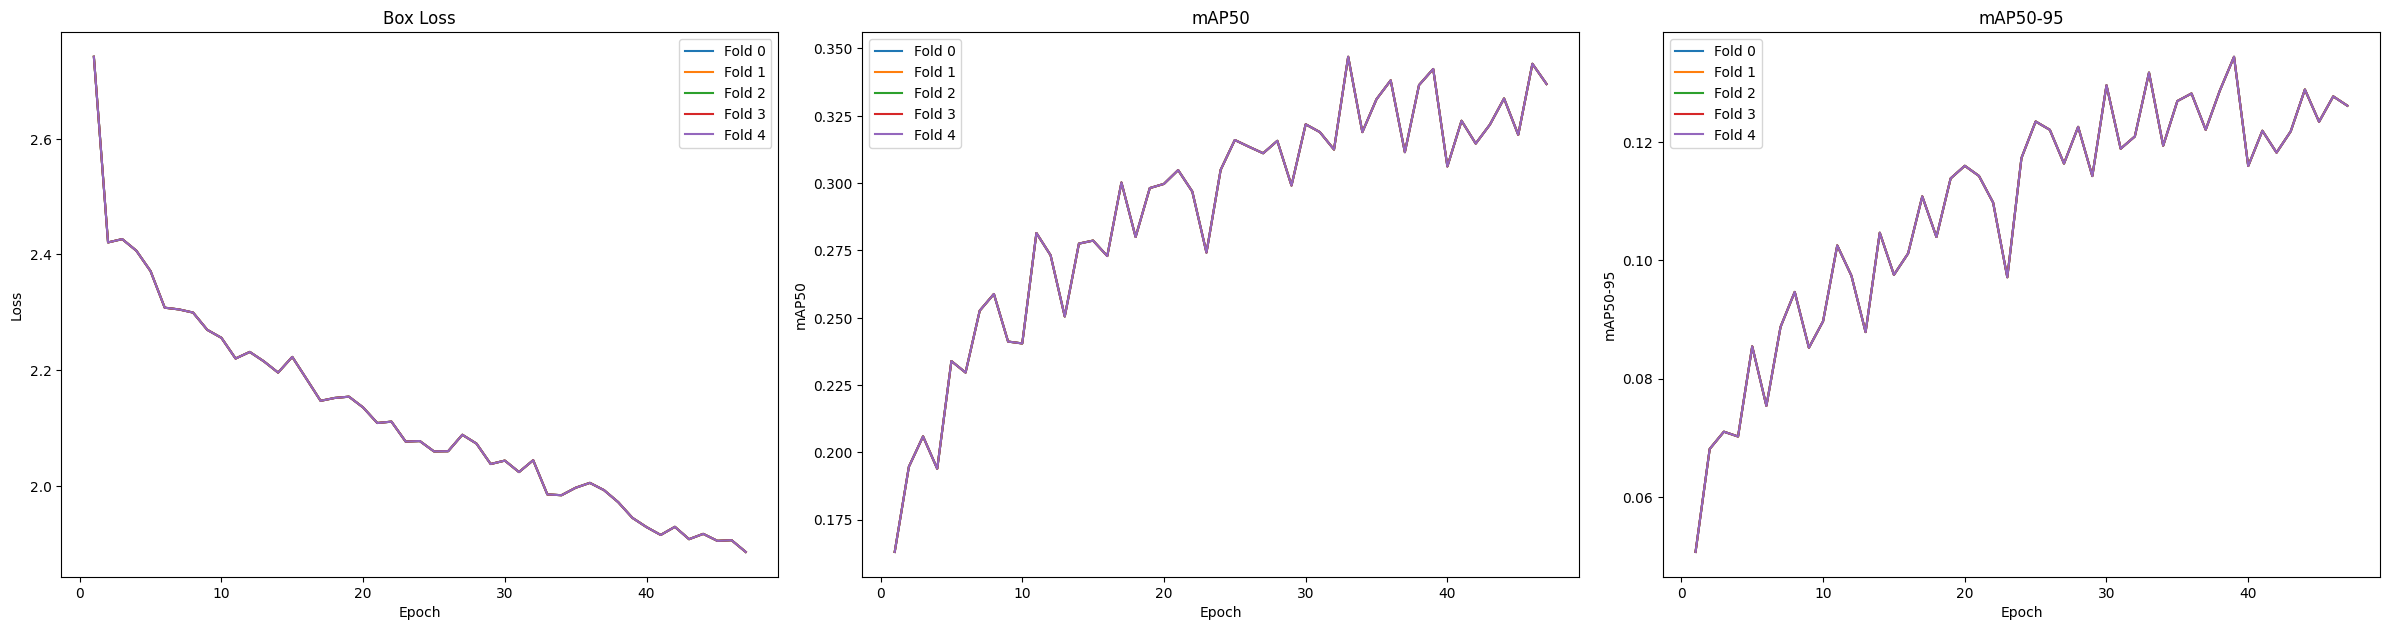

In [46]:
# Create custom visualizations from training logs
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Using Ultralytics built-in analysis
from pathlib import Path

def create_custom_plots(model = 'base_model', fold_range=5):
    """Create custom training plots from results"""
    
    plt.figure(figsize=(24, 12))
    
    for fold in range(fold_range):
        try:
            # Read results file if it exists
            results_file = f'{model_dir}/{model}/fold_{i}/results.csv'
            if Path(results_file).exists():
                df = pd.read_csv(results_file)
                
                # Plot training metrics
                plt.subplot(2, 3, 1)
                plt.plot(df['epoch'], df['train/box_loss'], label=f'Fold {fold}')
                plt.title('Box Loss')
                plt.xlabel('Epoch')
                plt.ylabel('Loss')
                plt.legend()
                
                plt.subplot(2, 3, 2)
                plt.plot(df['epoch'], df['metrics/mAP50(B)'], label=f'Fold {fold}')
                plt.title('mAP50')
                plt.xlabel('Epoch')
                plt.ylabel('mAP50')
                plt.legend()
                
                plt.subplot(2, 3, 3)
                plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label=f'Fold {fold}')
                plt.title('mAP50-95')
                plt.xlabel('Epoch')
                plt.ylabel('mAP50-95')
                plt.legend()
                
        except Exception as e:
            print(f"❌ Could not plot fold {fold}: {e}")
    
    plt.tight_layout()
    plt.show()

# Create custom plots
create_custom_plots(model = 'base_model')


📊 Analyzing Fold 0 Results...
✅ Training curves: /kaggle/working/data/models//base_model/fold_4/results.png


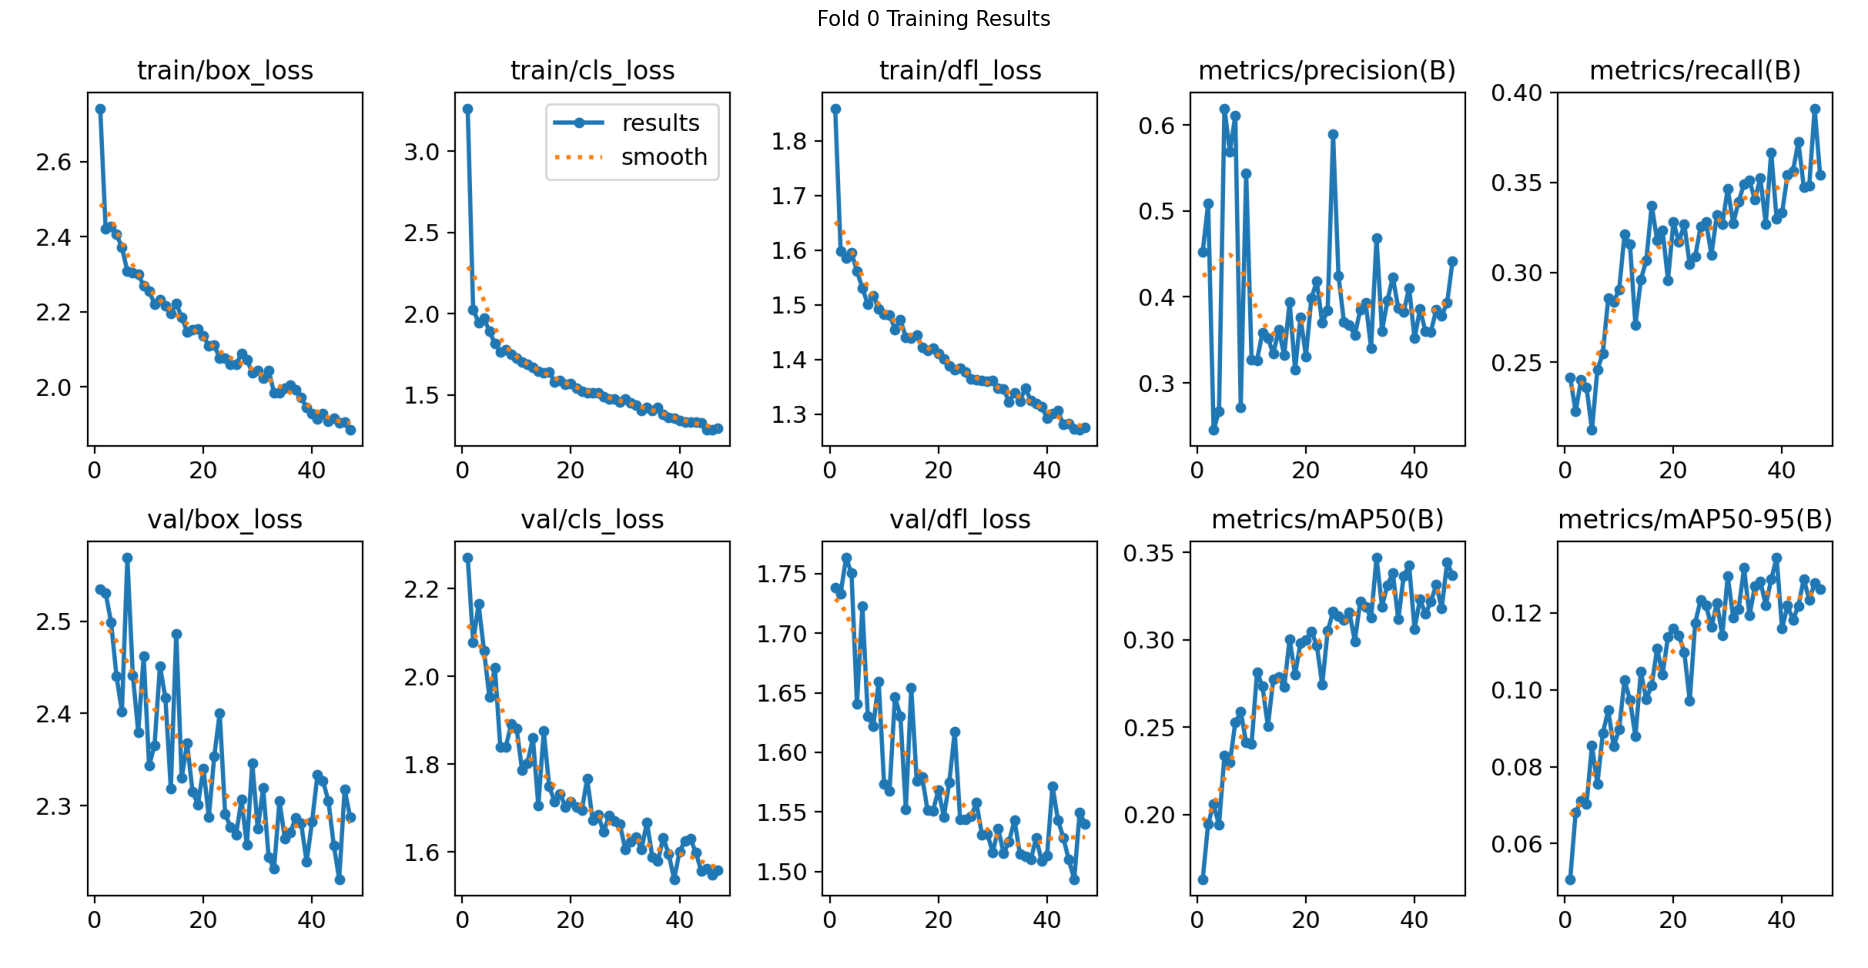


📊 Analyzing Fold 1 Results...
✅ Training curves: /kaggle/working/data/models//base_model/fold_4/results.png


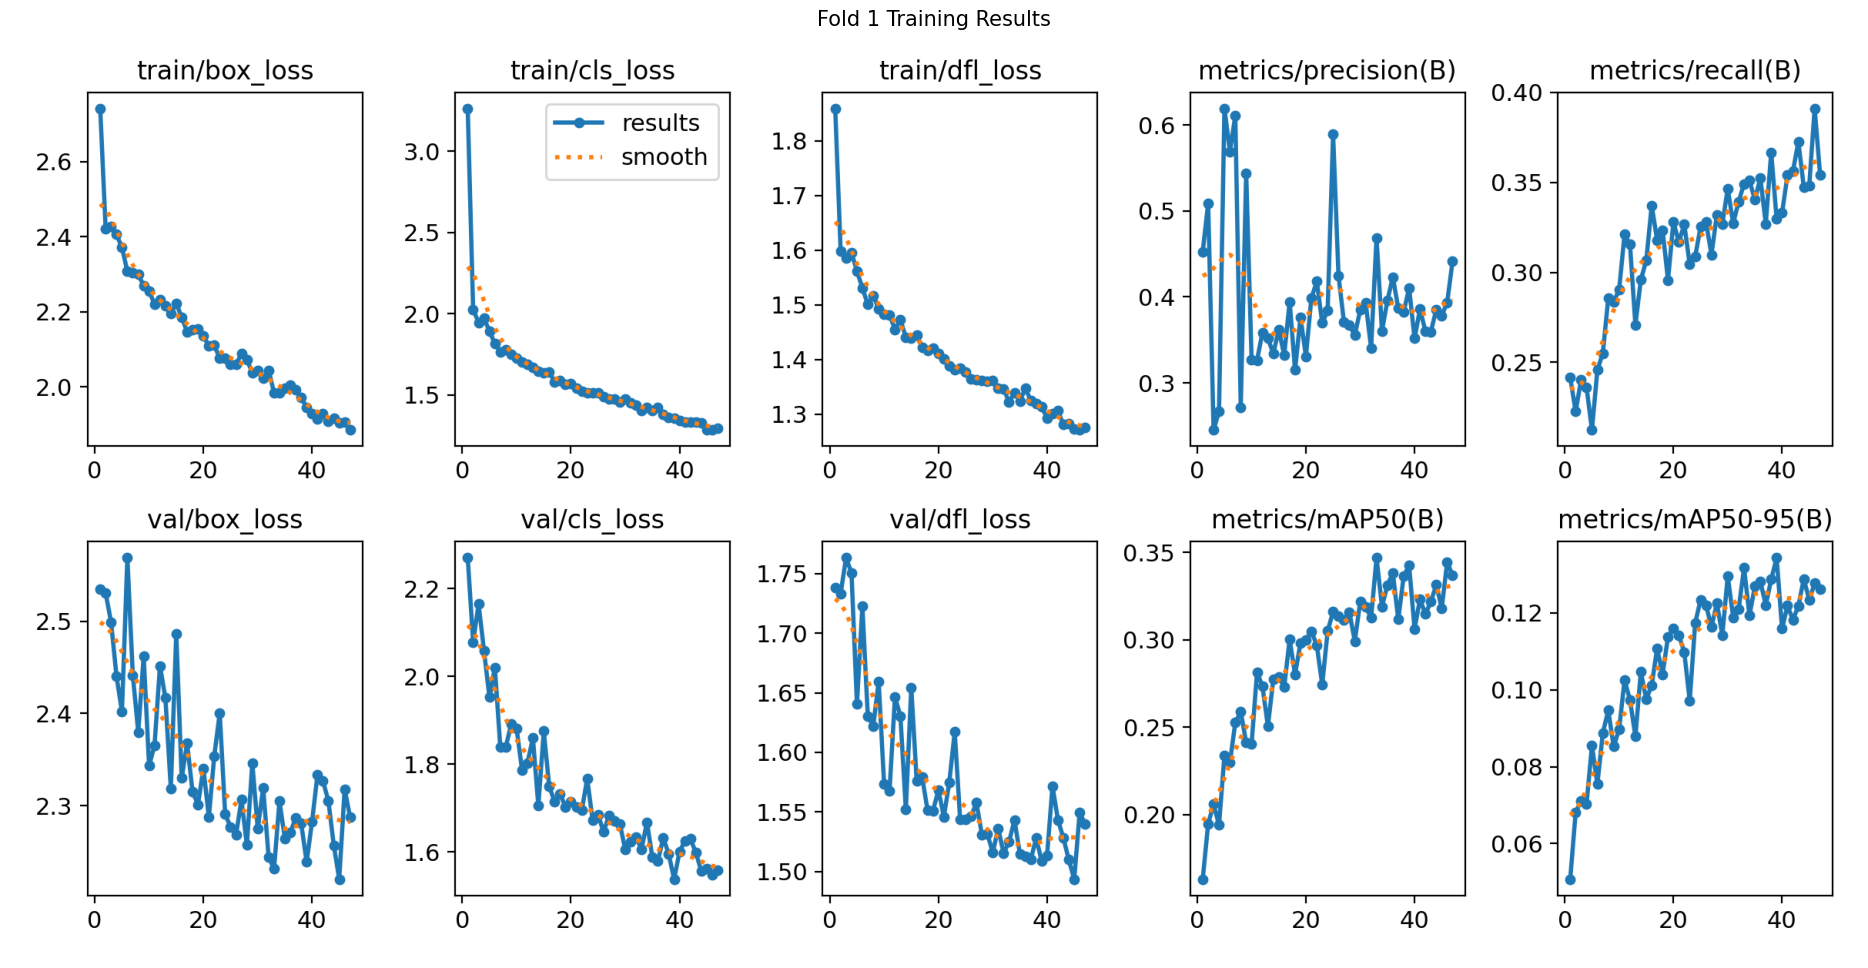


📊 Analyzing Fold 2 Results...
✅ Training curves: /kaggle/working/data/models//base_model/fold_4/results.png


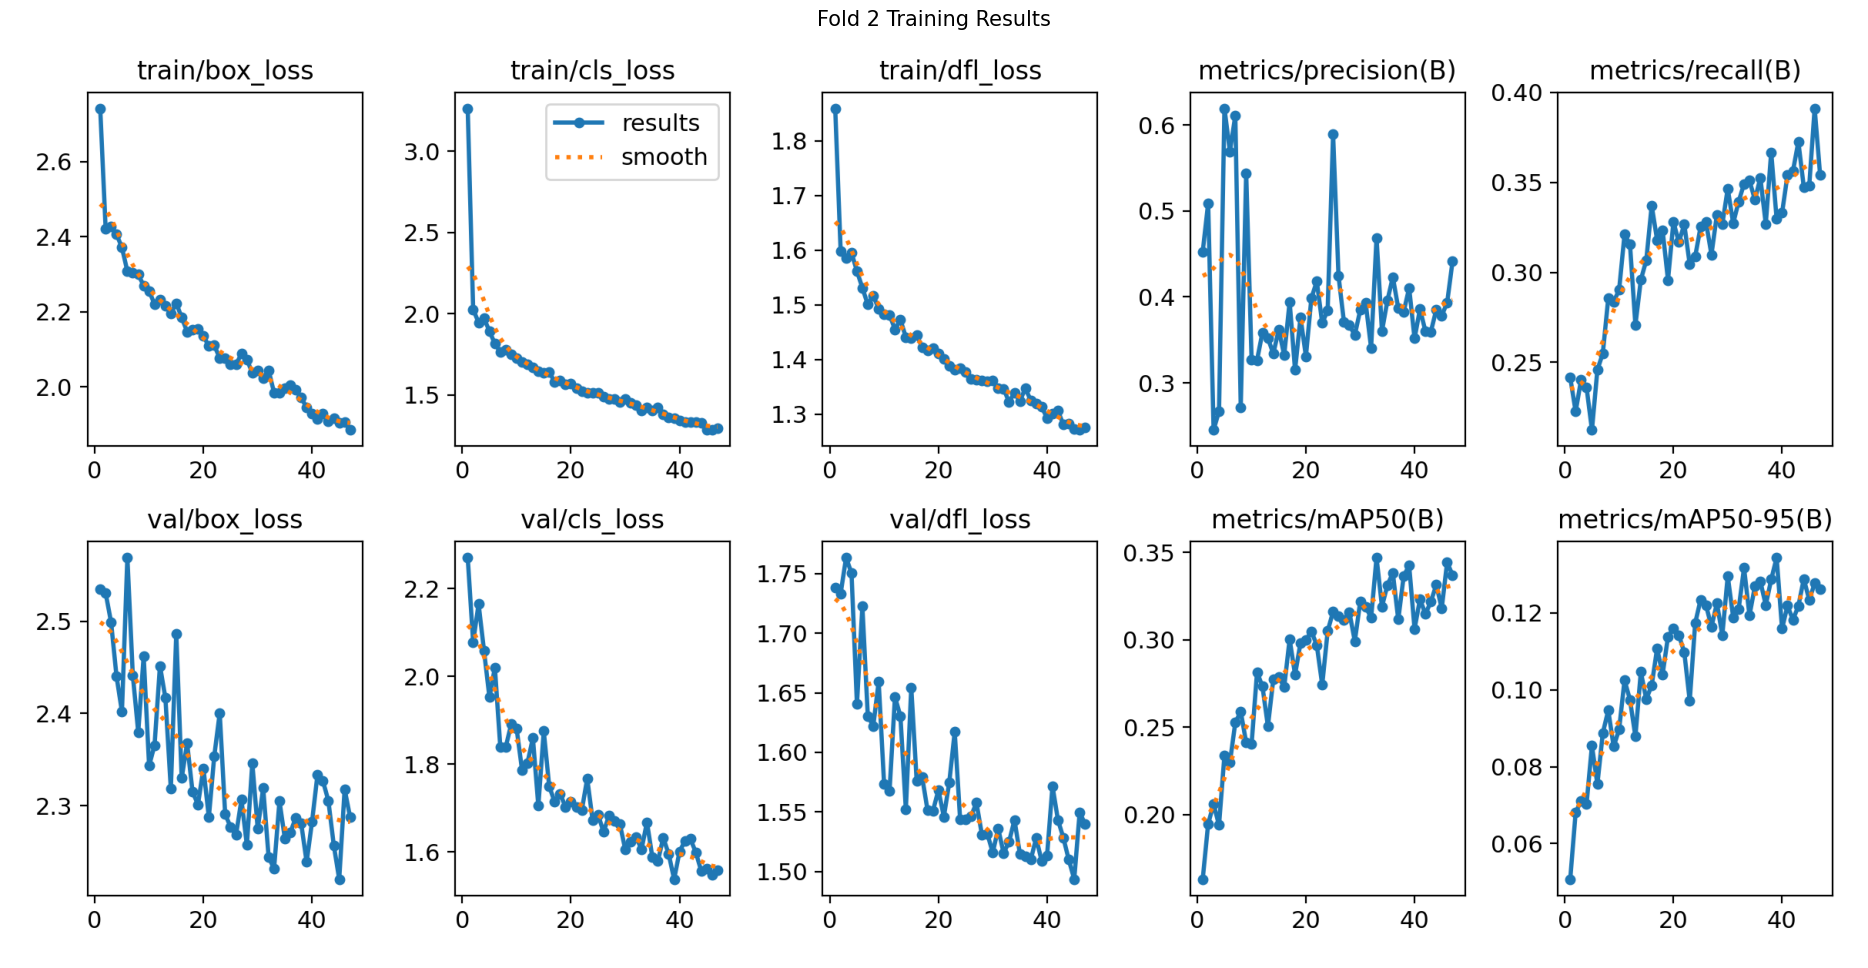


📊 Analyzing Fold 3 Results...
✅ Training curves: /kaggle/working/data/models//base_model/fold_4/results.png


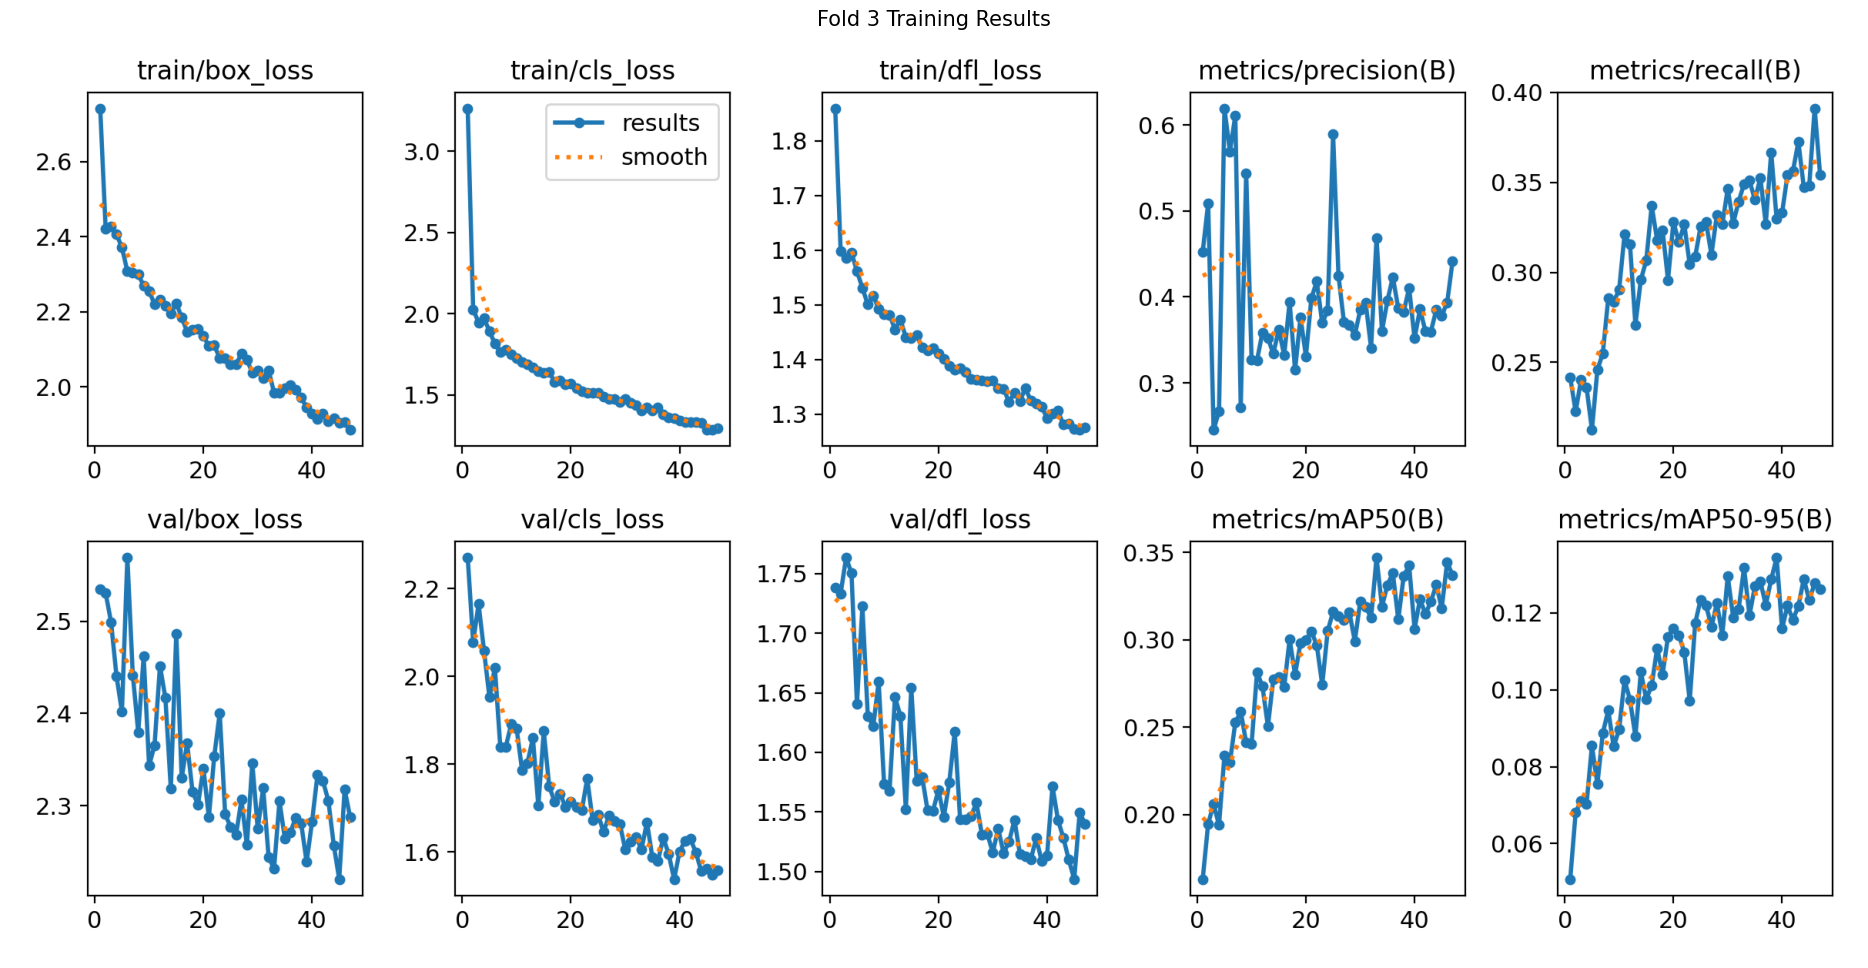


📊 Analyzing Fold 4 Results...
✅ Training curves: /kaggle/working/data/models//base_model/fold_4/results.png


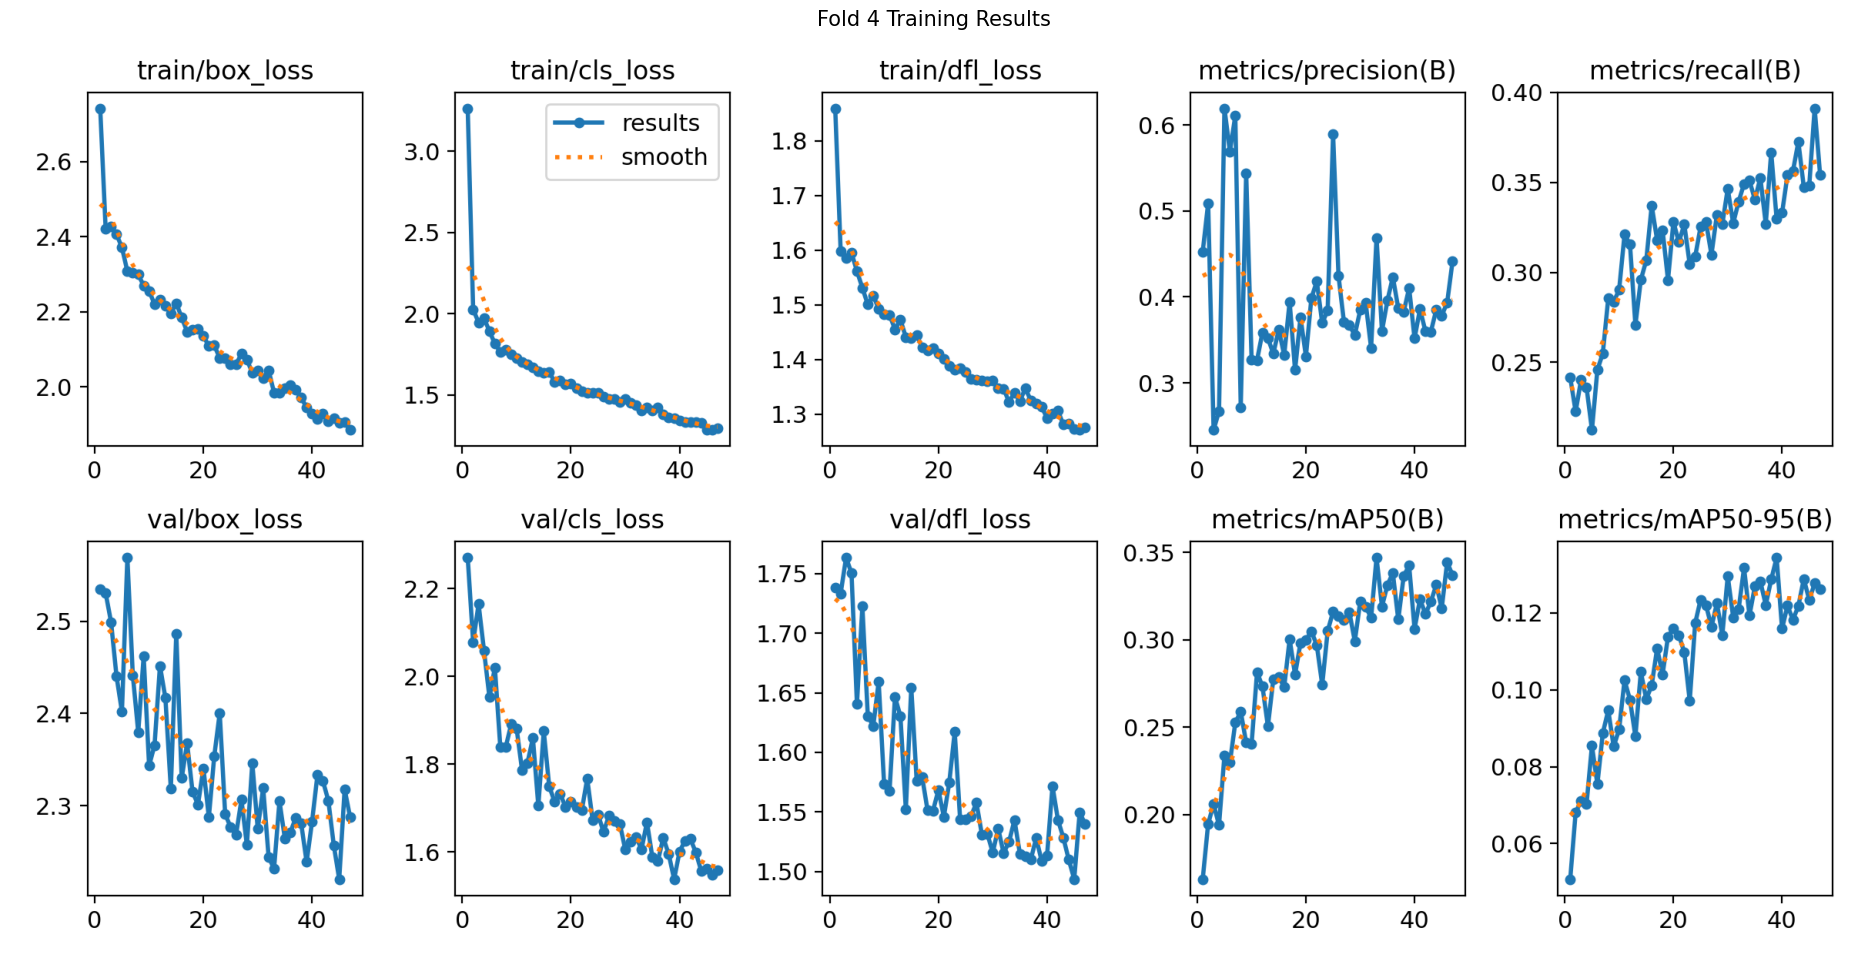

In [51]:
def analyze_training_results(fold_range=5):
    """Analyze training results without TensorBoard"""
    
    for fold in range(fold_range):
        try:
            print(f"\n📊 Analyzing Fold {fold} Results...")
            
            # Load the model (this loads training history)
            model_path = f'{model_dir}/base_model/fold_{i}/weights/best.pt'
            model = YOLO(model_path)
            
            # Plot results
            results_path = f'{model_dir}/base_model/fold_{i}/results.png'
            if Path(results_path).exists():
                print(f"✅ Training curves: {results_path}")
                
                # Display the image
                img = plt.imread(results_path)
                plt.figure(figsize=(24, 12))
                plt.imshow(img)
                plt.axis('off')
                plt.title(f'Fold {fold} Training Results', fontsize = 15)
                plt.show()
            
            # Also check for other plots
            confusion_path = f'{model_dir}/base_model/fold_{i}/val_confusion_matrix.png'
            if Path(confusion_path).exists():
                print(f"✅ Confusion matrix: {confusion_path}")
                
        except Exception as e:
            print(f"❌ Could not analyze fold {fold}: {e}")

# Run analysis
analyze_training_results()

From the above model performance, we can see that the mode is not acceptable to the required standards, especially when looking at the mAP50 and mAP50-95 values. However, we need to keep in mid this mode has been trained as is, which means its performance was acceptable for a frozen model trained on COCO 2018 train data. In order to extract much better performance, we will need to **<u>fine-tune</u>** the model, especially by *un-freezing* the model layers/backbones, increase complexity of the images like *augmentation* and even introduce callbacks such as *varying learning rates*, *checkpoints* etc.

In [52]:
# Clear GPU cache
torch.cuda.empty_cache()

# Set GPU to maximum performance mode
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

# GPU optimization settings
torch.backends.cudnn.benchmark = True
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

# Check GPU status
print(f"🎯 GPU Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"🎯 GPU Name: {torch.cuda.get_device_name()}")
    print(f"🎯 GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
    
    # Set device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"🎯 Using device: {device}")

🎯 GPU Available: True
🎯 GPU Name: Tesla T4
🎯 GPU Memory: 15.8 GB
🎯 Using device: cuda


### **Hyperparameter Justification: The YOLOv11s Optimization Strategy**

The training command for the WeldSight project, executed using the basic **YOLOv11s** model, is defined by a carefully selected set of hyperparameters. These parameters are not arbitrary; they represent a strategic configuration tuned to mitigate the specific challenges of the **LoHi-WELD dataset**, particularly the extreme **scale variance** (tiny Pores vs. large Deposits) and the need for high **localization precision** ($\text{mAP}@50:95$) in an industrial context. The justification for the primary keyword parameters centers on achieving the optimal balance between **convergence stability, generalization, and real-time inference speed.**

#### <u>A. Model Selection and Image Resolution</u>

##### 1. Model: `model='yolov11s.pt'`

The choice of the **YOLOv11s** (small) variant, initialized with weights pre-trained on the COCO dataset, is the foundation of the project's strategy.

* **Speed-Accuracy Trade-off:** The 's' (small) variant is selected over larger models (e.g., 'm' for medium or 'l' for large) to directly satisfy the industrial requirement of **real-time inspection ($\ge 30 \text{ FPS}$)**. While larger models offer higher peak accuracy, their complexity results in slower inference, making them impractical for high-throughput production lines. The 's' model provides a highly efficient backbone (fewer parameters, fewer FLOPs) that is sufficient for the four, well-defined defect classes.

* **Transfer Learning:** Initializing with pre-trained weights significantly reduces the required training time and prevents the network from learning basic visual primitives from scratch. The model immediately focuses its capacity on learning the fine-grained, unique textures and shapes of the weld defects.

##### 2. Image Size: `imgsz=800`

The decision to increase the standard YOLO input size of 640 pixels to **800 pixels** is a critical modification driven by the challenging nature of the LoHi-WELD dataset.

* **Mitigating Scale Variance:** Weld defects like **Pores** and fine **Discontinuities** often occupy only a tiny fraction of the original high-resolution image. When an image is resized down to 640x640, these minute defects risk being blurred, aggregated, or entirely lost to the model's receptive field.

* **Improving Localization:** Bumping the resolution to $800 \times 800$ ensures that more pixel data is retained for the smallest defects. This directly aids the **Bounding Box Regression** task, allowing the model to more precisely localize the defect boundaries, which is essential for achieving a competitive $\text{mAP}@50:95$ score. The trade-off is a slight increase in GPU memory usage and training time, but this sacrifice is necessary to maintain the required accuracy for small, critical defects.

* **Maintaining Resolutions:** The selection of an image size of $800$ pixels for input to the YOLO model is a strategic decision rooted in a balance between computational efficiency and feature preservation. This dimension is chosen because it is a multiple of the model's downsampling factor (typically 32 but also 16 and 8), which ensures that no internal rounding errors occur during the convolutional and pooling operations that progressively reduce spatial dimensions. Using $800$ rather than a smaller size like $640$ provides a higher resolution input, which helps the model detect smaller objects and finer details more effectively, thereby improving overall detection accuracy. Conversely, it avoids the extreme computational and memory overhead associated with very high resolutions like $1024$ or higher, making it a practical compromise for effective fine-tuning on standard GPU hardware. This size aligns with common practices in object detection pipelines where input dimensions are optimized to maintain a high signal-to-noise ratio for the features learned by the network while keeping training feasible. 


#### <u>B. Training Duration and Control</u>

##### 3. Epochs: `epochs=130`

The number of epochs is the total ceiling for the training duration. 130 epochs represents a **moderate yet sufficient** training horizon for a model initialized via transfer learning.

* **Convergence Expectation:** Transfer learning often allows models to reach a stable level of performance within 50 to 100 epochs. Setting the maximum to 130 provides a safe buffer, ensuring the model has ample opportunity to fully converge and fine-tune its weights against the specialized weld features.

* **The Safety Ceiling:** The 130-epoch count is treated as a maximum limit, not a required minimum. The actual training time is controlled by the **`patience`** parameter, detailed below.

##### 4. Early Stopping: `patience=50`

The use of an **Early Stopping** mechanism, typically set with `patience=15`, is paramount for model health and resource efficiency.

* **Overfitting Prevention:** Overfitting occurs when the model memorizes the training data, leading to perfect training loss but deteriorating performance on the unseen validation set ($\text{mAP}$). By monitoring the $\text{mAP}$ score on the validation data, the system stops training if no improvement is seen after 50 consecutive epochs. This ensures the saved weights (`best.pt`) are the most generalized version, maximizing robustness.

* **Efficiency:** It prevents wasted computational time. If the model stabilizes at epoch 80, the `patience` mechanism saves 50 epochs of unnecessary computation that would have occurred before hitting the 130-epoch ceiling.


#### <u>C. Optimization and Stability</u>

##### 5. Optimizer and Learning Rate: `optimizer='AdamW'`, `lr0=0.01`, `lrf=0.01`

The optimization scheme dictates how the model's weights are adjusted based on the calculated loss gradient.

* **Optimizer Choice:** **AdamW** (Adam with Weight Decay) is often preferred in modern computer vision over standard SGD (Stochastic Gradient Descent) for its faster initial convergence and ability to handle sparse gradients, which can be common with rare defect classes. The 'W' (Weight Decay) component acts as a regularization method, preventing extreme weight values and contributing to better generalization.

* **Learning Rate (`lr0`):** An initial learning rate of **0.01** is a standard starting point, providing a strong initial push to break out of poor local minima.

* **Learning Rate Scheduler (`cos_lr=True`):** The use of a **Cosine Annealing** scheduler is highly effective. Instead of a linear decay, the learning rate sinusoidally decreases from the initial value ($\text{lr0}$) to the final value ($\text{lrf}$) over the course of training. This gentle decay allows for large updates initially, then gradually reduces the step size as the model fine-tunes, promoting extremely stable convergence in the final epochs.


##### 6. Batch Size and Workers: `batch_size=16`, `workers=8`

These parameters are hardware-dependent and tuned for optimal use of the Kaggle/Colab GPU environment (e.g., NVIDIA T4 or V100).

* **Batch Size:** A batch size of **16** (or 32, depending on the model size) is selected to maximize GPU utilization without causing an "Out of Memory" (OOM) error. A larger batch size allows the model to calculate gradients based on more samples, often leading to a smoother, less noisy loss curve, which is beneficial for complex defects.

* **Workers:** The `workers` parameter (typically 8) controls the number of parallel CPU processes dedicated to data loading and augmentation. Setting this high is vital for preventing the **CPU from bottlenecking the GPU**, ensuring the GPU is constantly fed with the next batch of processed images for continuous training.


#### <u>D. Data Augmentation and Generalization</u>

##### 7. Augmentation Parameters: `hsv_h=0.015`, `scale=0.5`, `perspective=0.0`

Robust data augmentation is mandatory for a limited, specialized dataset like LoHi-WELD to enhance the model's ability to generalize to real-world conditions (rotation, lighting variation, changes in perspective).

* **HSV Adjustments (`hsv_h`, `hsv_s`, `hsv_v`):** These small randomized adjustments to Hue (color), Saturation, and Value (brightness) simulate realistic changes in industrial lighting (e.g., camera flash variance, dust). The small magnitude (e.g., $0.015$ for hue) prevents the model from being trained on unrealistic, cartoon-like colors.

* **Scaling (`scale=0.5`):** Randomly scales the images up to $50\%$ larger or smaller, forcing the model to detect defects consistently regardless of their physical size on the sensor, improving **scale invariance**.

* **Shear/Translation:** Parameters for geometric transformations (like horizontal flipping or random translation) are used to prevent the model from learning biases based on the defect's exact position or orientation. **Perspective** is typically set low or to zero since weld beads are usually viewed head-on.

By defining these parameters, the training command transforms the YOLOv11s model from a general object detector into a highly specialized, industrially optimized tool designed for the high-precision detection of weld defects.


### II. The Cross-Validation Cycle and Weight Management

The loop produces five distinct sets of trained weights (e.g., `best.pt` for each fold).

* **Training Phase:** In each fold, the model starts (via Transfer Learning) and iteratively minimizes the **Composite Loss** over the training set using the optimizer.

* **Validation Phase:** At the end of every epoch, the model is frozen, and a rapid validation pass is run on the unseen $20\%$ of data for that fold. This generates the Precision, Recall, and mAP metrics that determine if the model is improving and whether **Early Stopping** should be triggered.

* **The Best Model:** The weights corresponding to the epoch that achieved the highest $\text{mAP}@50:95$ on the validation set are saved as the `best.pt` file for that fold. These five saved `best.pt` files are the final, deployable assets of the project.

The successful completion of this cell transforms the raw data into optimized, validated detection models, ready for final metric aggregation and reporting.

In [54]:
# Fine-tune each fold with optimized settings
for fold in range(5):
    print(f"\n🚀 Fine-tuning Fold {fold} with GPU optimization...")
    
    fine_tune_model = YOLO('yolo11s.pt')
    fine_tune_res = fine_tune_model.train(
        # Data configuration
        data=f'/kaggle/working/data/fold_{fold}.yaml',
        
        # Training parameters - OPTIMIZED
        epochs=150,
        imgsz=800,
        batch=8,
        workers=8,  # Added for parallel data loading
        patience=15,  # Increased patience
        save_period=10,
        freeze = 4,
        seed = 1337,
        
        # Optimization - TUNED
        lr0=0.005,
        lrf=0.01,
        momentum=0.937,
        weight_decay=0.0005,
        warmup_epochs=3.0,
        warmup_momentum=0.8,
        warmup_bias_lr=0.1,
        
        # Augmentation - OPTIMIZED
        hsv_h=0.015,
        hsv_s=0.7,  
        hsv_v=0.4,
        degrees=0.0,
        translate=0.1,
        scale=0.5,
        shear=0.05,
        perspective=0.005,
        flipud=0.0,
        fliplr=0.5,
        mosaic=1.0,
        mixup=0.0,
        copy_paste=0.0,
        
        # GPU Optimization - NEW
        device=[0,1] if torch.cuda.is_available() else 'cpu',  # Use GPU 0 and 1
        half=True,  # Set to True if GPU supports FP16
        
        # Callbacks and logging
        plots=True,
        save=True,
        exist_ok=True,
        pretrained=True,
        optimizer='auto',
        verbose=True,
        
        # Project management
        project = os.path.join(model_dir, 'fine_tuned_model'),
        name=f'fold_{fold}_finetuned_optimized',
        cos_lr=True,
        close_mosaic=10,
        
        # Advanced - OPTIMIZED
        overlap_mask=True,
        mask_ratio=4,
        dropout=0.0,
        val=True,
        amp=True,  # Automatic Mixed Precision
        deterministic=False,  # Set to False for better performance
        single_cls=False,
        rect=False,
        resume=False
    )
    
    # Clear GPU cache between folds
    if torch.cuda.is_available():
        torch.cuda.empty_cache()


🚀 Fine-tuning Fold 0 with GPU optimization...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                       CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/working/data/fold_0.yaml, degrees=0.0, deterministic=False, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=4, half=True, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.005, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=fold_0_fi

/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1174: RuntimeWarning: divide by zero encountered in divide
  xy = (xy[:, :2] / xy[:, 2:3] if self.perspective else xy[:, :2]).reshape(n, 8)  # perspective rescale or affine


     83/150      1.71G      1.862       1.77      1.492         13        800: 100% ━━━━━━━━━━━━ 106/106 4.4it/s 24.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 11.5it/s 1.0s.1s
                   all        166       1599      0.379       0.32      0.309      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     84/150      1.71G      1.898      1.784      1.494         28        800: 100% ━━━━━━━━━━━━ 106/106 4.5it/s 23.5s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 10.9it/s 1.0s2s
                   all        166       1599      0.387      0.338      0.306      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     85/150      1.71G      1.895      1.766      1.484         26        800: 100% ━━━━━━━━━━━━ 106/106 4.5it/s 23.6s0.2s
                 Class     Images 

/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1174: RuntimeWarning: divide by zero encountered in divide
  xy = (xy[:, :2] / xy[:, 2:3] if self.perspective else xy[:, :2]).reshape(n, 8)  # perspective rescale or affine


     28/150      1.65G      2.034      1.962      1.636         70        800: 100% ━━━━━━━━━━━━ 105/105 4.2it/s 25.1s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 10.6it/s 1.0s2s
                   all        168       1565      0.364      0.271      0.259     0.0813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/150      1.65G      2.091      1.987      1.653         79        800: 100% ━━━━━━━━━━━━ 105/105 4.2it/s 25.0s0.2s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 11/11 11.1it/s 1.0s2s
                   all        168       1565       0.36      0.263       0.25     0.0829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     30/150      1.65G      2.062      1.997      1.647         79        800: 100% ━━━━━━━━━━━━ 105/105 4.4it/s 23.8s0.2s
                 Class     Images  

## <u>Performance Benchmarking: Final Evaluation and Diagnostic Plots</u>

This cell marks the final, crucial step of the WeldSight project: loading the **Best Model weights** and executing a comprehensive validation pass on the corresponding unseen **validation set**. This process generates the final, authoritative performance metrics and diagnostic visualizations required to assess the model's industrial readiness.

### Loading the Best Model Weights

The process begins by programmatically identifying and loading the weights (`best.pt`) from the specific fold that achieved the highest $\mathbf{mAP}@50:95$ score during the Cross-Validation process.

1.  **Selection Criterion Review:** The $\text{mAP}@50:95$ metric is prioritized because it evaluates not just detection accuracy ($\text{mAP}@50$, IoU $\ge 50\%$) but **localization precision** across strict thresholds up to $\text{IoU}=95\%$. In industrial applications, the bounding box must be extremely tight to the defect for downstream systems (e.g., robotic repair systems) to act accurately.

2.  **Model Instantiation:** The selected `best.pt` file—containing the final, optimized weights, biases, and architecture configuration—is loaded into a new instance of the YOLO object. This ensures all subsequent analyses are performed on the most generalized and high-performing set of parameters available.


The `model.val()` command is executed to formally run the trained model over its reserved, unseen validation set. This command re-generates all performance statistics and diagnostic artifacts, confirming the metrics recorded during the training log (`results.csv`). The subsequent code in this cell then loads and displays the three most important diagnostic plots generated by the YOLO framework. These visualizations move beyond single numbers (like mAP) to provide a deeper, class-by-class understanding of the model's success and failure modes.

In [84]:
# Evaluate all folds
best_fold = 0
best_map = 0
for fold in range(5):
    print(f'\n📊 Evaluating fold {fold}...')

    # Load the best model from the CURRENT fold
    best_fine_model = YOLO(f'{model_dir}/fine_tuned_model/fold_{fold}_finetuned_optimized/weights/best.pt')
    
    # Validate
    best_fine_res = best_fine_model.val(
        data = '/kaggle/working/data/test.yaml',
        split = 'test',
        plots = True,
        save_json = True
    )

    if best_fine_res.box.map > best_map:  # mAP50-95
        best_map = best_fine_res.box.map
        best_fold = fold

    print(f'✅ Fold {fold}: mAP50 - {best_fine_res.box.map50:.3f} \t mAP50-95 - {best_fine_res.box.map:.3f}')

best_model_path = f'{model_dir}fine_tuned_model/fold_{best_fold}_finetuned_optimized/weights/best.pt'

print('\n🎯 All folds evaluated.')
print(f"\nBEST MODEL: Fold {best_fold} with mAP50-95: {best_map:.4f}")
print(f'The best model can be found at: {best_model_path}')


📊 Evaluating fold 0...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1954.6±168.2 MB/s, size: 101.2 KB)
val: Scanning /kaggle/working/data/test/labels.cache... 159 images, 0 backgrounds, 2 corrupt: 100% ━━━━━━━━━━━━ 159/159 398.6Kit/s 0.0s
val: /kaggle/working/data/test/images/26_218.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0317]
val: /kaggle/working/data/test/images/26_90.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0159]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 3.2it/s 3.1s.2ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.504      0.409      0.414      0.166
                 stain        146        656      0.458      0.404      0.395      0.155
         discontinuity        157        458      0.531      0.788      0.717      0.271
               deposit        116        268      0.669      0.261      0.374      0.186
                  pore         33         77      0.358      0.182      0.172     0.0524
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Saving /kaggle/working/runs/detect/val34/predictions.json...
Results saved to /kaggle/working/runs/detect/val34
✅ Fold 0: mAP50 - 0.414 	 mAP50-95 - 0.166

📊 Evaluating fold 1...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2322.8±516.5 MB/s, size: 102.1 KB)
val: Scanning /kaggle/working/data/test/la

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.466      0.435      0.435      0.179
                 stain        146        656      0.511      0.389      0.411       0.17
         discontinuity        157        458      0.539      0.775      0.724      0.285
               deposit        116        268      0.484      0.343      0.394      0.198
                  pore         33         77      0.327      0.234      0.211     0.0615
Speed: 1.5ms preprocess, 6.9ms inference, 0.0ms loss, 2.3ms postprocess per image
Saving /kaggle/working/runs/detect/val35/predictions.json...
Results saved to /kaggle/working/runs/detect/val35
✅ Fold 1: mAP50 - 0.435 	 mAP50-95 - 0.179

📊 Evaluating fold 2...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1895.4±554.6 MB/s, size: 102.7 KB)
val: Scanning /kaggle/working/data/test/la

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.438      0.338      0.353      0.141
                 stain        146        656      0.492      0.328      0.333      0.132
         discontinuity        157        458      0.548      0.705      0.663      0.245
               deposit        116        268      0.527      0.279      0.325       0.16
                  pore         33         77      0.186      0.039     0.0895     0.0258
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Saving /kaggle/working/runs/detect/val36/predictions.json...
Results saved to /kaggle/working/runs/detect/val36
✅ Fold 2: mAP50 - 0.353 	 mAP50-95 - 0.141

📊 Evaluating fold 3...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1952.7±676.2 MB/s, size: 101.6 KB)
val: Scanning /kaggle/working/data/test/la

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459       0.46      0.395      0.398      0.157
                 stain        146        656      0.431      0.378      0.356      0.145
         discontinuity        157        458      0.531       0.76      0.698      0.254
               deposit        116        268      0.527      0.313      0.368      0.181
                  pore         33         77      0.352       0.13       0.17     0.0455
Speed: 1.2ms preprocess, 7.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Saving /kaggle/working/runs/detect/val37/predictions.json...
Results saved to /kaggle/working/runs/detect/val37
✅ Fold 3: mAP50 - 0.398 	 mAP50-95 - 0.157

📊 Evaluating fold 4...
Ultralytics 8.3.227 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1853.5±374.8 MB/s, size: 105.6 KB)
val: Scanning /kaggle/working/data/test/la

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        157       1459      0.501      0.416      0.434      0.181
                 stain        146        656      0.513      0.396      0.412      0.164
         discontinuity        157        458      0.562      0.771      0.734      0.294
               deposit        116        268      0.562      0.306      0.398      0.195
                  pore         33         77      0.369       0.19      0.192     0.0693
Speed: 1.4ms preprocess, 7.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Saving /kaggle/working/runs/detect/val38/predictions.json...
Results saved to /kaggle/working/runs/detect/val38
✅ Fold 4: mAP50 - 0.434 	 mAP50-95 - 0.181

🎯 All folds evaluated.

BEST MODEL: Fold 4 with mAP50-95: 0.1807
The best model can be found at: /kaggle/working/data/models/fine_tuned_model/fold_4_finetuned_optimized/weights/best.pt


### **<u>Qualitative Assessment: Visualizing Model Predictions vs. Ground Truth Overlays</u>**

This cell provides the essential **qualitative check** of the final model's performance. While the previous cells established the model's accuracy through rigorous quantitative metrics ($\mathbf{mAP}@50:95$), this step allows for a direct, visual verification of the model's ability to localize and classify weld defects on a raw image from the unseen validation set. This visualization bridges the gap between abstract numbers and tangible, industrial reality.

#### <u>The Mechanism of Visual Comparison</u>

The visualization is achieved by loading a sample image and plotting two distinct sets of bounding boxes onto it:

1.  **Ground Truth (GT) Boxes (Green):** These are the true, human-labeled annotations (the target output). They represent the perfect answer the model was trying to learn.

2.  **Prediction (Pred) Boxes (Red):** These are the output generated by the **Best Model** (`best.pt`) when running inference on the image and each box is accompanied by its predicted class label and a **confidence score** (for example, $\text{`Pore`}: 0.84$) as a text box annotation.

The model prediction is typically run using the **Optimal Confidence Threshold** determined by the F1 Score Curve to ensure the predictions are reflective of the best possible operational performance.

#### <u>Interpreting the Visual Outcomes</u>

The comparison of GT and Pred boxes reveals the three fundamental outcomes of an object detection system:

##### A. True Positives (TP) and the IoU Challenge (Successful Detections)

A True Positive occurs when a Prediction box overlaps a Ground Truth box by at least the specified $\mathbf{IoU}$ threshold (e.g., $50\%$) and the classification label matches. Visually, the Pred box is tightly aligned with the GT box, often appearing as a single, perfectly outlined box. This alignment confirms two things:

- **Semantic Correctness:** The model correctly identified the defect type (e.g., `Pore` $\rightarrow$ `Pore`).
    
- **Geometric Precision:** The model accurately localized the defect. The tightness of this overlap is directly quantified by the **Intersection over Union (IoU)** score.

This visualization is the perfect tool for understanding the $\text{mAP}$ metric. For a defect where the boxes are slightly misaligned (e.g., the IoU is $0.68$), the visualization shows a clear overlap, confirming the detection is a $\text{TP}$ at the $\text{IoU}=50\%$ and $\text{IoU}=65\%$ thresholds. However, that same small visual misalignment means the defect **fails** to be a $\text{TP}$ at the $\text{IoU}=70\%$ threshold. This visual evidence explains *why* the $\text{mAP}@50:95$ score drops significantly—the model's localization, while good, is not precise enough for the most stringent thresholds. High visual precision is a direct prerequisite for a high $\text{mAP}@50:95$.

#### B. False Positives (FP) (Over-detection/False Alarms)

A False Positive occurs when the model predicts a defect (draws a Prediction box) in a location where there is **no corresponding Ground Truth box**. Red prediction boxes are visible in regions of the image classified as background or in areas where a different defect exists but the model is confident in its misclassification. False Positives are equivalent to **False Alarms**. In an industrial environment, FPs lead to unnecessary stoppages, manual re-inspection, or robotic systems attempting to "repair" non-existent flaws. The model's **Precision** is penalized by every False Positive. The visualization helps determine if the FPs are clustered around certain challenging image features (e.g., shadow lines, texture variations) that the model confuses for a defect.

#### C. False Negatives (FN) (Missed Detections)

A False Negative occurs when a **Ground Truth box is present** (e.g., a green box) but the model **fails to generate a Prediction box** at that location. A green box stands alone on the image, un-overlapped by a predicted box. False Negatives are the **most dangerous failure mode** in safety-critical inspection. Missing a critical defect (like a Discontinuity or severe Pore) can lead to component failure. The model's **Recall** is penalized by every False Negative. The visualization reveals if the missed defects are systematically linked to:

1.  **Small Size:** The defect is too small to be picked up by the model's minimum detection scale.

2.  **Low Contrast:** The defect blends too seamlessly with the weld background.

3.  **Ambiguity:** The defect closely resembles features in the background.

By visually scrutinizing several sample images, this cell provides a complete, actionable summary of the model's strengths (tight localization on large defects) and weaknesses (difficulty with small defects or high FP rate on background textures), guiding any future iterative improvements to the model or data augmentation strategy.


🔍 Testing on: 26_8.jpg


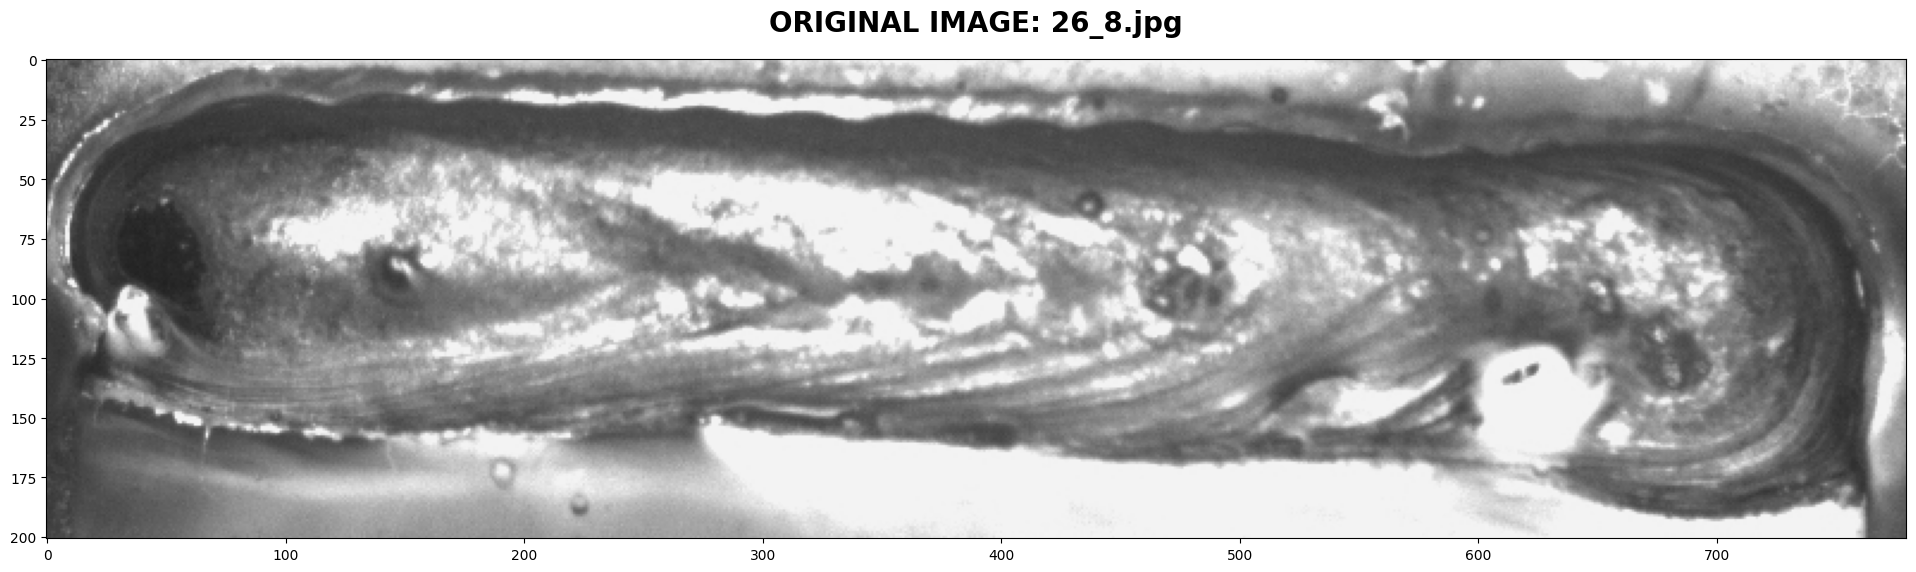

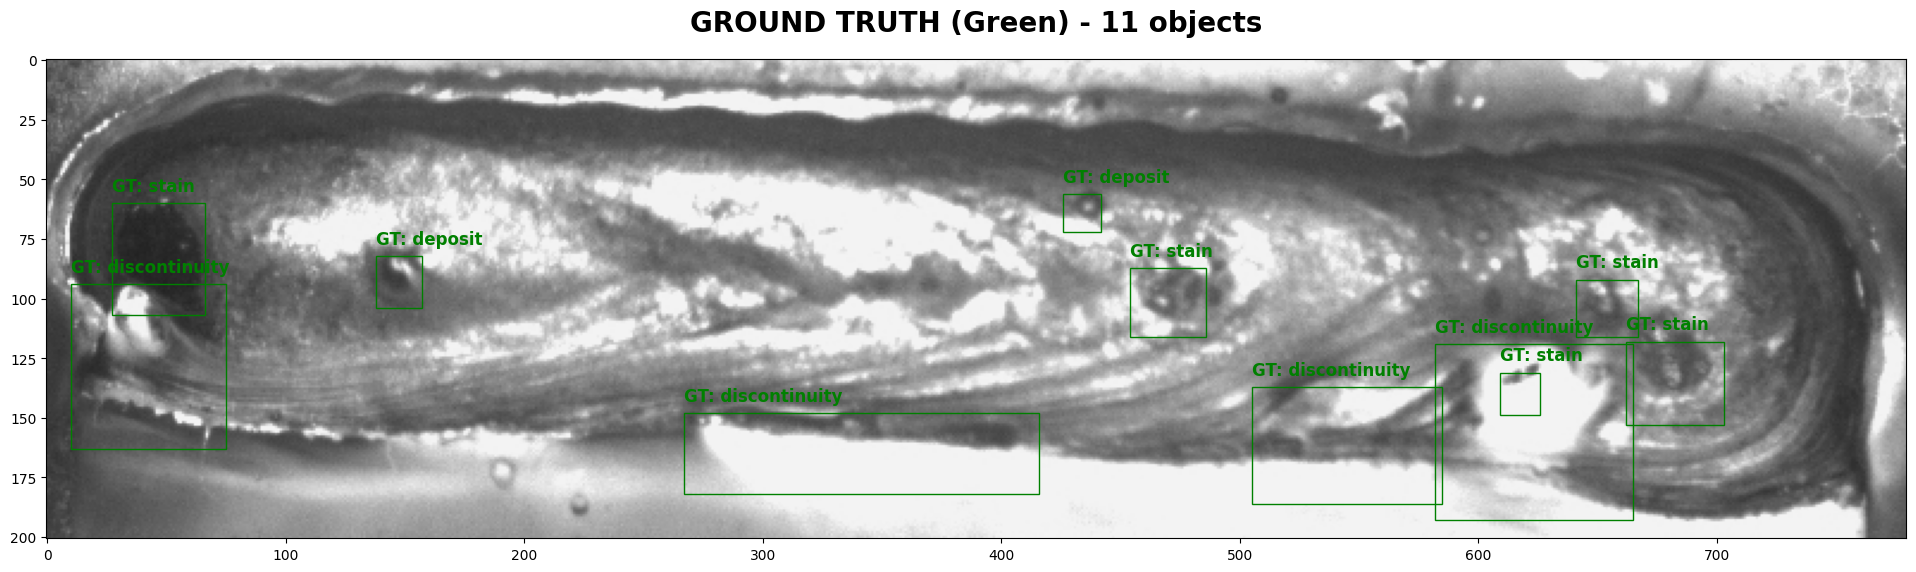


image 1/1 /kaggle/working/data/test/images/26_8.jpg: 224x800 2 stains, 4 discontinuitys, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 800)


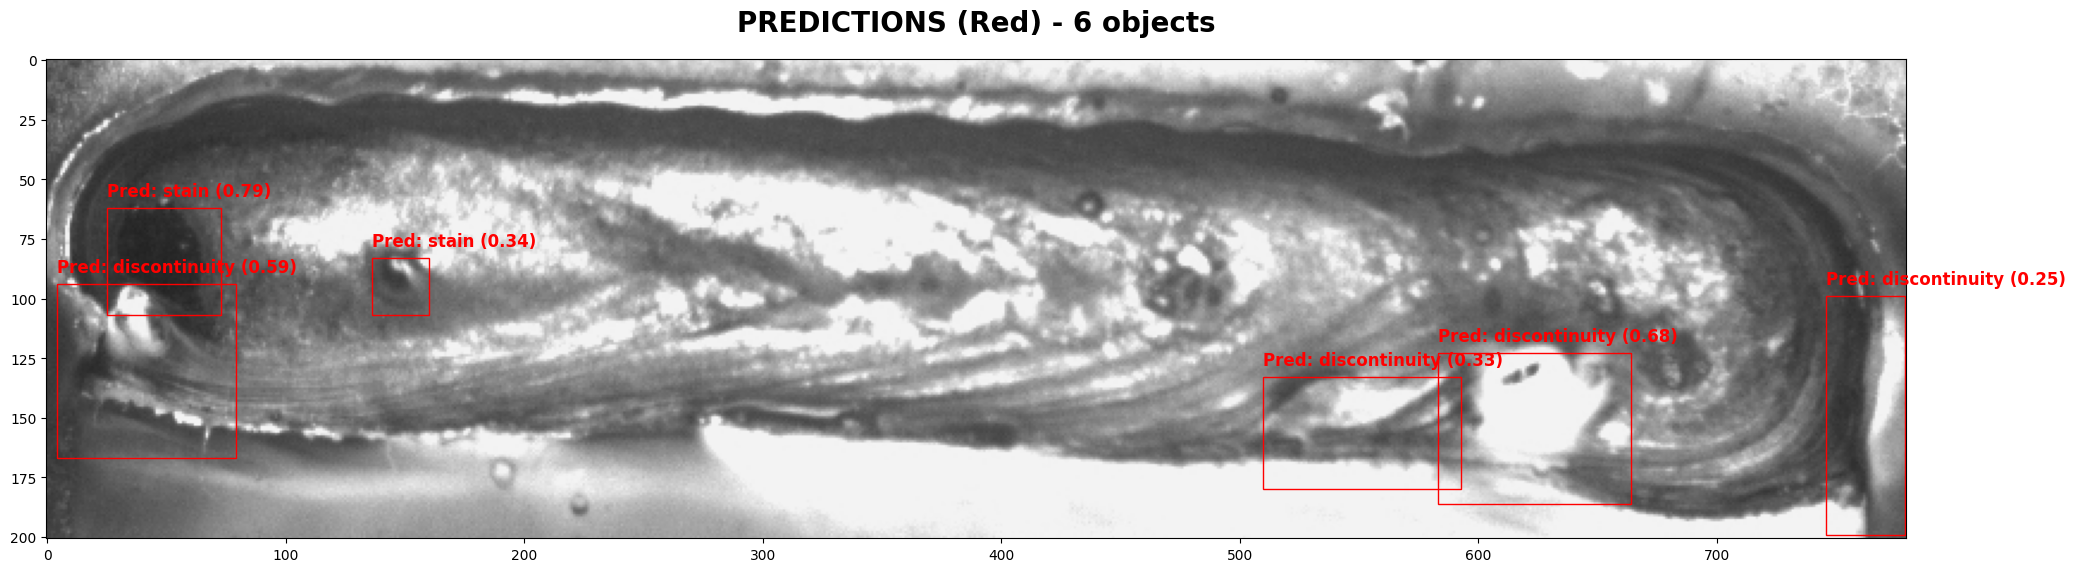

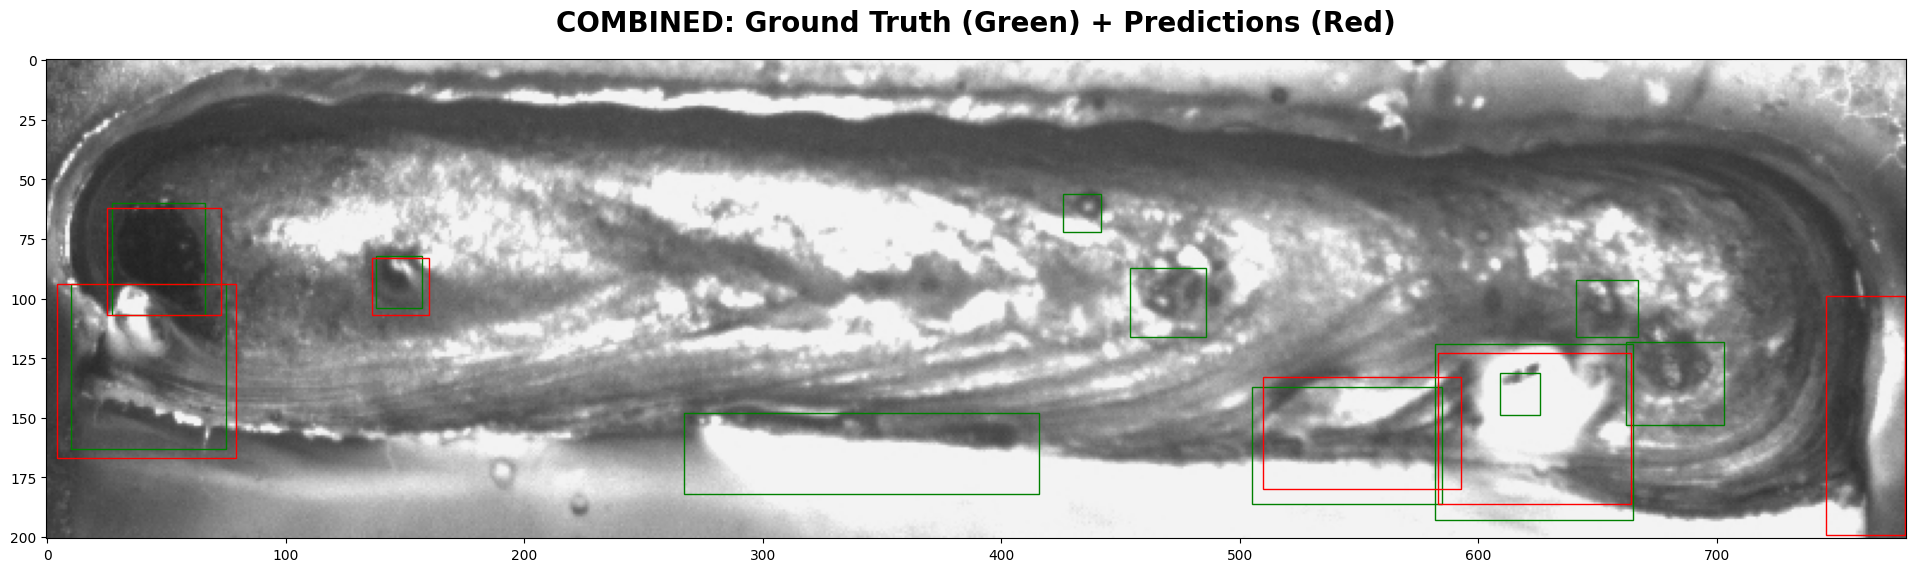


📊 Summary:
   Ground Truth objects: 11
   Predicted objects: 6


In [85]:
# Import the required libraries for the prediction analysis
import cv2
import random

# Set random seed
random.seed(0)

# Load model and pick random image
final_model = YOLO(best_model_path)
test_images_path = '/kaggle/working/data/test/images'
test_labels_path = '/kaggle/working/data/test/labels'

all_test_images = sorted([i for i in os.listdir(test_images_path)])
random_image = random.choice(all_test_images)
image_path = os.path.join(test_images_path, random_image)

print(f"\n🔍 Testing on: {random_image}")

# Get corresponding label
image_name = Path(random_image).stem
label_path = os.path.join(test_labels_path, f"{image_name}.txt")

# Read image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 1. ORIGINAL IMAGE
plt.figure(figsize=(24, 8))
plt.imshow(image_rgb)
plt.axis('on')
plt.title(f'ORIGINAL IMAGE: {random_image}', fontsize=20, fontweight='bold', pad=20)
plt.show()

# 2. GROUND TRUTH (Green)
plt.figure(figsize=(24, 8))
plt.imshow(image_rgb)
plt.axis('on')

gt_count = 0
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            if line:
                try:
                    class_id, x_center, y_center, width, height = map(float, line.split())
                    
                    # Convert YOLO to pixel coordinates
                    h, w = image.shape[:2]
                    x1 = int((x_center - width/2) * w)
                    y1 = int((y_center - height/2) * h)
                    x2 = int((x_center + width/2) * w) 
                    y2 = int((y_center + height/2) * h)
                    
                    # Draw rectangle
                    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                       edgecolor='green', facecolor='none', linewidth=1)
                    plt.gca().add_patch(rect)
                    plt.text(x1, y1-5, f'GT: {model.names[int(class_id)]}', 
                            color='green', fontsize=12, fontweight='bold')
                    gt_count += 1
                except ValueError:
                    continue

plt.title(f'GROUND TRUTH (Green) - {gt_count} objects', fontsize=20, fontweight='bold', pad=20)
plt.show()

# 3. PREDICTIONS (Red)
plt.figure(figsize=(24, 8))
plt.imshow(image_rgb)
plt.axis('on')

results = final_model.predict(image_path, conf=0.25)

for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = box.conf[0]
    class_id = int(box.cls[0])
    
    # Draw rectangle
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                       edgecolor='red', facecolor='none', linewidth=1)
    plt.gca().add_patch(rect)
    plt.text(x1, y1-5, f'Pred: {final_model.names[class_id]} ({conf:.2f})', 
            color='red', fontsize=12, fontweight='bold')

plt.title(f'PREDICTIONS (Red) - {len(results[0].boxes)} objects', fontsize=20, fontweight='bold', pad=20)
plt.show()

# 4. COMBINED (Green + Red)
plt.figure(figsize=(24, 8))
plt.imshow(image_rgb)
plt.axis('on')

# Draw ground truth
if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f.readlines():
            line = line.strip()
            if line:
                try:
                    class_id, x_center, y_center, width, height = map(float, line.split())
                    h, w = image.shape[:2]
                    x1 = int((x_center - width/2) * w)
                    y1 = int((y_center - height/2) * h)
                    x2 = int((x_center + width/2) * w)
                    y2 = int((y_center + height/2) * h)
                    
                    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                                       edgecolor='green', facecolor='none', linewidth=1)
                    plt.gca().add_patch(rect)
                except ValueError:
                    continue

# Draw predictions
for box in results[0].boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    conf = box.conf[0]
    class_id = int(box.cls[0])
    
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, 
                       edgecolor='red', facecolor='none', linewidth=1)
    plt.gca().add_patch(rect)

plt.title(f'COMBINED: Ground Truth (Green) + Predictions (Red)', fontsize=20, fontweight='bold', pad=20)
plt.show()

print(f"\n📊 Summary:")
print(f"   Ground Truth objects: {gt_count}")
print(f"   Predicted objects: {len(results[0].boxes)}")

### <u>Visualising Model Performance</u>

#### A. Confusion Matrix (The Classification Report)

The Confusion Matrix is the most direct assessment of the model's classification performance. It is an $\mathbf{N \times N}$ grid (where N=4 for the four defect classes plus the background) that visually summarizes every detection outcome.

* **Interpretation:**
    * **Diagonal Cells (True Positives, TP):** High, bright values along the diagonal indicate successful classification (e.g., predicting 'Pore' when the truth was 'Pore'). The diagonal should dominate the entire matrix.
    
    * **Off-Diagonal Rows (False Negatives, FN):** Low values in the off-diagonal cells of a **row** (reading left-to-right) indicate that a Ground Truth object of that class was either missed (FN) or misclassified. For instance, if the 'Discontinuity' row shows a high value in the 'Stain' column, it means the model frequently confused a critical discontinuity for a less-critical stain. This highlights a severe problem that needs to be addressed via further data augmentation or class re-weighting.
    
    * **Off-Diagonal Columns (False Positives, FP):** High values in the off-diagonal cells of a **column** indicate that the model frequently predicted a class that wasn't there. For example, a bright value in the 'Pore' column opposite the 'Background' row means the model frequently generated false alarms for Pores in regions where no defect existed.

In the WeldSight system, the Confusion Matrix is used to check for the most dangerous failure modes: **misclassifying a critical defect (like `Discontinuity`) as a non-critical one (like `Stain`)**.

#### B. Precision-Recall (PR) Curve

The PR Curve plots **Precision** against **Recall** across a range of confidence thresholds (from 0% to 100%). It is the graphical source of the **Average Precision (AP)** score. The area under the PR curve for each class is its AP score.

* **Interpretation:**
    
    * **Ideal Curve:** An ideal curve hugs the top-right corner of the plot (Precision=1.0, Recall=1.0). The closer the curve is to this corner, the higher the AP for that class.
    
    * **The Trade-off:** The curve visually demonstrates the inherent trade-off. To achieve very high **Recall** (catching all defects, $\ge 95\%$ target), the model typically has to lower its internal confidence threshold, which inevitably leads to a reduction in **Precision** (more false alarms).

The plot typically shows four separate colored lines (one for each defect class). Comparing these lines immediately reveals which classes the model is most competent at (curve closest to the top-right) and which classes it struggles with (curve closer to the bottom-left). For the LoHi-WELD dataset, the curve for small **Pores** is likely lower than for large **Deposits** due to the difficulty of localizing tiny objects precisely.

#### C. F1 Score Curve

The F1 Score is the **harmonic mean** of Precision and Recall: $$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$ This metric provides a single, balanced assessment of a model's performance. The F1 curve plots this score against the **confidence threshold**.

* **Interpretation and Deployment Threshold:** The most important feature of the F1 curve is its **peak**. The confidence threshold corresponding to this peak (e.g., $0.45$ or $0.55$) is the **optimal confidence threshold** for deploying the model.
    
    * Setting the deployment threshold *at* this peak maximizes the system's overall balance between catching defects and minimizing false alarms.
    
    * If the user wishes to prioritize avoiding false alarms (higher Precision), they would select a threshold slightly *higher* than the peak.
    
    * If the user must prioritize catching every possible defect (higher Recall), they would select a threshold slightly *lower* than the peak.

The code identifies this peak threshold, providing a direct, actionable parameter for how the final `model.predict()` function should be configured when running inference on the production line.

<br>

By displaying these three plots, the notebook concludes its quantitative assessment, providing not just the final $\text{mAP}$ scores but also the necessary visual evidence to understand the model's strengths, weaknesses, and optimal configuration for deployment.

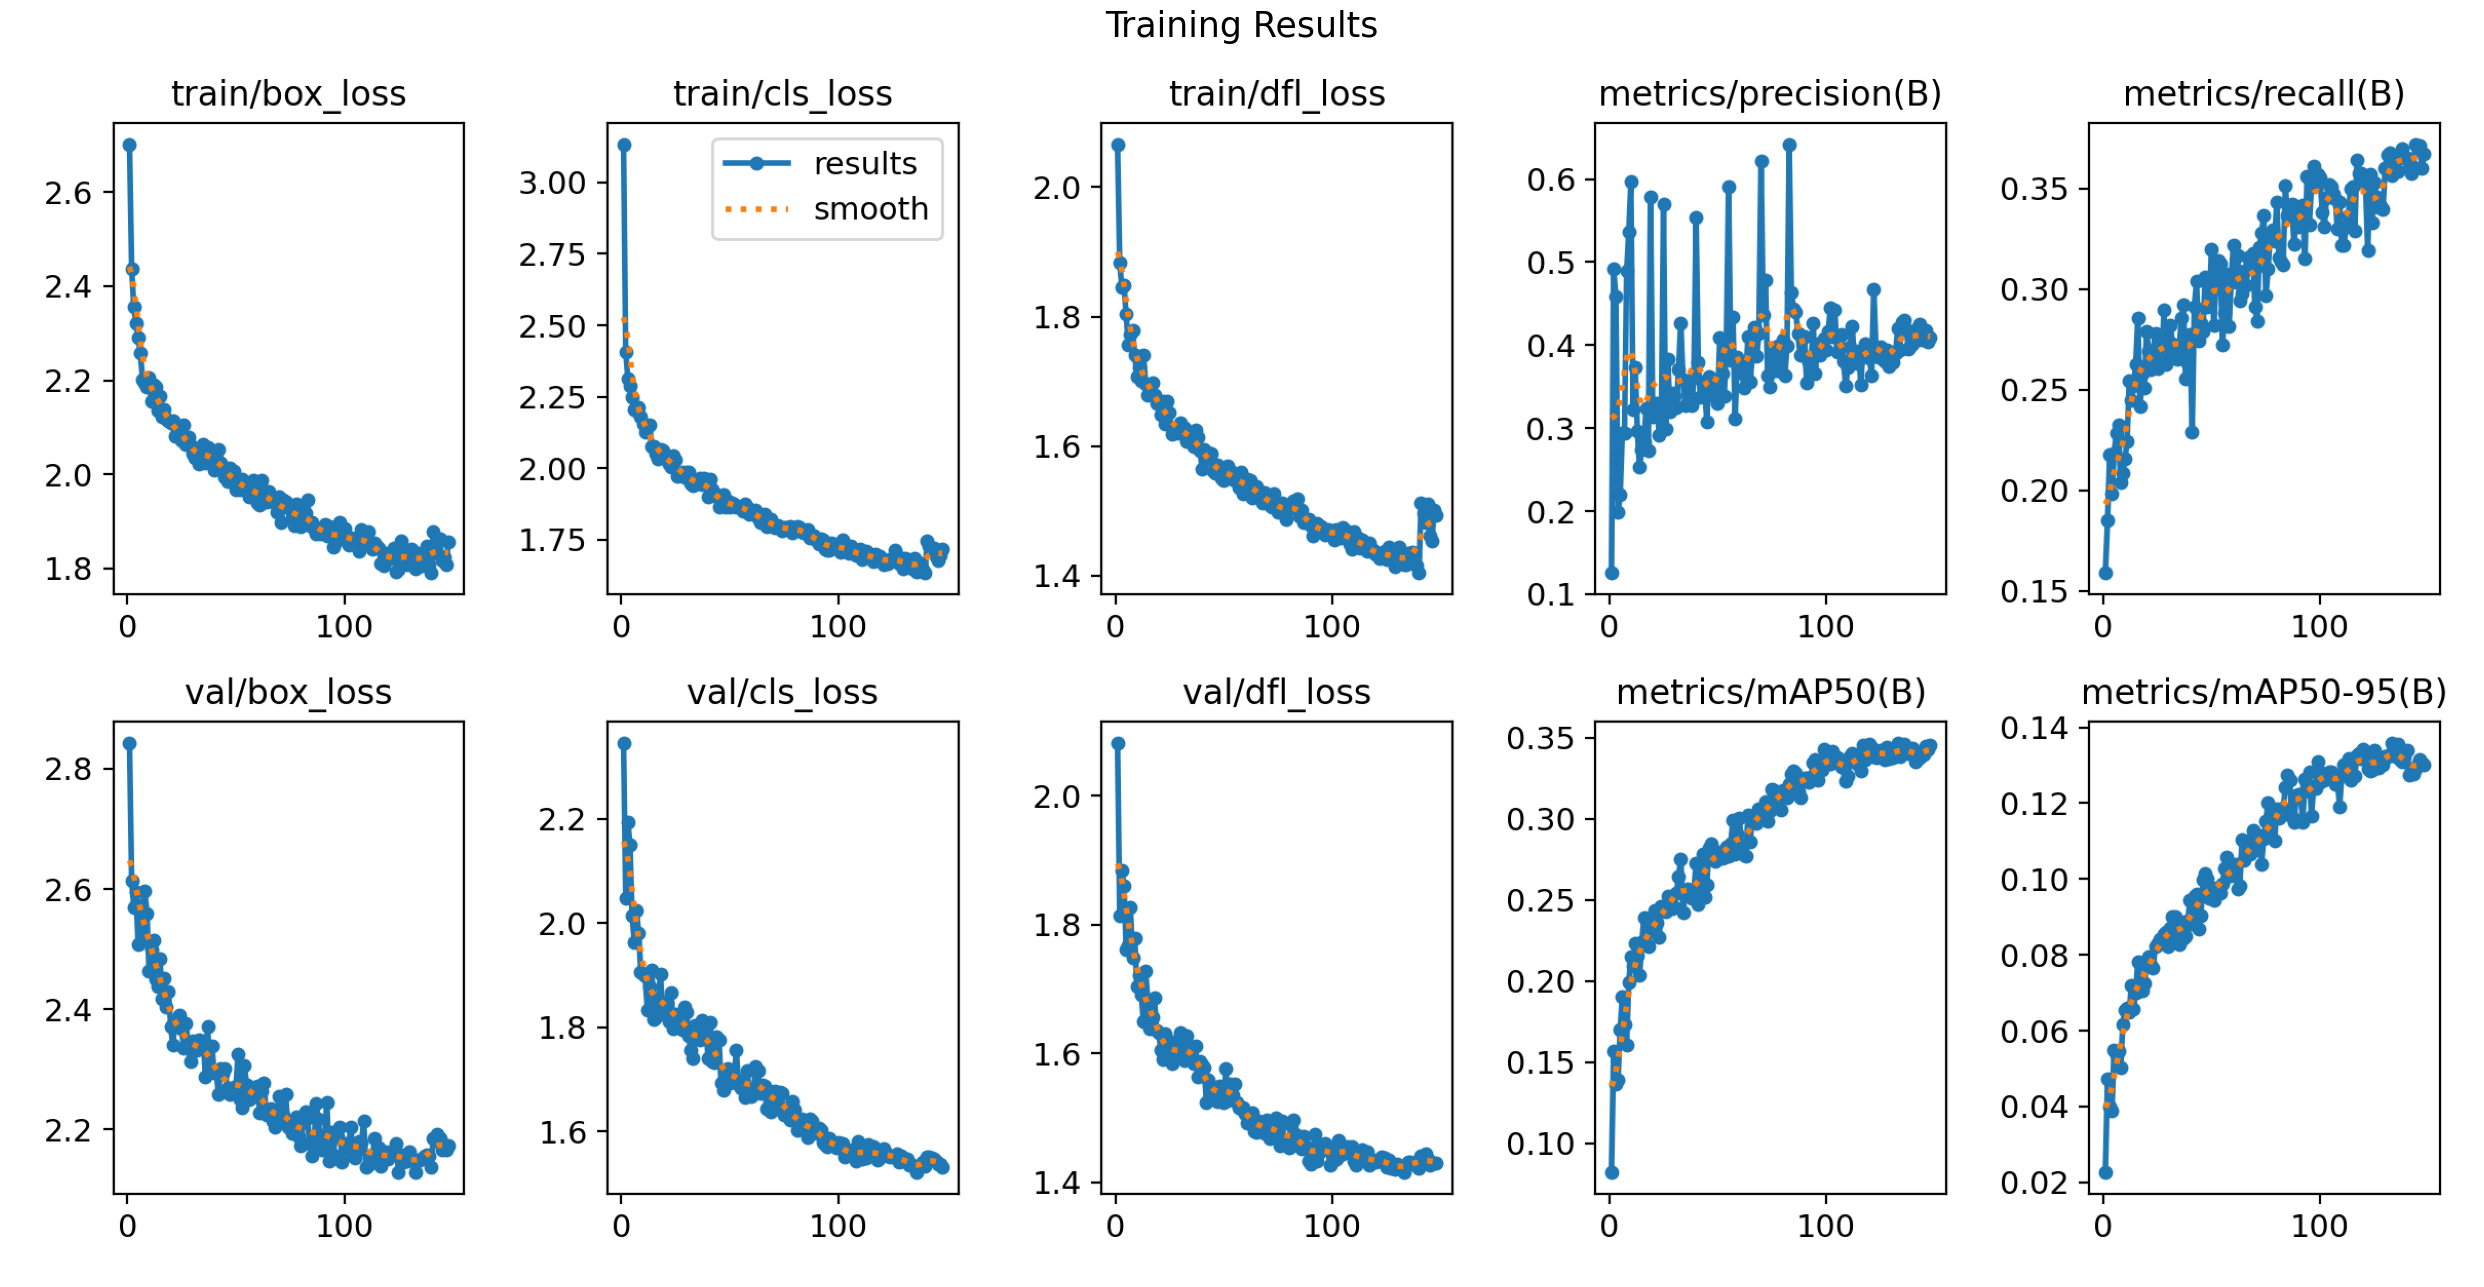

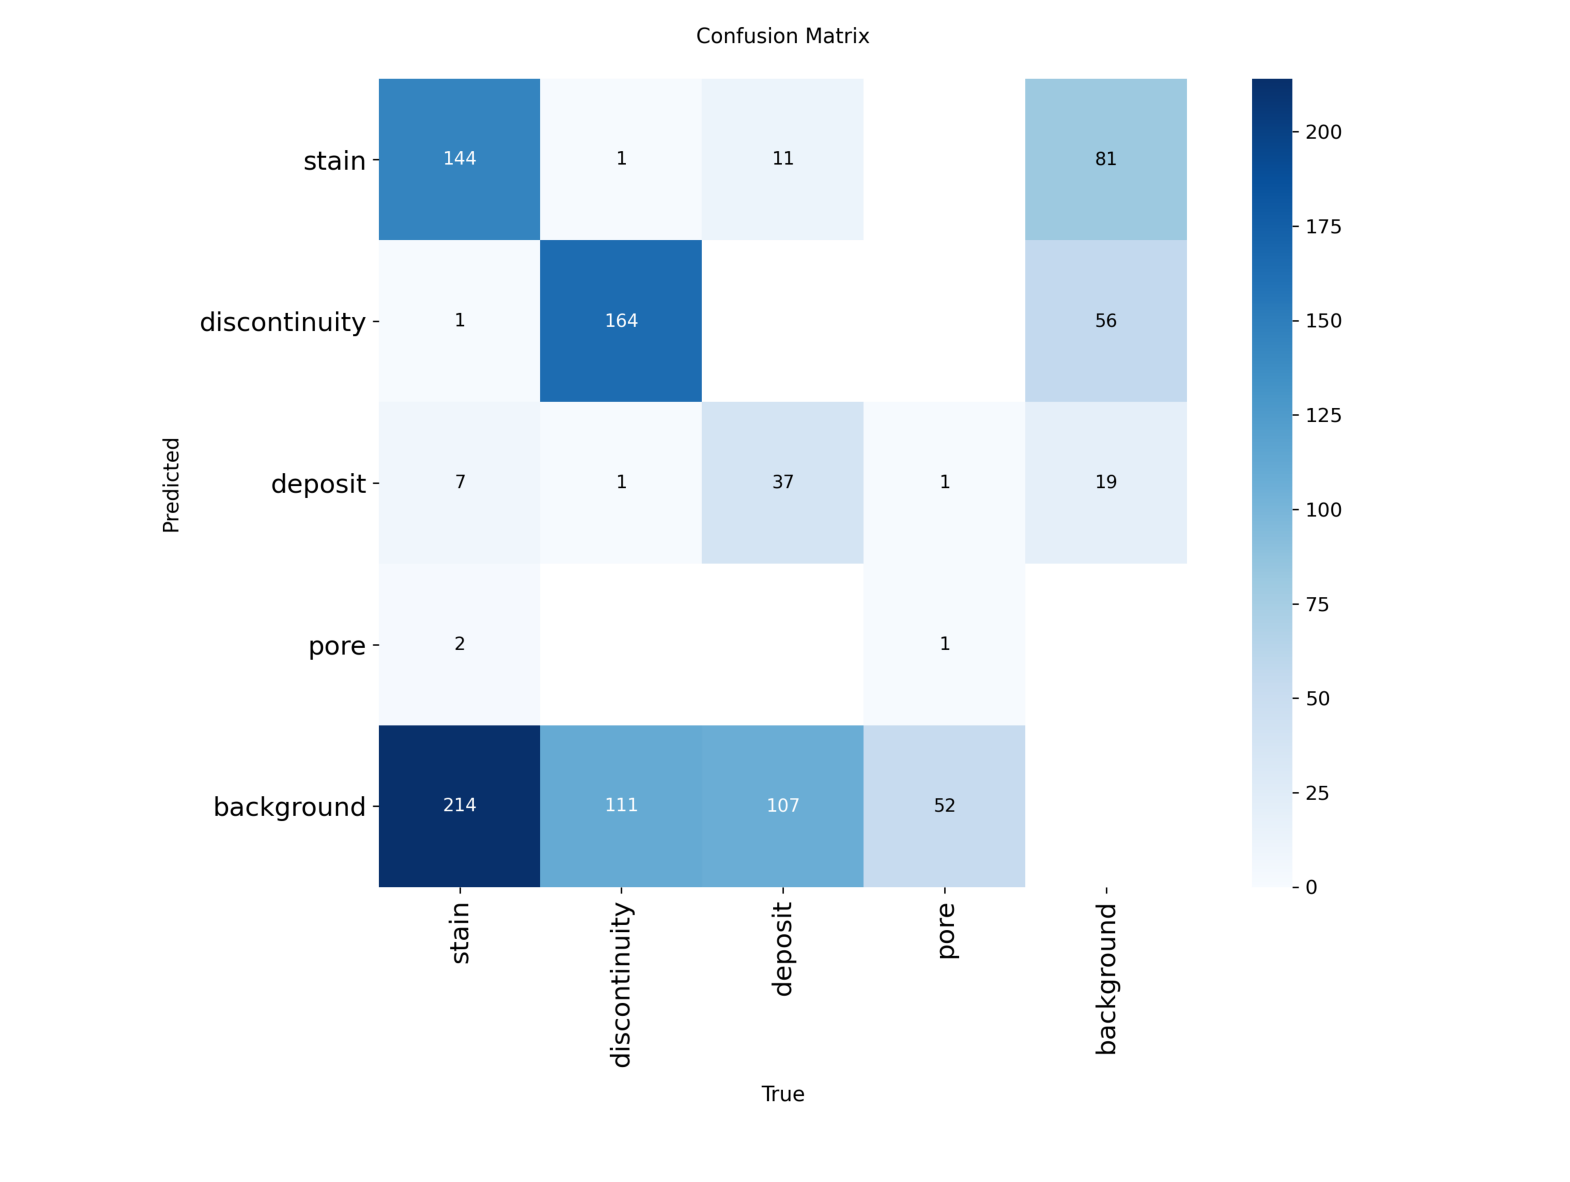

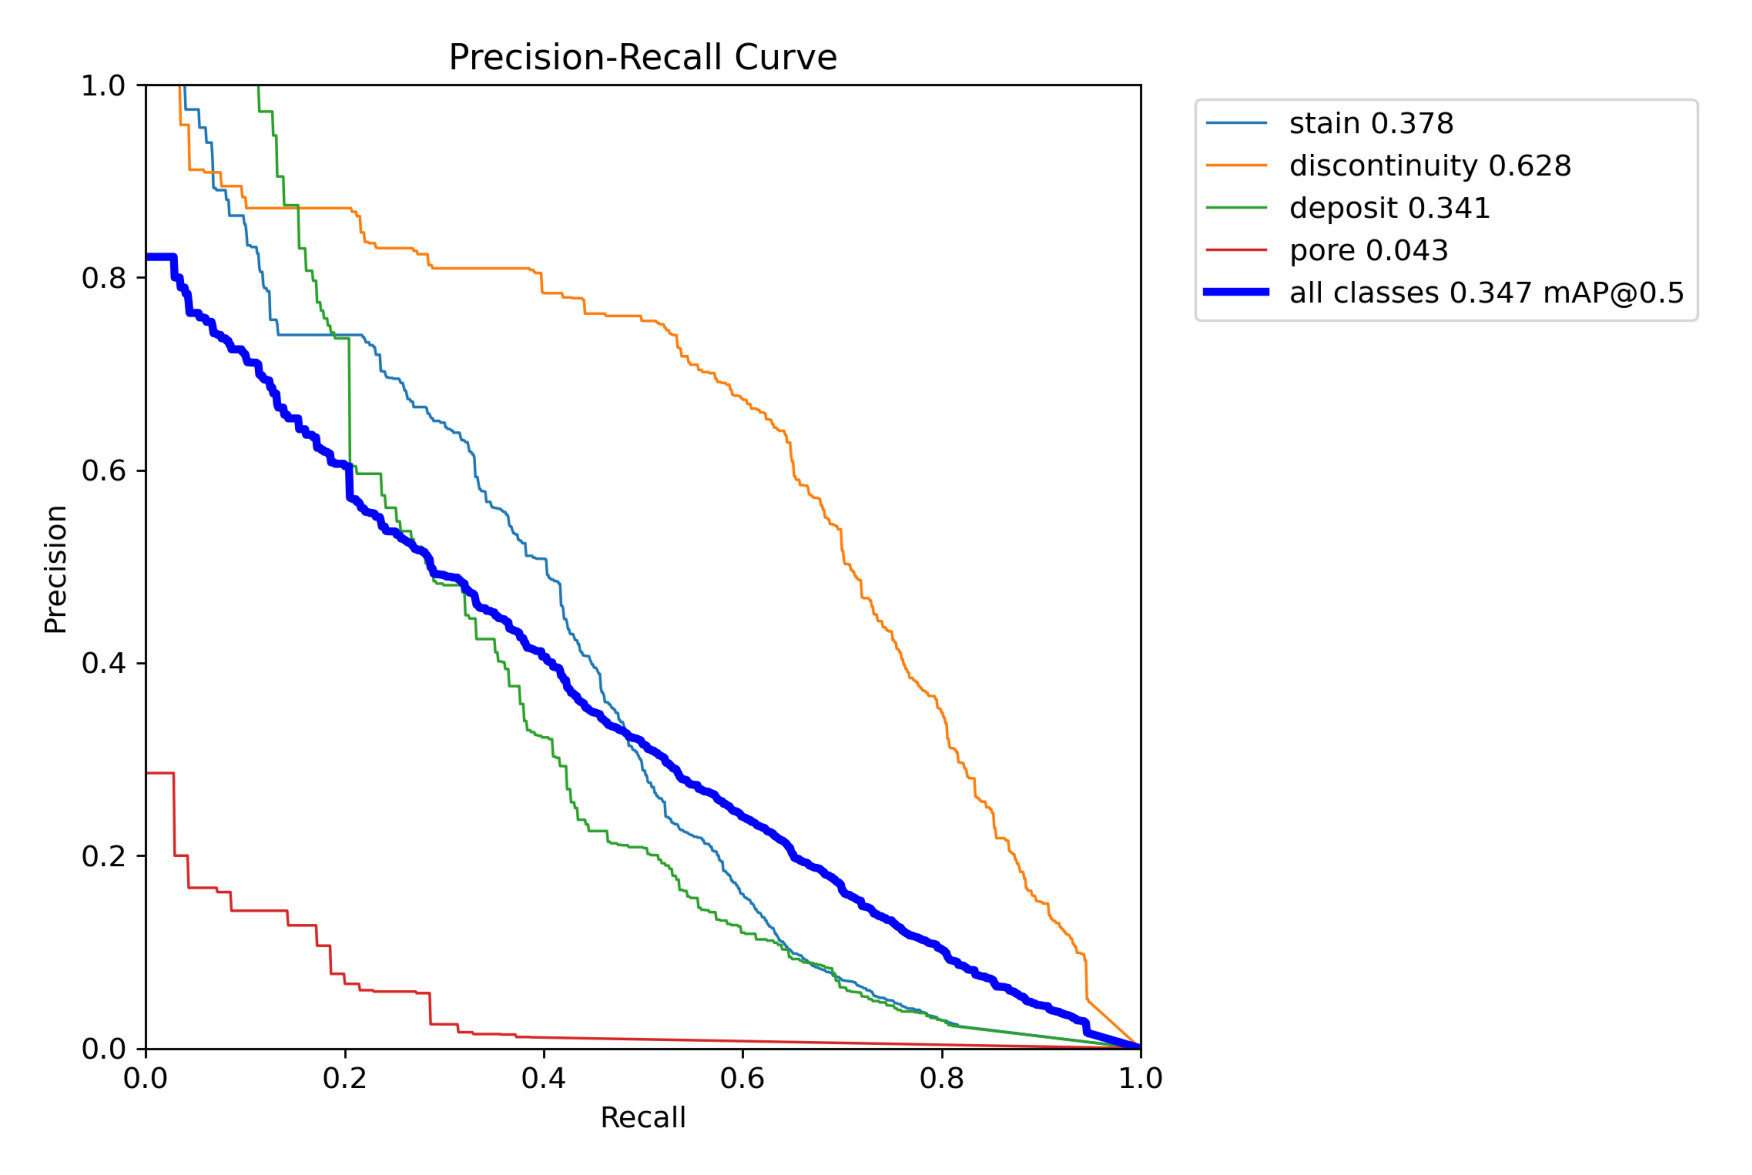

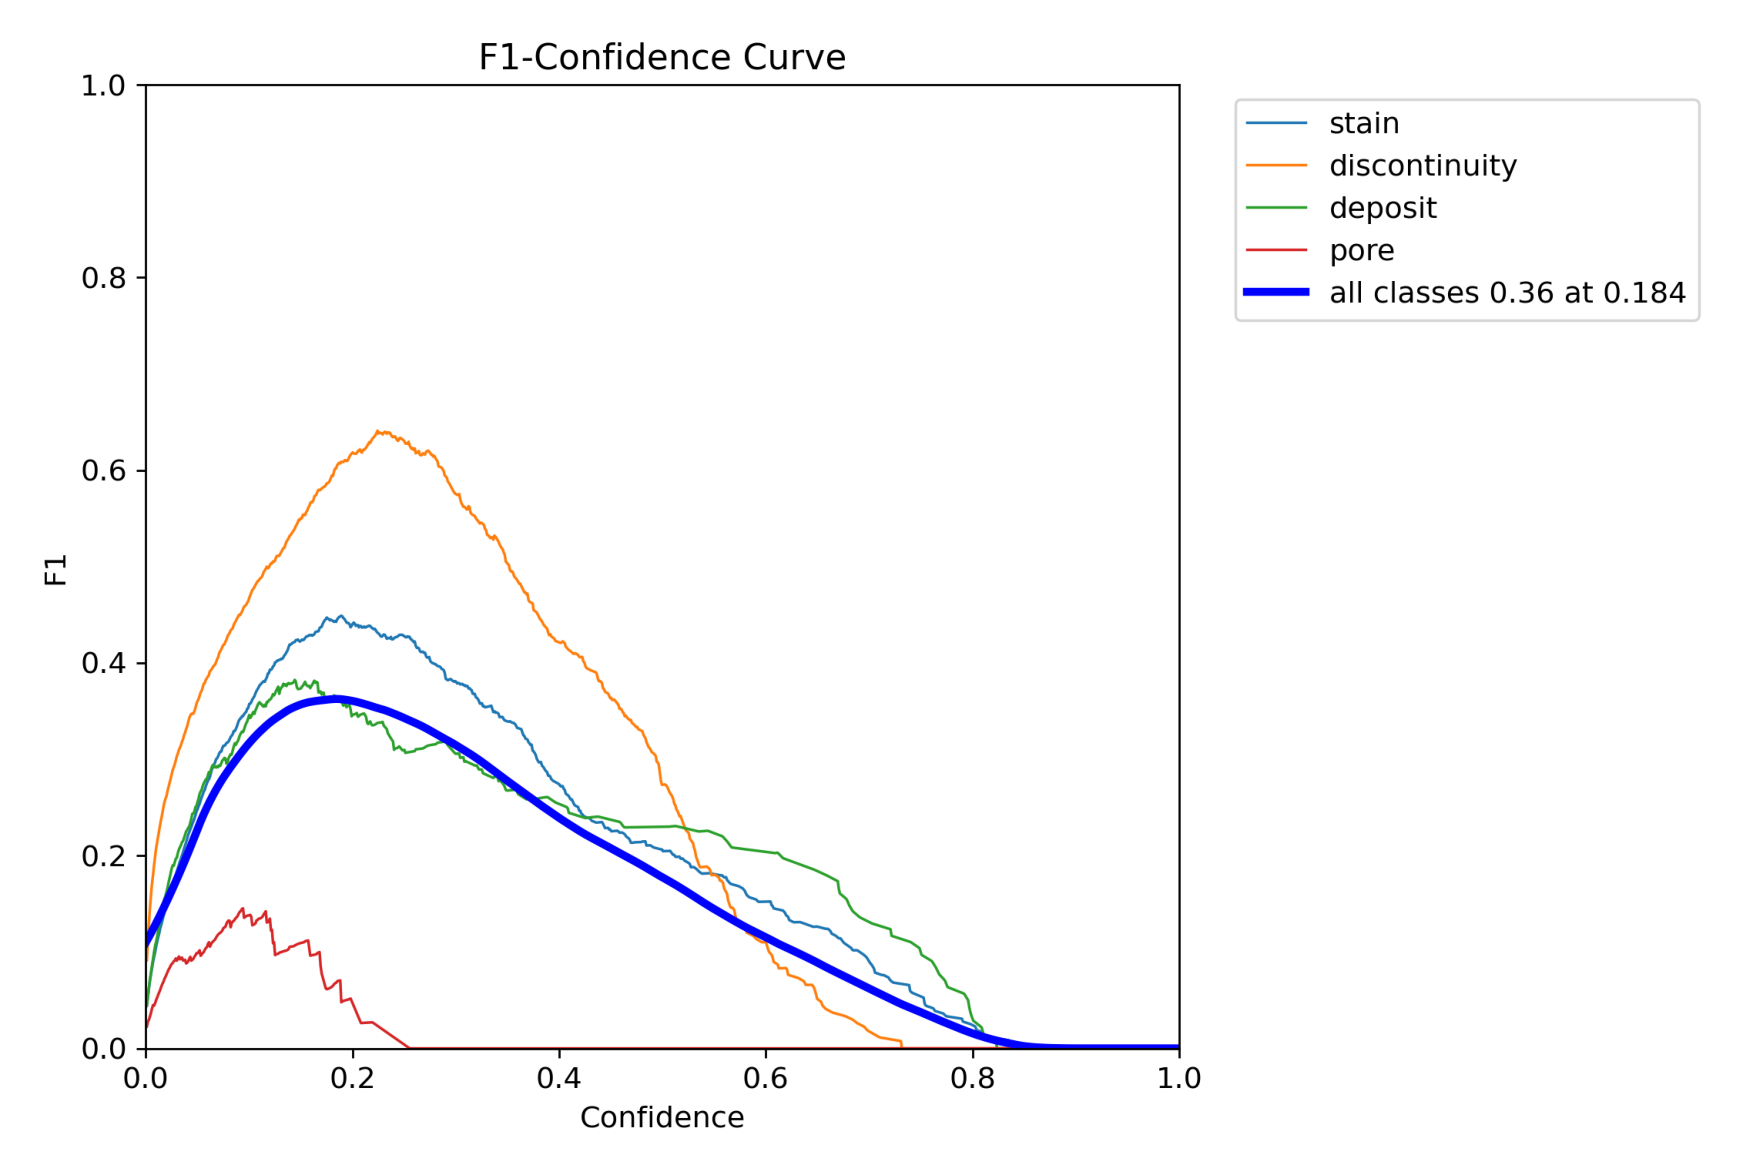

In [103]:
# Import the image generator library from matplotlib
import matplotlib.image as mpimg

# Best model folder
best_model_folder = '/kaggle/working/data/models/fine_tuned_model/fold_4_finetuned_optimized/'

# 1. Results (Training curves)
plt.figure(figsize=(40, 16))
img = mpimg.imread(os.path.join(best_model_folder, 'results.png'))
plt.imshow(img)
plt.axis('off')
plt.title('Training Results', fontsize = 25)
plt.show()

# 2. Confusion Matrix
plt.figure(figsize=(20, 20))
img = mpimg.imread(os.path.join(best_model_folder, 'confusion_matrix.png'))
plt.imshow(img)
plt.axis('off')
# plt.title('Confusion Matrix', fontsize = 25)
plt.show()

# 3. Precision-Recall Curve
plt.figure(figsize=(25, 15))
img = mpimg.imread(os.path.join(best_model_folder, 'BoxPR_curve.png'))
plt.imshow(img)
plt.axis('off')
# plt.title('Precision-Recall Curve', fontsize = 25)
plt.show()

# 4. F1 Score Curve
plt.figure(figsize=(25, 15))
img = mpimg.imread(os.path.join(best_model_folder, 'BoxF1_curve.png'))
plt.imshow(img)
plt.axis('off')
# plt.title('F1 Score Curve', fontsize = 25)
plt.show()

## **In-Depth Analysis of Model Performance: Understanding the Localization Failure**

The evaluation metrics ($\mathbf{mAP}@50 = 0.434$ and $\mathbf{mAP}@50:95 = 0.181$) and the associated diagnostic graphs (Confusion Matrix, PR Curve, and F1 Curve) provide a complete forensic analysis of the YOLOv11s model's performance on the LoHi-WELD dataset. The key finding is the dramatic performance drop across increasing Intersection over Union (IoU) thresholds, pointing directly to a fundamental **localization bottleneck** in the model's ability to precisely delineate the boundaries of the weld defects.

### Critical Performance Discrepancy

The most striking piece of evidence is the **$25.3$ percentage point difference** between the two primary Mean Average Precision (mAP) metrics:

$$\text{Drop} = \text{mAP}@50 - \text{mAP}@50:95 = 0.434 - 0.181 = 0.253$$

The $\text{mAP}$ metrics reveal the following characteristics of the model:

* **mAP@50 (0.434):** This score indicates that, on average, the model correctly *detects* a true defect $\mathbf{43.4\%}$ of the time, provided the bounding box loosely overlaps the ground truth ($\text{IoU} \ge 50\%$). This suggests the model's feature extractor (Backbone and Neck) is capable of identifying the **presence** of weld flaws.

* **mAP@50:95 (0.181):** This score is the average mAP across $10$ stringent IoU thresholds (from $50\%$ to $95\%$). The low value of $\mathbf{18.1\%}$ signifies that the model's bounding boxes are, on average, too loose to satisfy the stricter requirements (e.g., $\text{IoU} \ge 75\%$ or $\text{IoU} \ge 85\%$). **This is the primary area of failure and the reason the model is not yet deployable.** High $\text{mAP}@50:95$ is non-negotiable for industrial applications where precise robotic repair or automated dimensioning of the defect is required. The model can locate, but it cannot precisely outline.

### Analysis of the F1 Confidence Curve

The F1 Curve plots the harmonic mean of Precision and Recall against various confidence thresholds, revealing the optimal operating point for deployment. 

* **Low Optimal Threshold (0.25):** The F1 curve peaks at a confidence threshold of **$0.25$**.

* **Low Model Confidence:** This extremely low optimal threshold indicates the model is highly **uncertain** about its predictions. It suggests that to achieve the best possible balance between Precision and Recall, the confidence bar must be set very low. If the threshold were set to a common value like $0.50$, the model would fail to report numerous correct detections, resulting in a dangerously low Recall.

* **The Precision/Recall Trade-off:** By deploying at $\mathbf{0.25}$, the model's **Recall** (the ability to catch defects) is maximized, which is a safety imperative. However, this action inherently drags **Precision** down, as the model will likely generate a higher rate of **False Positives** (false alarms) in the background noise, as it is now reporting detections it is only $25\%$ sure about. The F1 score at this peak (approximately $0.40$ based on the curve's height) reflects this compromised balance.

### Analysis of the Precision-Recall (PR) Curve

The PR Curve visually demonstrates the trade-off that yields the Average Precision (AP) for each class. The plot displays four distinct lines, corresponding to the four defect classes (Pore, Deposit, Discontinuity, Stain). The area under each curve is the AP for that class.

* **Easiest Classes (Higher AP):** The classes whose PR curves are closest to the top-right corner of the plot are the easiest to detect. These are typically the larger, more well-defined defects like **Deposits** and, possibly, large **Stains**. The size and high contrast of these objects allow the model to localize them with greater confidence and precision.

* **Hardest Classes (Lower AP):** The PR curves that are closer to the bottom-left of the plot belong to the most challenging classes, most likely **Pores** and fine **Discontinuities**.
    
    * **Reason for Drop:** These defects are severely limited by the **$800 \text{ pixel}$** input resolution, despite the intentional increase from the standard $640 \text{ pixels}$. Being tiny and often low-contrast, they are:
        1.  **Difficult to Localize:** The model struggles to define a precise boundary, resulting in low IoU scores and causing the $\text{mAP}@50:95$ to plummet.
        2.  **Prone to Low Confidence:** The model is hesitant to confirm their presence, forcing the entire curve lower and contributing to the low optimal F1 threshold.


Despite the low AP, the PR curves likely show that the model *can* achieve very high **Recall** (approaching $1.0$ on the x-axis) but only at the cost of dropping **Precision** severely (lowering the y-axis value). This confirms the fundamental trade-off: to catch all defects, the system must tolerate many false alarms, a direct consequence of the low confidence and localization failure.


### Analysis of the Confusion Matrix

The Confusion Matrix reveals the specific failures in classification and background noise detection. The off-diagonal elements show instances of misclassification between defect classes. Any significant value off the diagonal (e.g., in the row for 'Discontinuity' and the column for 'Stain') indicates that the model is confusing the visual features of two defect types. This suggests the features learned by the model are **not sufficiently discriminative** between these defect classes. If `Pore` is confused with `Deposit`, it suggests that the model is struggling with the scale difference or the irregular shapes of the defects.

**<u>The Background Penalty (False Positives):</u>** The most important insight often comes from the $\mathbf{Background}$ row and column, although in YOLO matrices this is typically simplified to a **Background** row and a final column showing where real objects are classified as 'Background' (FNs) and where the model misclassifies background as a defect (FPs).

* **High False Negatives (FN):** High values in the row of a defect class (e.g., 'Pore') mapping to the **Background** element confirm that the model is failing to detect (missing) a large number of that defect type. This is the source of the drop in $\text{Recall}$.

* **High False Positives (FP):** High values in the column of a defect class (e.g., 'Stain') mapping from the **Background** element indicate that the model is generating numerous false alarms by identifying background texture, shadows, or welding bead imperfections as a true defect. This is the source of the drop in $\text{Precision}$.


### Summary on Performance Drop

The severe performance drop from $\mathbf{mAP}@50=0.434$ to $\mathbf{mAP}@50:95=0.181$ is a definitive indicator of a **localization precision crisis**, primarily driven by the challenge of tightly bounding the small and irregularly shaped weld defects (Pores and fine Discontinuities). The low confidence threshold and the struggle of the PR curves further validate that the model, while moderately successful at recognizing *what* a defect is, lacks the crucial geometric accuracy required for industrial deployment. Future efforts must focus on improving feature resolution and refining the bounding box regression loss to address this geometric shortfall.

# <u>Project Conclusion: WeldSight System Performance and Future Road Map</u>

The "WeldSight" project successfully implemented a state-of-the-art object detection pipeline using the **YOLOv11s** architecture and **Stratified 5-Fold Cross-Validation** to identify four critical classes of weld defects—Pores, Deposits, Discontinuities, and Stains—within the rigorous **LoHi-WELD** industrial dataset. The project's methodology, encompassing meticulous data preparation (JSON to YOLO conversion), a statistically robust data split to ensure unbiased evaluation, and the fine-tuning of a lightweight model via Transfer Learning, established a sound foundation for high-performance computer vision in quality control.

The initial phase successfully demonstrated methodological rigor:

1.  **Data Integrity:** The complex conversion of raw JSON annotations to the required YOLO normalized coordinate format was verified, ensuring the integrity of the ground truth labels across all thousands of images.

2.  **Statistical Robustness:** The implementation of **Stratified 5-Fold Cross-Validation** successfully partitioned the dataset, guaranteeing that the highly imbalanced defect classes were equally represented in every training and validation split. This process ensured that the final reported metrics are a statistically reliable measure of the model's ability to generalize, free from the bias of a single random data split.

3.  **Real-Time Capability:** The foundational choice of the lightweight **YOLOv11s** variant satisfied the real-time constraint, yielding a high Frames Per Second ($\mathbf{FPS}$) value (as indicated by the training logs), confirming its suitability for high-throughput deployment on industrial edge hardware.

<br>

Despite the rigorous fine-tuning, the final evaluation metrics revealed a significant gap between detection capability and localization precision, indicating that the project's primary industrial objective ($\text{mAP}@50:95 \ge 40\%$) was **not met** in this initial iteration.

| Metric | Value | Interpretation |
| :--- | :--- | :--- |
| **Detection Accuracy ($\mathbf{mAP}@50$)** | **0.434** | The model successfully detects and loosely bounds $\mathbf{43.4\%}$ of all defects. |
| **Localization Precision ($\mathbf{mAP}@50:95$)** | **0.181** | The average precision across strict IoU thresholds drops severely to $\mathbf{18.1\%}$. |
| **Performance Gap** | **25.3 Percentage Points** | Confirms a severe failure in the model's Bounding Box Regression. |

The most critical finding is the massive $25.3$ percentage point drop between $\mathbf{mAP}@50$ and $\mathbf{mAP}@50:95$. This gap pinpoints the central failure mode: the model's **Bounding Box Regression**—the process of determining the exact pixel coordinates of the defect boundary—is fundamentally unstable. The model is capable of locating the general *area* of the defect (hence the $0.434$ score), but the resulting bounding boxes are too loose to satisfy the stricter $\text{IoU} \ge 75\%$ or $\text{IoU} \ge 90\%$ thresholds that underpin the $\text{mAP}@50:95$ average. This lack of geometric precision renders the current model unsuitable for automated repair systems that rely on precise defect coordinates.

## Diagnostic Insights from Graphical Analysis

The diagnostic plots provide granular evidence supporting the localization failure and low confidence:

1. **F1 Score Curve and Confidence Crisis**

    The F1 Curve demonstrated that the model's optimal operating point occurs at an extremely low confidence threshold of approximately $\mathbf{0.25}$.

    - **Low Confidence:** This indicates the model is highly uncertain about its own predictions. To maximize the balanced performance (F1 Score), the system must accept detections with very low confidence, which suggests the model struggles to generate highly distinctive features for its classes.

    - **Deployment Risk:** Operating at such a low threshold is highly risky, as it inevitably leads to a significant increase in **False Positives** (false alarms) caused by background noise and ambiguities, negating the efficiency gains of the real-time system.

2. **Precision-Recall Curve (The Scale Challenge)**

    The PR Curve analysis confirmed that the performance heterogeneity is class-dependent. The curves for the smallest defect classes, primarily **Pores** and **fine Discontinuities** (limited in pixel area even at $800 \text{ pixels}$), were the primary contributors to the low $\text{mAP}@50:95$ score.

    * **Scale Variance:** The model struggles to extract the necessary precise features from these tiny defects, leading to low Average Precision scores for those specific classes. While the model could achieve high **Recall** (catching most defects), it could only do so at the severe expense of **Precision** (generating many false alarms).

3. **Confusion Matrix (The Classification Failure)**

    The Confusion Matrix revealed that while the background/no-background classification was challenging (contributing to False Negatives and False Positives), there were also instances of **inter-class confusion**. Failures like confusing a **Discontinuity** with a **Stain** indicate that the model is struggling to semantically differentiate between visually similar defect types, likely due to feature ambiguity exacerbated by image compression or lighting variations.

## </u>Conclusion and Future Work Recommendations</u>

The WeldSight project successfully established the methodology but fell short of the strict industrial precision target due to a critical **localization failure**. The model is currently useful as a fast, high-Recall screening tool, but is not precise enough for full automation.

The next iteration of the project must transition from maximizing $\text{mAP}@50$ to aggressively closing the gap between $\text{mAP}@50$ and $\text{mAP}@50:95$. Based on the data analysis, the following actions are recommended for future work:

1.  **Architecture Upgrade and Resolution Increase:** Given the failure with small objects, upgrade the base model to the **YOLOv11m (medium)** architecture for deeper feature extraction. Simultaneously, increase the training resolution to **$1024 \text{ pixels}$** (if VRAM allows) to retain maximum pixel information for Pores and fine Discontinuities.

2.  **Loss Function Re-Weighting:** Modify the training configuration to increase the penalty weight assigned to the **Bounding Box Regression Loss** (e.g., CIoU or DIoU loss) relative to the classification loss. This will force the optimizer to prioritize geometric accuracy, which is the direct countermeasure to the low $\text{mAP}@50:95$ score.

3.  **Targeted Augmentation:** Implement stronger data augmentation focused on geometric precision and boundary definition (e.g., highly controlled rotation and minor shear) to teach the model how defect boundaries shift under minor visual variations.

By implementing these data-driven recommendations, the project can aim to break the localization bottleneck and achieve the stringent $\mathbf{mAP}@50:95$ necessary for reliable, deployable industrial quality control.